In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from scipy import stats
import seaborn as sns
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture

in the next cell you can change between two modes of segmentation

In [138]:
#excel_file_path = '/Users/alexandra/Bachelor Project code/Full_Nuclei_Analysis.xlsx'
excel_file_path = '/Users/alexandra/Bachelor Project code/Full_Cell_Analysis.xlsx'
sheet_name = 'Sheet1'
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
data = df.values
np.shape(data)
print(data[0])

[0 0 34.05180319742223 30.78510348246375 0.9040667627491229 8069 'test' 2
 '24_month_liver' 'Secondary' 'male']


In [139]:
#for Full cell analysis -> both lines, nuclei analysis -> remove second line
data_n = data[:,2:6]
data_n = np.hstack((data_n, data[:,7:8]))
 

data_m_24_GAR_l = []
data_f_24_GAR_l = []
data_m_24_CKAP_l = []
data_f_24_CKAP_l = []
data_m_24_Nogo_l = []
data_f_24_Nogo_l = []
data_m_24_CKAP4_Nogo_l = []
data_f_24_CKAP4_Nogo_l = []
data_m_3_GAR_l = []
data_f_3_GAR_l = []
data_m_3_CKAP_l = []
data_f_3_CKAP_l = []
data_m_3_Nogo_l = []
data_f_3_Nogo_l = []
data_m_3_CKAP4_Nogo_l = []
data_f_3_CKAP4_Nogo_l = []

for i in range(len(data)):
    if data[i][-3] == '24_month_liver':
        if data[i][-1] == 'male' and data[i][-2] == 'Secondary':
            data_m_24_GAR_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'Secondary':
            data_f_24_GAR_l.append(data_n[i])
        if data[i][-1] == 'male' and data[i][-2] == 'CKAP4':
            data_m_24_CKAP_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'CKAP4':
            data_f_24_CKAP_l.append(data_n[i])
        if data[i][-1] == 'male' and data[i][-2] == 'NOGOA':
            data_m_24_Nogo_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'NOGOA':
            data_f_24_Nogo_l.append(data_n[i])
        if data[i][-1] == 'male' and data[i][-2] == 'Isotype':
            data_m_24_CKAP4_Nogo_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'Isotype':
            data_f_24_CKAP4_Nogo_l.append(data_n[i])
    if data[i][-3] == '3_month_liver':
        if data[i][-1] == 'male' and data[i][-2] == 'Secondary':
            data_m_3_GAR_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'Secondary':
            data_f_3_GAR_l.append(data_n[i])
        if data[i][-1] == 'male' and data[i][-2] == 'CKAP4':
            data_m_3_CKAP_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'CKAP4':
            data_f_3_CKAP_l.append(data_n[i])
        if data[i][-1] == 'male' and data[i][-2] == 'NOGOA':
            data_m_3_Nogo_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'NOGOA':
            data_f_3_Nogo_l.append(data_n[i])
        if data[i][-1] == 'male' and data[i][-2] == 'Isotype':
            data_m_3_CKAP4_Nogo_l.append(data_n[i])
        if data[i][-1] == 'female' and data[i][-2] == 'Isotype':
            data_f_3_CKAP4_Nogo_l.append(data_n[i])



data_m_24_GAR = np.array(data_m_24_GAR_l)
data_f_24_GAR = np.array(data_f_24_GAR_l)
data_m_24_CKAP = np.array(data_m_24_CKAP_l)
data_f_24_CKAP = np.array(data_f_24_CKAP_l)
data_m_24_Nogo = np.array(data_m_24_Nogo_l)
data_f_24_Nogo = np.array(data_f_24_Nogo_l)
data_m_24_CKAP_Nogo = np.array(data_m_24_CKAP4_Nogo_l)
data_f_24_CKAP_Nogo = np.array(data_f_24_CKAP4_Nogo_l)

data_m_3_GAR = np.array(data_m_3_GAR_l)
data_f_3_GAR = np.array(data_f_3_GAR_l)
data_m_3_CKAP = np.array(data_m_3_CKAP_l)
data_f_3_CKAP = np.array(data_f_3_CKAP_l)
data_m_3_Nogo = np.array(data_m_3_Nogo_l)
data_f_3_Nogo = np.array(data_f_3_Nogo_l)
data_m_3_CKAP_Nogo = np.array(data_m_3_CKAP4_Nogo_l)
data_f_3_CKAP_Nogo = np.array(data_f_3_CKAP4_Nogo_l)

print(np.shape(data_m_Nogo))
print(data_m_Nogo[0])
print(data_m_3_CKAP_Nogo)

NameError: name 'data_m_Nogo' is not defined

## New control cell
run this next cell only if you want the new controls, this cell will remplace the controls from the previous data set and replace it with the new 

In [140]:
excel_file_path_1 = '/Users/alexandra/Bachelor Project code/Full_Control_Isotype_3m.xlsx'
sheet_name = 'Sheet1'
df_1 = pd.read_excel(excel_file_path_1, sheet_name=sheet_name)
data_ci3 = df_1.values
data_ci3_n = data_ci3[:,1:5]

excel_file_path_2 = '/Users/alexandra/Bachelor Project code/Full_Control_Secondary_3m.xlsx'
sheet_name = 'Sheet1'
df_2 = pd.read_excel(excel_file_path_2, sheet_name=sheet_name)
data_cs3 = df_2.values
data_cs3_n = data_cs3[:,1:5]

excel_file_path_3 = '/Users/alexandra/Bachelor Project code/Full_Control_Isotype_24m.xlsx'
sheet_name = 'Sheet1'
df_3 = pd.read_excel(excel_file_path_3, sheet_name=sheet_name)
data_ci4 = df_3.values
data_ci4_n = data_ci4[:,1:5]

excel_file_path_4 = '/Users/alexandra/Bachelor Project code/Full_Control_Secondary_24m.xlsx'
sheet_name = 'Sheet1'
df_4 = pd.read_excel(excel_file_path_4, sheet_name=sheet_name)
data_cs4 = df_4.values
data_cs4_n = data_cs4[:,1:5]

data_m_3_CKAP4_Nogo_l = []
data_f_3_CKAP4_Nogo_l = []
data_m_3_GAR_l = []
data_f_3_GAR_l = []
data_m_24_CKAP4_Nogo_l = []
data_f_24_CKAP4_Nogo_l = []
data_m_24_GAR_l = []
data_f_24_GAR_l = []
print(data_ci3[0][-2])

for i in range(1,len(data_ci3)):
    if data_ci3[i][-2] == 'Male':
        data_m_3_CKAP4_Nogo_l.append(data_ci3_n[i])
    if data_ci3[i][-2] == 'Female':
        data_f_3_CKAP4_Nogo_l.append(data_ci3_n[i])

for i in range(1,len(data_cs3)):
    if data_cs3[i][-2] == 'Male':
        data_m_3_GAR_l.append(data_cs3_n[i])
    if data_cs3[i][-2] == 'Female':
        data_f_3_GAR_l.append(data_cs3_n[i])

for i in range(1,len(data_ci4)):
    if data_ci4[i][-2] == 'Male':
        data_m_24_CKAP4_Nogo_l.append(data_ci4_n[i])
    if data_ci4[i][-2] == 'Female':
        data_f_24_CKAP4_Nogo_l.append(data_ci4_n[i])

for i in range(1,len(data_cs4)):
    if data_cs4[i][-2] == 'Male':
        data_m_24_GAR_l.append(data_cs4_n[i])
    if data_cs4[i][-2] == 'Female':
        data_f_24_GAR_l.append(data_cs4_n[i])


data_m_24_GAR = np.array(data_m_24_GAR_l)
data_f_24_GAR = np.array(data_f_24_GAR_l)
data_m_24_CKAP_Nogo = np.array(data_m_24_CKAP4_Nogo_l)
data_f_24_CKAP_Nogo = np.array(data_f_24_CKAP4_Nogo_l)
data_m_3_GAR = np.array(data_m_3_GAR_l)
data_f_3_GAR = np.array(data_f_3_GAR_l)
data_m_3_CKAP_Nogo = np.array(data_m_3_CKAP4_Nogo_l)
data_f_3_CKAP_Nogo = np.array(data_f_3_CKAP4_Nogo_l)

data_m_24_GAR = np.hstack((data_m_24_GAR, np.zeros((data_m_24_GAR.shape[0],1))))
data_f_24_GAR = np.hstack((data_f_24_GAR, np.zeros((data_f_24_GAR.shape[0],1))))
data_m_24_CKAP_Nogo = np.hstack((data_m_24_CKAP_Nogo, np.zeros((data_m_24_CKAP_Nogo.shape[0],1))))
data_f_24_CKAP_Nogo = np.hstack((data_f_24_CKAP_Nogo, np.zeros((data_f_24_CKAP_Nogo.shape[0],1))))
data_m_3_GAR = np.hstack((data_m_24_GAR, np.zeros((data_m_24_GAR.shape[0],1))))
data_f_3_GAR = np.hstack((data_f_24_GAR, np.zeros((data_f_24_GAR.shape[0],1))))
data_m_3_CKAP_Nogo = np.hstack((data_m_3_CKAP_Nogo, np.zeros((data_m_3_CKAP_Nogo.shape[0],1))))
data_f_3_CKAP_Nogo = np.hstack((data_f_3_CKAP_Nogo, np.zeros((data_f_3_CKAP_Nogo.shape[0],1))))

data_m_24_GAR[:,2], data_m_24_GAR[:,3] = data_m_24_GAR[:,3].copy(), data_m_24_GAR[:,2].copy()
data_f_24_GAR[:,2], data_f_24_GAR[:,3] = data_f_24_GAR[:,3].copy(), data_f_24_GAR[:,2].copy()
data_m_24_CKAP_Nogo[:,2], data_m_24_CKAP_Nogo[:,3] = data_m_24_CKAP_Nogo[:,3].copy(), data_m_24_CKAP_Nogo[:,2].copy()
data_f_24_CKAP_Nogo[:,2], data_f_24_CKAP_Nogo[:,3] = data_f_24_CKAP_Nogo[:,3].copy(), data_f_24_CKAP_Nogo[:,2].copy()
data_m_3_GAR[:,2], data_m_3_GAR[:,3] = data_m_3_GAR[:,3].copy(), data_m_3_GAR[:,2].copy()
data_f_3_GAR[:,2], data_f_3_GAR[:,3] = data_f_3_GAR[:,3].copy(), data_f_3_GAR[:,2].copy()
data_m_3_CKAP_Nogo[:,2], data_m_3_CKAP_Nogo[:,3] = data_m_3_CKAP_Nogo[:,3].copy(), data_m_3_CKAP_Nogo[:,2].copy()
data_f_3_CKAP_Nogo[:,2], data_f_3_CKAP_Nogo[:,3] = data_f_3_CKAP_Nogo[:,3].copy(), data_f_3_CKAP_Nogo[:,2].copy()


print(data_m_24_GAR[0])

Sex
[40.938 41.761 1.02 437.543 0.0]


In [141]:
print(data_m_3_Nogo)


[[51.5278647463995 61.47150907952411 1.192976060274638 4791 1]
 [54.23508859495882 55.08967639963397 1.015757101662679 12021 1]
 [52.37100213219616 53.72601279317697 1.025873300219852 7504 1]
 ...
 [10.13019607843137 9.437124183006535 0.9315835656033858 7650 1]
 [16.31071179344033 10.81955105838567 0.6633402144189048 17196 1]
 [10.32695109261186 9.503017689906347 0.9202152314544245 9610 1]]


#### male GAR 24 m/o and 3 m/o

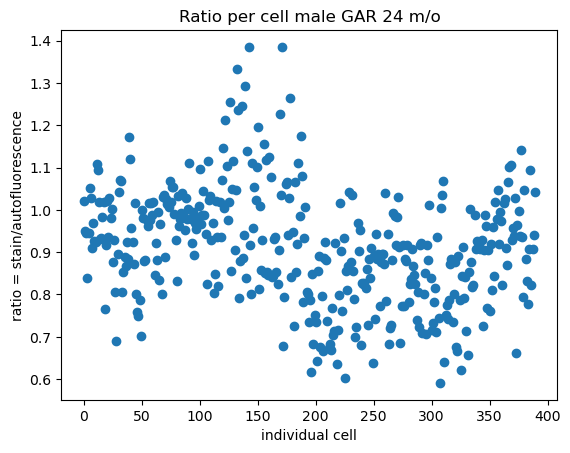

Average in 24 m/o autofluorescence: 40.25226666666668 , stain : 36.23908205128204 , ratio : 0.9118897435897431


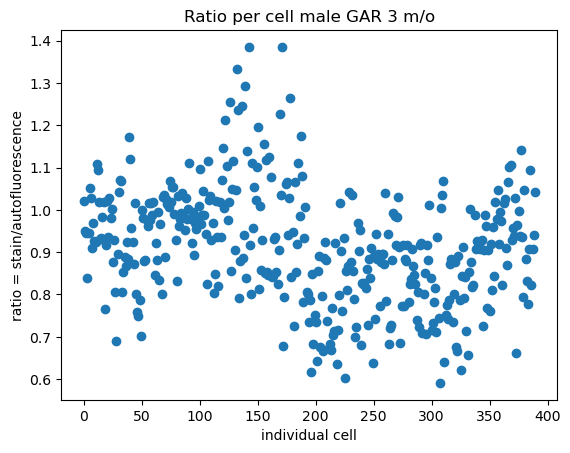

Average in 3 m/o autofluorescence: 40.25226666666668 , stain : 36.23908205128204 , ratio : 0.9118897435897431


In [142]:
m_GAR_m_autofluorescence = np.mean(data_m_24_GAR[:,0])
m_GAR_SD_autofluorescence = np.std(data_m_24_GAR[:,0])
x_GAR = np.arange(len(data_m_24_GAR))
plt.scatter(x_GAR,data_m_24_GAR[:,2])
plt.xlabel('individual cell')
plt.ylabel('ratio = stain/autofluorescence')
plt.title('Ratio per cell male GAR 24 m/o')
plt.show()

print('Average in 24 m/o autofluorescence:',m_GAR_m_autofluorescence,', stain :', np.mean(data_m_24_GAR[:,1]),', ratio :', np.mean(data_m_24_GAR[:,2]))

x_GAR = np.arange(len(data_m_3_GAR))
plt.scatter(x_GAR,data_m_3_GAR[:,2])
plt.xlabel('individual cell')
plt.ylabel('ratio = stain/autofluorescence')
plt.title('Ratio per cell male GAR 3 m/o')
plt.show()

print('Average in 3 m/o autofluorescence:',np.mean(data_m_3_GAR[:,0]),', stain :', np.mean(data_m_3_GAR[:,1]),', ratio :', np.mean(data_m_3_GAR[:,2]))



#### male and female GAR

Average in 24 m/o female autofluorescence: 43.033922388059715
stain : 43.58171044776119
ratio : 1.0760567164179107
Average in 3 m/o female autofluorescence: 43.033922388059715
stain : 43.58171044776119
ratio : 1.0760567164179107
Average in 24 m/o male autofluorescence: 40.25226666666668
stain : 36.23908205128204
ratio : 0.9118897435897431
Average in 24 m/o male autofluorescence: 40.25226666666668
stain : 36.23908205128204
ratio : 0.9118897435897431


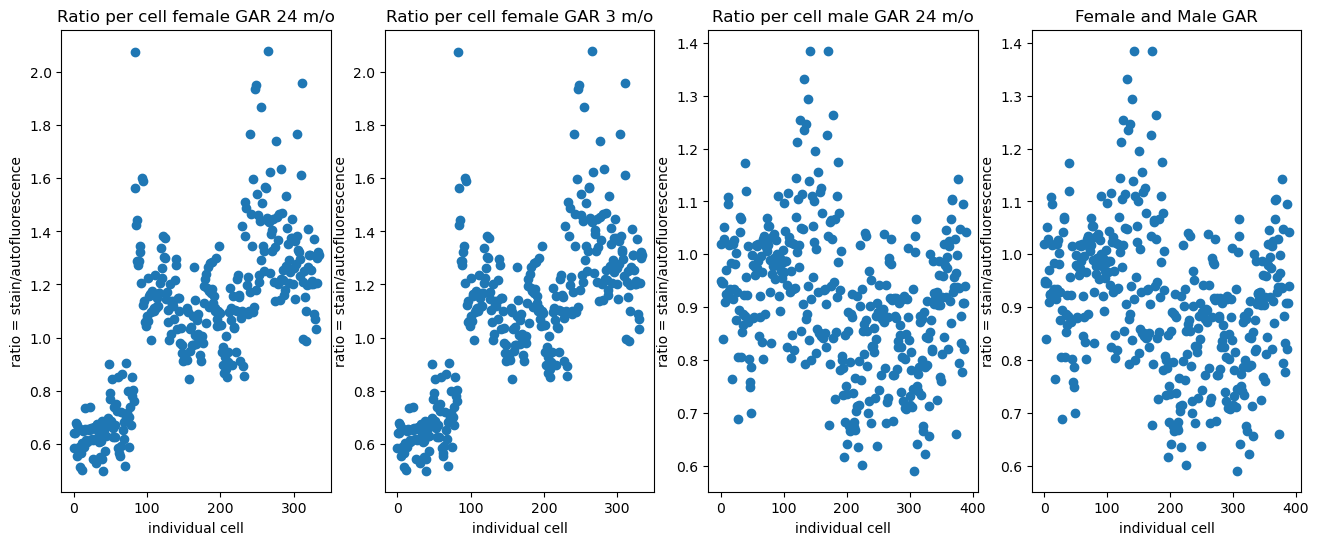

In [143]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6))

x_GAR = np.arange(len(data_f_24_GAR))
ax1.scatter(x_GAR,data_f_24_GAR[:,2])
ax1.set_xlabel('individual cell')
ax1.set_ylabel('ratio = stain/autofluorescence')
ax1.set_title('Ratio per cell female GAR 24 m/o')
#ax1.show()

print('Average in 24 m/o female autofluorescence:',np.mean(data_f_24_GAR[:,0]))
print('stain :', np.mean(data_f_24_GAR[:,1]))
print('ratio :', np.mean(data_f_24_GAR[:,2]))


x_GAR = np.arange(len(data_f_3_GAR))
ax2.scatter(x_GAR,data_f_3_GAR[:,2])
ax2.set_xlabel('individual cell')
ax2.set_ylabel('ratio = stain/autofluorescence')
ax2.set_title('Ratio per cell female GAR 3 m/o')

print('Average in 3 m/o female autofluorescence:',np.mean(data_f_3_GAR[:,0]))
print('stain :', np.mean(data_f_3_GAR[:,1]))
print('ratio :', np.mean(data_f_3_GAR[:,2]))

x_GAR = np.arange(len(data_m_24_GAR))
ax3.scatter(x_GAR,data_m_24_GAR[:,2])
ax3.set_xlabel('individual cell')
ax3.set_ylabel('ratio = stain/autofluorescence')
ax3.set_title('Ratio per cell male GAR 24 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_24_GAR[:,0]))
print('stain :', np.mean(data_m_24_GAR[:,1]))
print('ratio :', np.mean(data_m_24_GAR[:,2]))

x_GAR = np.arange(len(data_m_3_GAR))
ax4.scatter(x_GAR,data_m_3_GAR[:,2])
ax4.set_xlabel('individual cell')
ax4.set_ylabel('ratio = stain/autofluorescence')
ax4.set_title('Ratio per cell male GAR 3 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_3_GAR[:,0]))
print('stain :', np.mean(data_m_3_GAR[:,1]))
print('ratio :', np.mean(data_m_3_GAR[:,2]))

plt.title('Female and Male GAR')


plt.show()

#### female and male CKAP-4 and Nogo-A

Average in 24 m/o female autofluorescence: 70.36729836065574
stain : 31.85168524590166
ratio : 0.4559704918032785
Average in 3 m/o female autofluorescence: 42.01885380116958
stain : 32.09991812865498
ratio : 0.7824502923976612
Average in 24 m/o male autofluorescence: 42.98111956521744
stain : 21.2403768115942
ratio : 0.5028152173913044
Average in 24 m/o male autofluorescence: 73.27646774193546
stain : 26.398720430107513
ratio : 0.35808064516129035


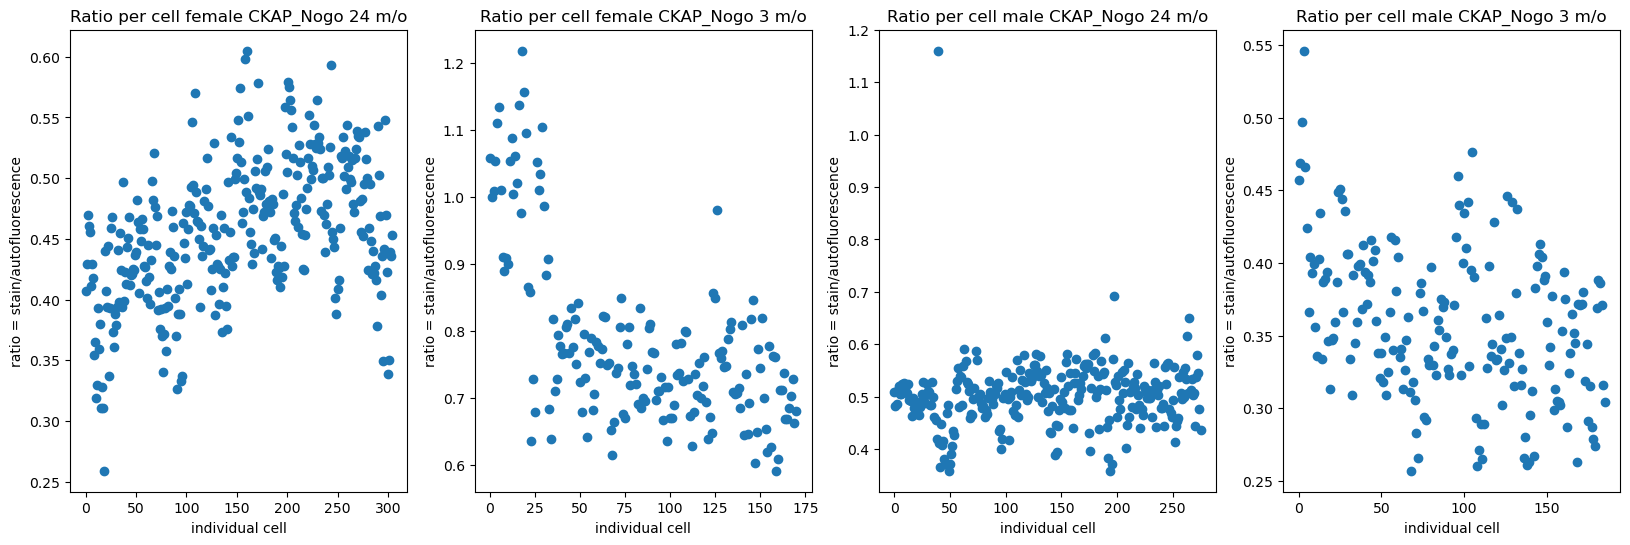

In [144]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

x_CKAP_Nogo = np.arange(len(data_f_24_CKAP_Nogo))
ax1.scatter(x_CKAP_Nogo,data_f_24_CKAP_Nogo[:,2])
ax1.set_xlabel('individual cell')
ax1.set_ylabel('ratio = stain/autofluorescence')
ax1.set_title('Ratio per cell female CKAP_Nogo 24 m/o')

print('Average in 24 m/o female autofluorescence:',np.mean(data_f_24_CKAP_Nogo[:,0]))
print('stain :', np.mean(data_f_24_CKAP_Nogo[:,1]))
print('ratio :', np.mean(data_f_24_CKAP_Nogo[:,2]))


x_CKAP_Nogo = np.arange(len(data_f_3_CKAP_Nogo))
ax2.scatter(x_CKAP_Nogo,data_f_3_CKAP_Nogo[:,2])
ax2.set_xlabel('individual cell')
ax2.set_ylabel('ratio = stain/autofluorescence')
ax2.set_title('Ratio per cell female CKAP_Nogo 3 m/o')

print('Average in 3 m/o female autofluorescence:',np.mean(data_f_3_CKAP_Nogo[:,0]))
print('stain :', np.mean(data_f_3_CKAP_Nogo[:,1]))
print('ratio :', np.mean(data_f_3_CKAP_Nogo[:,2]))

x_CKAP_Nogo = np.arange(len(data_m_24_CKAP_Nogo))
ax3.scatter(x_CKAP_Nogo,data_m_24_CKAP_Nogo[:,2])
ax3.set_xlabel('individual cell')
ax3.set_ylabel('ratio = stain/autofluorescence')
ax3.set_title('Ratio per cell male CKAP_Nogo 24 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_24_CKAP_Nogo[:,0]))
print('stain :', np.mean(data_m_24_CKAP_Nogo[:,1]))
print('ratio :', np.mean(data_m_24_CKAP_Nogo[:,2]))

x_CKAP_Nogo = np.arange(len(data_m_3_CKAP_Nogo))
ax4.scatter(x_CKAP_Nogo,data_m_3_CKAP_Nogo[:,2])
ax4.set_xlabel('individual cell')
ax4.set_ylabel('ratio = stain/autofluorescence')
ax4.set_title('Ratio per cell male CKAP_Nogo 3 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_3_CKAP_Nogo[:,0]))
print('stain :', np.mean(data_m_3_CKAP_Nogo[:,1]))
print('ratio :', np.mean(data_m_3_CKAP_Nogo[:,2]))


plt.show()

#### female and male CKAP-4

Average in 24 m/o female autofluorescence: 44.32024815831472
stain : 31.67722307618044
ratio : 0.752976453207459
Average in 3 m/o female autofluorescence: 47.11138675225041
stain : 41.04609518148098
ratio : 0.9118127320545819
Average in 24 m/o male autofluorescence: 41.29012991474688
stain : 24.216743082141143
ratio : 0.59549874699442
Average in 24 m/o male autofluorescence: 48.79017387182995
stain : 29.47717079707459
ratio : 0.6184035431887757


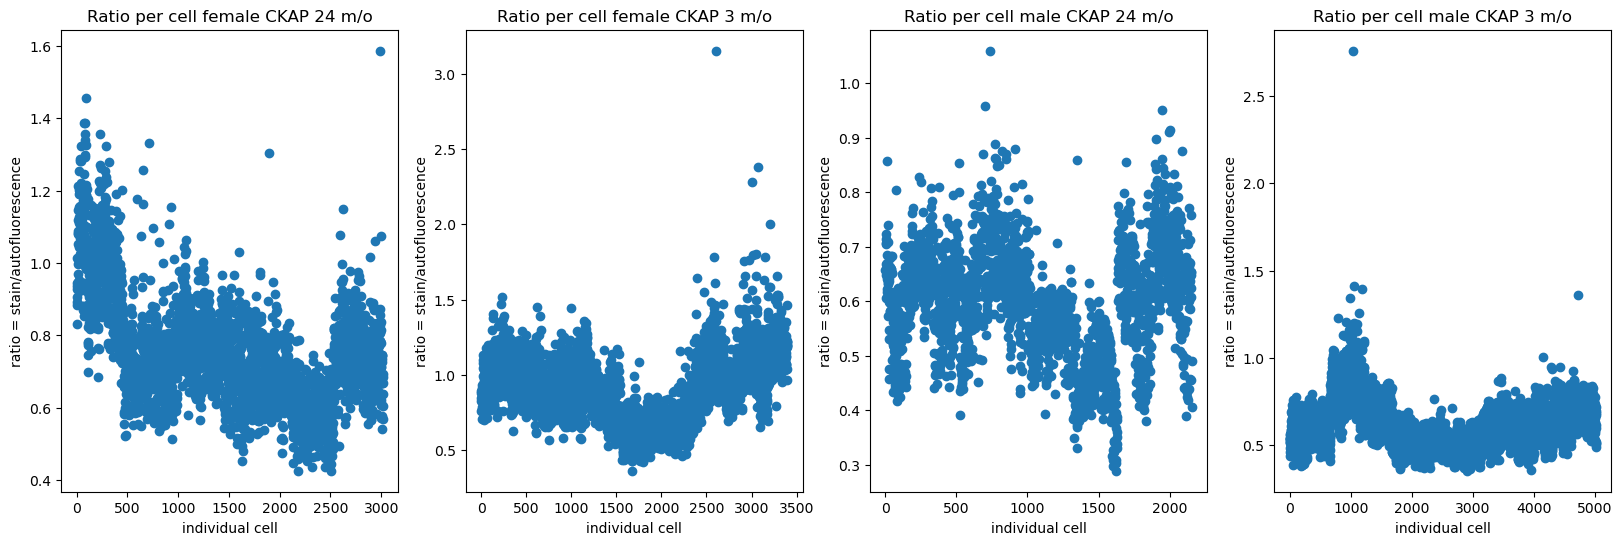

In [145]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

x_CKAP = np.arange(len(data_f_24_CKAP))
ax1.scatter(x_CKAP,data_f_24_CKAP[:,2])
ax1.set_xlabel('individual cell')
ax1.set_ylabel('ratio = stain/autofluorescence')
ax1.set_title('Ratio per cell female CKAP 24 m/o')
#ax1.show()

print('Average in 24 m/o female autofluorescence:',np.mean(data_f_24_CKAP[:,0]))
print('stain :', np.mean(data_f_24_CKAP[:,1]))
print('ratio :', np.mean(data_f_24_CKAP[:,2]))


x_CKAP = np.arange(len(data_f_3_CKAP))
ax2.scatter(x_CKAP,data_f_3_CKAP[:,2])
ax2.set_xlabel('individual cell')
ax2.set_ylabel('ratio = stain/autofluorescence')
ax2.set_title('Ratio per cell female CKAP 3 m/o')

print('Average in 3 m/o female autofluorescence:',np.mean(data_f_3_CKAP[:,0]))
print('stain :', np.mean(data_f_3_CKAP[:,1]))
print('ratio :', np.mean(data_f_3_CKAP[:,2]))

x_CKAP = np.arange(len(data_m_24_CKAP))
ax3.scatter(x_CKAP,data_m_24_CKAP[:,2])
ax3.set_xlabel('individual cell')
ax3.set_ylabel('ratio = stain/autofluorescence')
ax3.set_title('Ratio per cell male CKAP 24 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_24_CKAP[:,0]))
print('stain :', np.mean(data_m_24_CKAP[:,1]))
print('ratio :', np.mean(data_m_24_CKAP[:,2]))

x_CKAP = np.arange(len(data_m_3_CKAP))
ax4.scatter(x_CKAP,data_m_3_CKAP[:,2])
ax4.set_xlabel('individual cell')
ax4.set_ylabel('ratio = stain/autofluorescence')
ax4.set_title('Ratio per cell male CKAP 3 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_3_CKAP[:,0]))
print('stain :', np.mean(data_m_3_CKAP[:,1]))
print('ratio :', np.mean(data_m_3_CKAP[:,2]))


plt.show()

#### female and male Nogo-a

Average in 24 m/o female autofluorescence: 43.143117343091774
stain : 53.99517125721417
ratio : 1.2842933137106678
Average in 3 m/o female autofluorescence: 31.563654291349053
stain : 59.93571770195453
ratio : 2.154072249290222
Average in 24 m/o male autofluorescence: 34.52506728445008
stain : 37.008222112190694
ratio : 1.142460358597053
Average in 24 m/o male autofluorescence: 44.09890728030262
stain : 45.89539678533234
ratio : 1.0535393182561357


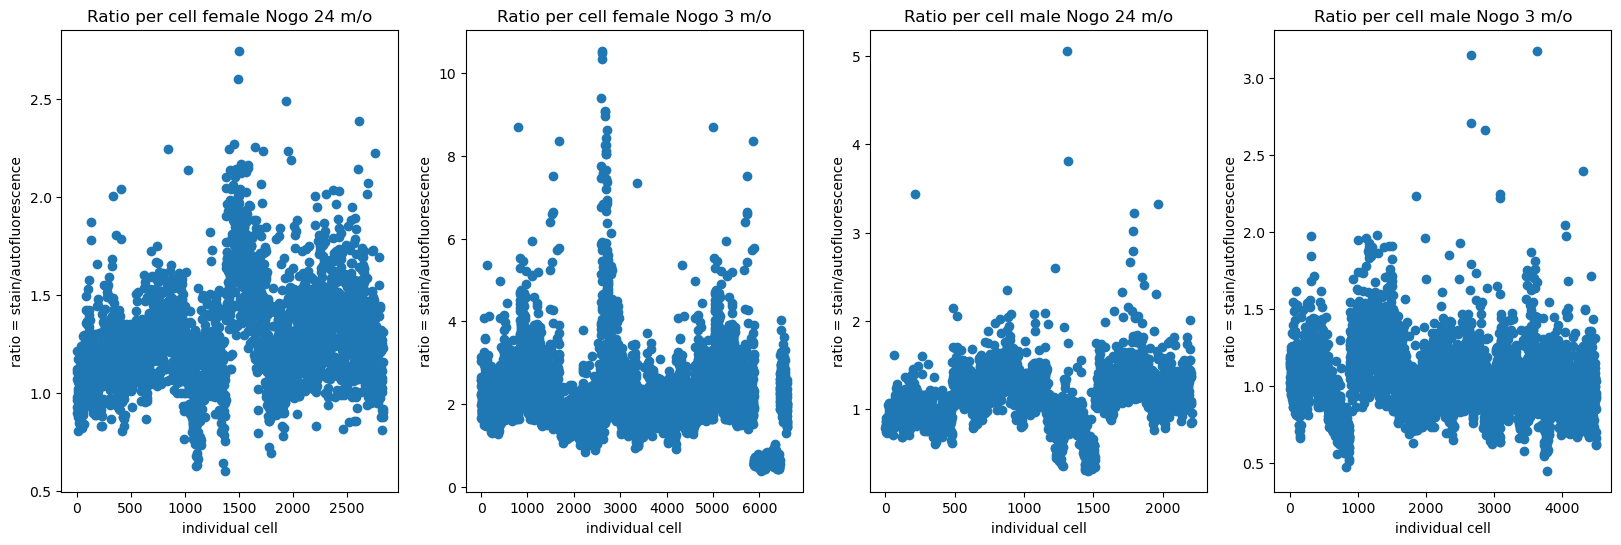

In [146]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

x_Nogo = np.arange(len(data_f_24_Nogo))
ax1.scatter(x_Nogo,data_f_24_Nogo[:,2])
ax1.set_xlabel('individual cell')
ax1.set_ylabel('ratio = stain/autofluorescence')
ax1.set_title('Ratio per cell female Nogo 24 m/o')
#ax1.show()

print('Average in 24 m/o female autofluorescence:',np.mean(data_f_24_Nogo[:,0]))
print('stain :', np.mean(data_f_24_Nogo[:,1]))
print('ratio :', np.mean(data_f_24_Nogo[:,2]))


x_Nogo = np.arange(len(data_f_3_Nogo))
ax2.scatter(x_Nogo,data_f_3_Nogo[:,2])
ax2.set_xlabel('individual cell')
ax2.set_ylabel('ratio = stain/autofluorescence')
ax2.set_title('Ratio per cell female Nogo 3 m/o')

print('Average in 3 m/o female autofluorescence:',np.mean(data_f_3_Nogo[:,0]))
print('stain :', np.mean(data_f_3_Nogo[:,1]))
print('ratio :', np.mean(data_f_3_Nogo[:,2]))

x_Nogo = np.arange(len(data_m_24_Nogo))
ax3.scatter(x_Nogo,data_m_24_Nogo[:,2])
ax3.set_xlabel('individual cell')
ax3.set_ylabel('ratio = stain/autofluorescence')
ax3.set_title('Ratio per cell male Nogo 24 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_24_Nogo[:,0]))
print('stain :', np.mean(data_m_24_Nogo[:,1]))
print('ratio :', np.mean(data_m_24_Nogo[:,2]))

x_Nogo = np.arange(len(data_m_3_Nogo))
ax4.scatter(x_Nogo,data_m_3_Nogo[:,2])
ax4.set_xlabel('individual cell')
ax4.set_ylabel('ratio = stain/autofluorescence')
ax4.set_title('Ratio per cell male Nogo 3 m/o')

print('Average in 24 m/o male autofluorescence:',np.mean(data_m_3_Nogo[:,0]))
print('stain :', np.mean(data_m_3_Nogo[:,1]))
print('ratio :', np.mean(data_m_3_Nogo[:,2]))


plt.show()

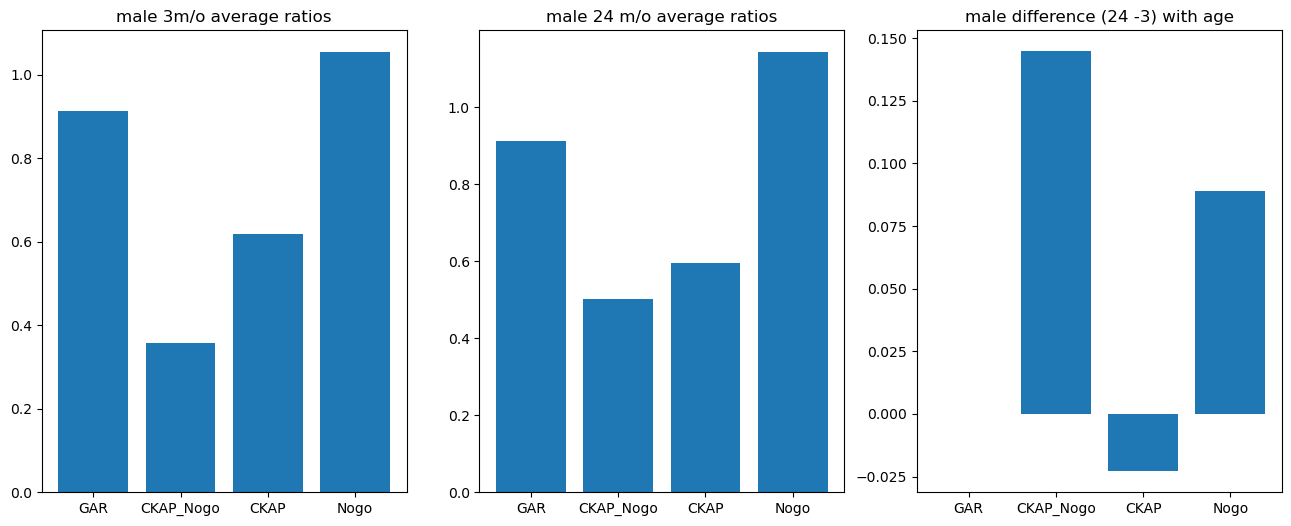

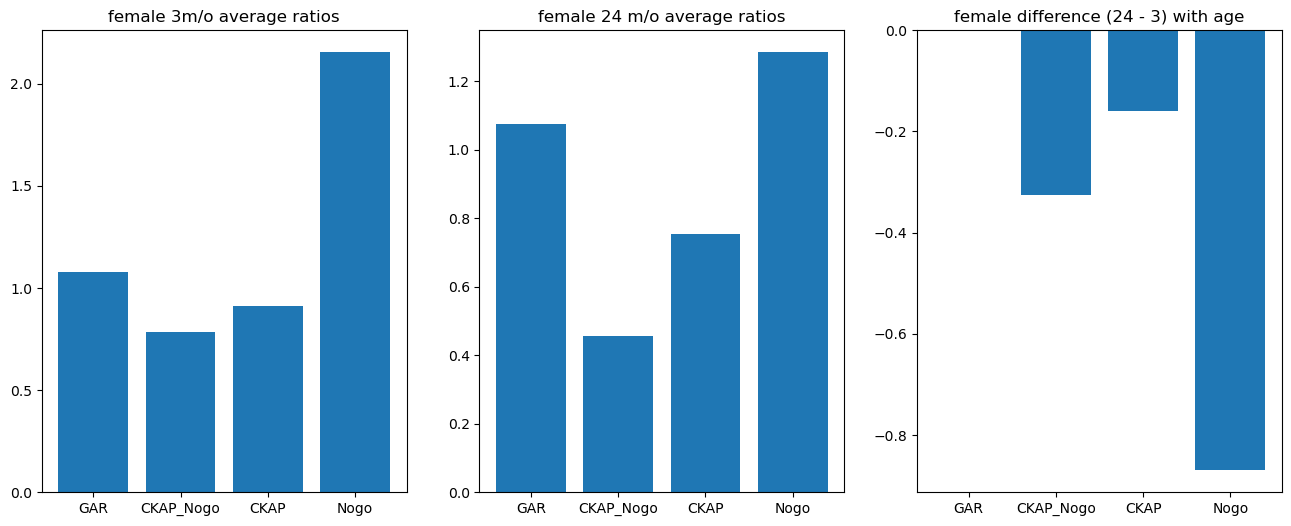

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
    
m_3_ratios = np.array([np.mean(data_m_3_GAR[:,2]),np.mean(data_m_3_CKAP_Nogo[:,2]),np.mean(data_m_3_CKAP[:,2]),np.mean(data_m_3_Nogo[:,2])])
x = np.array(['GAR','CKAP_Nogo','CKAP','Nogo'])
ax1.bar(x,m_3_ratios)
ax1.set_title('male 3m/o average ratios')
m_24_ratios = np.array([np.mean(data_m_24_GAR[:,2]),np.mean(data_m_24_CKAP_Nogo[:,2]),np.mean(data_m_24_CKAP[:,2]),np.mean(data_m_24_Nogo[:,2])])
ax2.bar(x,m_24_ratios)
ax2.set_title('male 24 m/o average ratios')
m_ratios = m_24_ratios - m_3_ratios
ax3.bar(x,m_ratios)
ax3.set_title('male difference (24 -3) with age')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
    
f_3_ratios = np.array([np.mean(data_f_3_GAR[:,2]),np.mean(data_f_3_CKAP_Nogo[:,2]),np.mean(data_f_3_CKAP[:,2]),np.mean(data_f_3_Nogo[:,2])])
x = np.array(['GAR','CKAP_Nogo','CKAP','Nogo'])
ax1.bar(x,f_3_ratios)
ax1.set_title('female 3m/o average ratios')
f_24_ratios = np.array([np.mean(data_f_24_GAR[:,2]),np.mean(data_f_24_CKAP_Nogo[:,2]),np.mean(data_f_24_CKAP[:,2]),np.mean(data_f_24_Nogo[:,2])])
ax2.bar(x,f_24_ratios)
ax2.set_title('female 24 m/o average ratios')
f_ratios = f_24_ratios - f_3_ratios
ax3.bar(x,f_ratios)
ax3.set_title('female difference (24 - 3) with age')
plt.show()

[]

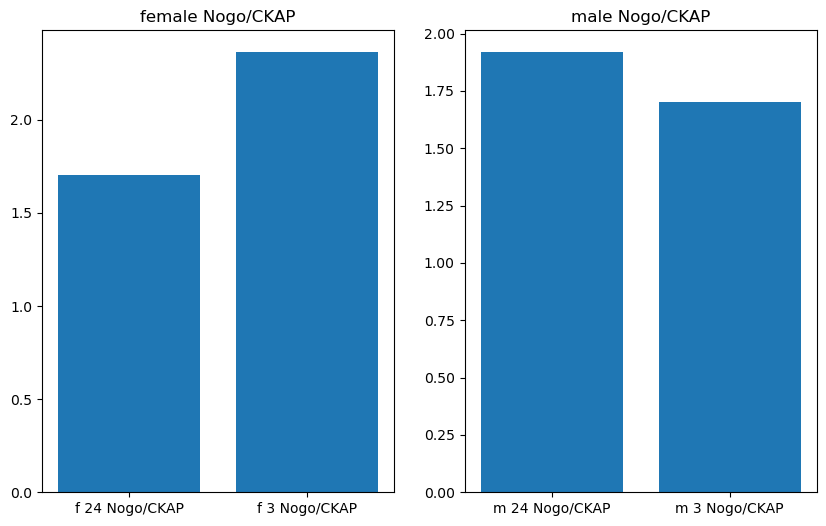

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
x_f = np.array(['f 24 Nogo/CKAP','f 3 Nogo/CKAP'])
y_f = np.array([np.mean(data_f_24_Nogo[:,2])/np.mean(data_f_24_CKAP[:,2]), np.mean(data_f_3_Nogo[:,2])/np.mean(data_f_3_CKAP[:,2])])
ax1.bar(x_f,y_f)
ax1.set_title('female Nogo/CKAP')
x_m = np.array(['m 24 Nogo/CKAP','m 3 Nogo/CKAP'])
y_m = np.array([np.mean(data_m_24_Nogo[:,2])/np.mean(data_m_24_CKAP[:,2]), np.mean(data_m_3_Nogo[:,2])/np.mean(data_m_3_CKAP[:,2])])
ax2.bar(x_m,y_m)
ax2.set_title('male Nogo/CKAP')
plt.plot()

# Redone with mouse specificity

In [149]:
excel_file_path_2 = '/Users/alexandra/Bachelor Project code/Full_Cell_Analysis_Update.xlsx'
sheet_name = 'Sheet1'
df_2 = pd.read_excel(excel_file_path_2, sheet_name=sheet_name)
data_2 = df_2.values
data_2n = data_2[:,2:7]
data_2n = np.hstack((data_2n, data_2[:,9:]))
print(data_2[10886])
print(data_2[10886][-2])

[68 0 58.97967229271899 42.28557348774178 0.716951652051853 8117
 '/home/quake/Documents/Doug/Mice_Structure/Fluorescence/3_month_liver/Secondary/male/Merged/analyze/Project001_m_GAR_t3_s07.tif'
 2 '3_month_liver' 'Secondary' 'male']
Secondary


In [150]:
print(data_2[20409][-5].split('/')[-1].split('_')[-2])
print(data_2[20409])

01
[23 0 24.9028013582343 24.83701188455008 0.9973581496821257 2356
 '/home/quake/Documents/Doug/Mice_Structure/Fluorescence/3_month_liver/Isotype/female/Merged/analyze/Project001_bad_Nogo_A_CKAP_4_01_s01.tif'
 1 '3_month_liver' 'Isotype' 'female']


In [151]:
data_m_24_GAR_l_t14 = []
data_m_24_GAR_l_t13 = []
data_f_24_GAR_l_t12 = []
data_f_24_GAR_l_t13 = []
data_m_24_CKAP_l_t14 = []
data_m_24_CKAP_l_t13 = []
data_f_24_CKAP_l_t12 = []
data_f_24_CKAP_l_t13 = []
data_m_24_Nogo_l_t14 = []
data_m_24_Nogo_l_t13 = []
data_f_24_Nogo_l_t12 = []
data_f_24_Nogo_l_t13 = []
data_m_24_CKAP4_Nogo_l_t14 = []
data_m_24_CKAP4_Nogo_l_t13 = []
data_f_24_CKAP4_Nogo_l_t12 = []
data_f_24_CKAP4_Nogo_l_t13 = []
data_m_3_GAR_l_t3 = []
data_m_3_GAR_l_t4 = []
data_m_3_GAR_l_t5 = []
data_f_3_GAR_l_t1 = []
data_f_3_GAR_l_t2 = []
data_m_3_CKAP_l_t3 = []
data_m_3_CKAP_l_t4 = []
data_m_3_CKAP_l_t5 = []
data_f_3_CKAP_l_t1 = []
data_f_3_CKAP_l_t2 = []
data_m_3_Nogo_l_t3 = []
data_m_3_Nogo_l_t4 = []
data_m_3_Nogo_l_t5 = []
data_f_3_Nogo_l_t1 = []
data_f_3_Nogo_l_t2 = []
data_m_3_CKAP4_Nogo_l_t3 = []
data_m_3_CKAP4_Nogo_l_t4 = []
data_m_3_CKAP4_Nogo_l_t5 = []
data_f_3_CKAP4_Nogo_l_t1 = []
data_f_3_CKAP4_Nogo_l_t2 = []

for i in range(len(data_2)):
    if data_2[i][-3] == '24_month_liver':
        if data_2[i][-1] == 'male' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't14' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't14':
            if data_2[i][-2] == 'Secondary':
                data_m_24_GAR_l_t14.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_m_24_CKAP_l_t14.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_m_24_Nogo_l_t14.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_m_24_CKAP4_Nogo_l_t14.append(data_2n[i])
        if data_2[i][-1] == 'male' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't13' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't13':
            if data_2[i][-2] == 'Secondary':
                data_m_24_GAR_l_t13.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_m_24_CKAP_l_t13.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_m_24_Nogo_l_t13.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_m_24_CKAP4_Nogo_l_t13.append(data_2n[i])
        if data_2[i][-1] == 'female' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't12' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't12':
            if data_2[i][-2] == 'Secondary':
                data_f_24_GAR_l_t12.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_f_24_CKAP_l_t12.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_f_24_Nogo_l_t12.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_f_24_CKAP4_Nogo_l_t12.append(data_2n[i])
        if data_2[i][-1] == 'female' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't13' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't13':
            if data_2[i][-2] == 'Secondary':
                data_f_24_GAR_l_t13.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_f_24_CKAP_l_t13.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_f_24_Nogo_l_t13.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_f_24_CKAP4_Nogo_l_t13.append(data_2n[i])
    if data_2[i][-3] == '3_month_liver':
        if data_2[i][-1] == 'male' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't3' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't3':
            if data_2[i][-2] == 'Secondary':
                data_m_3_GAR_l_t3.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_m_3_CKAP_l_t3.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_m_3_Nogo_l_t3.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_m_3_CKAP4_Nogo_l_t3.append(data_2n[i])
        if data_2[i][-1] == 'male' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't4' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't4':
            if data_2[i][-2] == 'Secondary':
                data_m_3_GAR_l_t4.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_m_3_CKAP_l_t4.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_m_3_Nogo_l_t4.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_m_3_CKAP4_Nogo_l_t4.append(data_2n[i])
        if data_2[i][-1] == 'male' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't5' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't5':
            if data_2[i][-2] == 'Secondary':
                data_m_3_GAR_l_t5.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_m_3_CKAP_l_t5.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_m_3_Nogo_l_t5.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_m_3_CKAP4_Nogo_l_t5.append(data_2n[i])            
        if data_2[i][-1] == 'female' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't1' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't1' or data_2[i][-5].split('/')[-1].split('_')[-2] == '01':
            if data_2[i][-2] == 'Secondary':
                data_f_3_GAR_l_t1.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_f_3_CKAP_l_t1.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_f_3_Nogo_l_t1.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_f_3_CKAP4_Nogo_l_t1.append(data_2n[i])
        if data_2[i][-1] == 'female' and data_2[i][-5].split('/')[-1].split('_')[-3] == 't2' or data_2[i][-5].split('/')[-1].split('_')[-2] == 't2' or data_2[i][-5].split('/')[-1].split('_')[-2] == '02':
            if data_2[i][-2] == 'Secondary':
                data_f_3_GAR_l_t2.append(data_2n[i])
            if data_2[i][-2] == 'CKAP4':
                data_f_3_CKAP_l_t2.append(data_2n[i])
            if data_2[i][-2] == 'NOGOA':
                data_f_3_Nogo_l_t2.append(data_2n[i])
            if data_2[i][-2] == 'Isotype':
                data_f_3_CKAP4_Nogo_l_t2.append(data_2n[i])
                
            

data_m_24_GAR_t14 = np.array(data_m_24_GAR_l_t14)
data_m_24_GAR_t13 = np.array(data_m_24_GAR_l_t13)
data_f_24_GAR_t12 = np.array(data_f_24_GAR_l_t12)
data_f_24_GAR_t13 = np.array(data_f_24_GAR_l_t13)
data_m_24_CKAP_t14 = np.array(data_m_24_CKAP_l_t14)
data_m_24_CKAP_t13 = np.array(data_m_24_CKAP_l_t13)
data_f_24_CKAP_t12 = np.array(data_f_24_CKAP_l_t12)
data_f_24_CKAP_t13 = np.array(data_f_24_CKAP_l_t13)
data_m_24_Nogo_t14 = np.array(data_m_24_Nogo_l_t14)
data_m_24_Nogo_t13 = np.array(data_m_24_Nogo_l_t14)
data_f_24_Nogo_t12 = np.array(data_f_24_Nogo_l_t12)
data_f_24_Nogo_t13 = np.array(data_f_24_Nogo_l_t13)
data_m_24_CKAP4_Nogo_t14 = np.array(data_m_24_CKAP4_Nogo_l_t14)
data_m_24_CKAP4_Nogo_t13 = np.array(data_m_24_CKAP4_Nogo_l_t13)
data_f_24_CKAP4_Nogo_t12 = np.array(data_f_24_CKAP4_Nogo_l_t12)
data_f_24_CKAP4_Nogo_t13 = np.array(data_f_24_CKAP4_Nogo_l_t13)
data_m_3_GAR_t3 = np.array(data_m_3_GAR_l_t3)
data_m_3_GAR_t4 = np.array(data_m_3_GAR_l_t4)
data_m_3_GAR_t5 = np.array(data_m_3_GAR_l_t5)
data_f_3_GAR_t1 = np.array(data_f_3_GAR_l_t1)
data_f_3_GAR_t2 = np.array(data_f_3_GAR_l_t2)
data_m_3_CKAP_t3 = np.array(data_m_3_CKAP_l_t3)
data_m_3_CKAP_t4 = np.array(data_m_3_CKAP_l_t4)
data_m_3_CKAP_t5 = np.array(data_m_3_CKAP_l_t5)
data_f_3_CKAP_t1 = np.array(data_f_3_CKAP_l_t1)
data_f_3_CKAP_t2 = np.array(data_f_3_CKAP_l_t2)
data_m_3_Nogo_t3 = np.array(data_m_3_Nogo_l_t3)
data_m_3_Nogo_t4 = np.array(data_m_3_Nogo_l_t4)
data_m_3_Nogo_t5 = np.array(data_m_3_Nogo_l_t5)
data_f_3_Nogo_t1 = np.array(data_f_3_Nogo_l_t1)
data_f_3_Nogo_t2 = np.array(data_f_3_Nogo_l_t2)
data_m_3_CKAP4_Nogo_t3 = np.array(data_m_3_CKAP4_Nogo_l_t3)
data_m_3_CKAP4_Nogo_t4 = np.array(data_m_3_CKAP4_Nogo_l_t4)
data_m_3_CKAP4_Nogo_t5 = np.array(data_m_3_CKAP4_Nogo_l_t5)
data_f_3_CKAP4_Nogo_t1 = np.array(data_f_3_CKAP4_Nogo_l_t1)
data_f_3_CKAP4_Nogo_t2 = np.array(data_f_3_CKAP4_Nogo_l_t2)

print(data_m_3_CKAP4_Nogo_t3[0])
data_f_24_CKAP_t12[0]

[40.20168368260791 15.70222102812108 0.3905861543533857 11166
 '/home/quake/Documents/Doug/Mice_Structure/Fluorescence/3_month_liver/Isotype/male/Merged/analyze/Project001_m_CKAP_Nogo_t3_s00.tif'
 'Isotype' 'male']


array([22.35515917814405, 22.35832016256491, 1.000141398430477, 4429,
       '/home/quake/Documents/Doug/Mice_Structure/Fluorescence/24_month_liver/CKAP4/female/Merged/analyze/24_month_liver_f_CKAP_4_t12_02_s00.tif',
       'CKAP4', 'female'], dtype=object)

### If you want to add the new CKAP (new concentration)

In [152]:
excel_file_path_3 = '/Users/alexandra/Bachelor Project code/Full_Cell_Analysis_CKAP4_update.xlsx'
sheet_name = 'Sheet1'
df_3 = pd.read_excel(excel_file_path_3, sheet_name=sheet_name)
data_3 = df_3.values
data_3n = data_3[:,2:7]
data_3n = np.hstack((data_3n, data_3[:,9:]))

data_m_24_CKAP_l_t14 = []
data_m_24_CKAP_l_t13 = []
data_f_24_CKAP_l_t12 = []
data_f_24_CKAP_l_t13 = []
data_m_3_CKAP_l_t3 = []
data_m_3_CKAP_l_t4 = []
data_m_3_CKAP_l_t5 = []
data_f_3_CKAP_l_t1 = []
data_f_3_CKAP_l_t2 = []

print('data_3',data_3[3195][-5].split('/')[-1].split('_')[-3])

for i in range(len(data_3)):
    if data_3[i][-3] == '24_month_liver' and data_3[i][-2] == 'CKAP4_2':
        '''
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't14' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't14':
            data_m_24_CKAP_l_t14.append(data_3n[i])
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't13' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't13':
            data_m_24_CKAP_l_t13.append(data_3n[i])
        '''
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't12' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't12':
            data_f_24_CKAP_l_t12.append(data_3n[i])
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't13' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't13':
            data_f_24_CKAP_l_t13.append(data_3n[i])
    if data_3[i][-3] == '3_month_liver' and data_3[i][-2] == 'CKAP4_2':
        '''
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't4' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't4':
            data_m_3_CKAP_l_t4.append(data_3n[i])
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't3' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't3':
            data_m_3_CKAP_l_t3.append(data_3n[i])
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't5' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't5':
            data_m_3_CKAP_l_t5.append(data_3n[i])
        '''
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't3' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't3':
            data_f_3_CKAP_l_t1.append(data_3n[i])
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't4' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't4':
            data_f_3_CKAP_l_t2.append(data_3n[i])
   

data_f_24_CKAP_t12 = np.array(data_f_24_CKAP_l_t12)
data_f_24_CKAP_t13 = np.array(data_f_24_CKAP_l_t13)
data_f_3_CKAP_t1 = np.array(data_f_3_CKAP_l_t1)
data_f_3_CKAP_t2 = np.array(data_f_3_CKAP_l_t2)

data_f_24_CKAP_t12[0]

data_3 t3


array([41.00179300727164, 24.44615997609324, 0.5962217303950031, 10039,
       '/home/quake/Documents/Doug/Mice_Structure/Fluorescence/24_month_liver/CKAP4_2/female/analysis/Merged/F_CKAP_4_redone_24mo_t12_01_s00.tif',
       'CKAP4_2', 'female'], dtype=object)

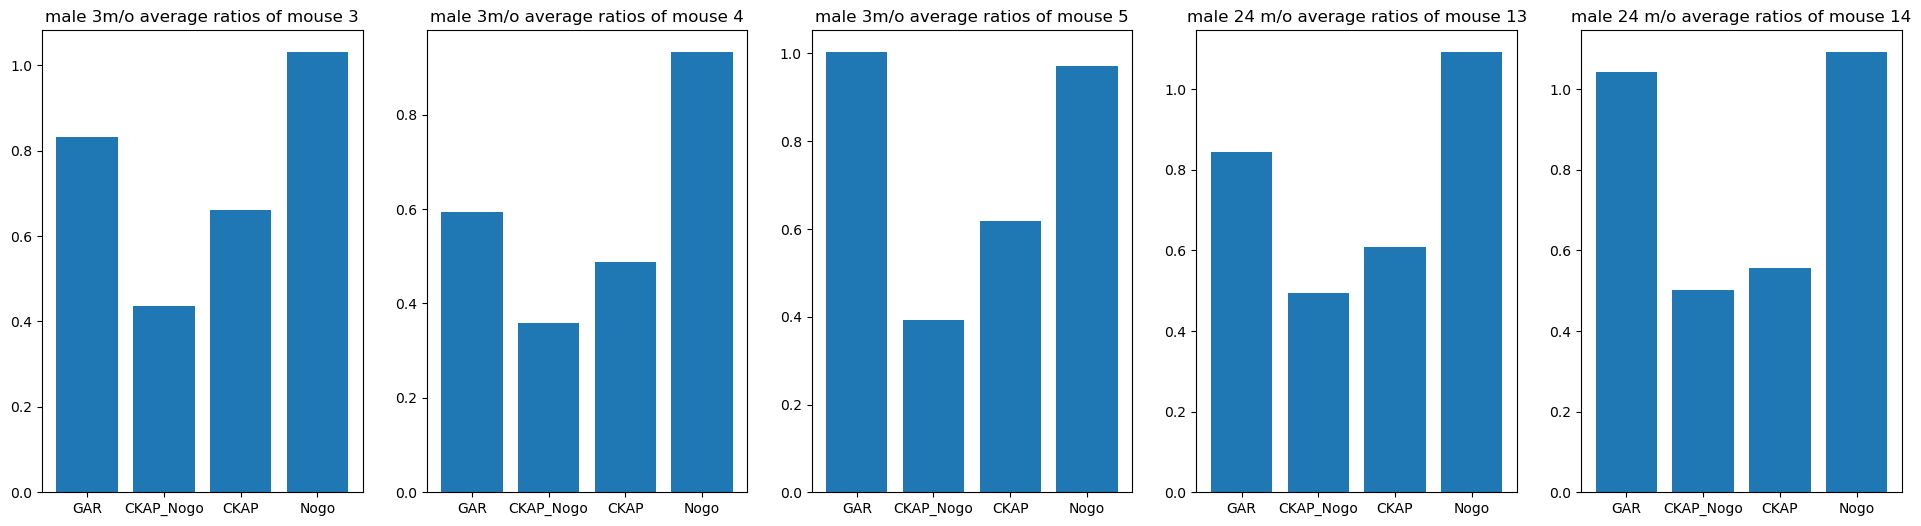

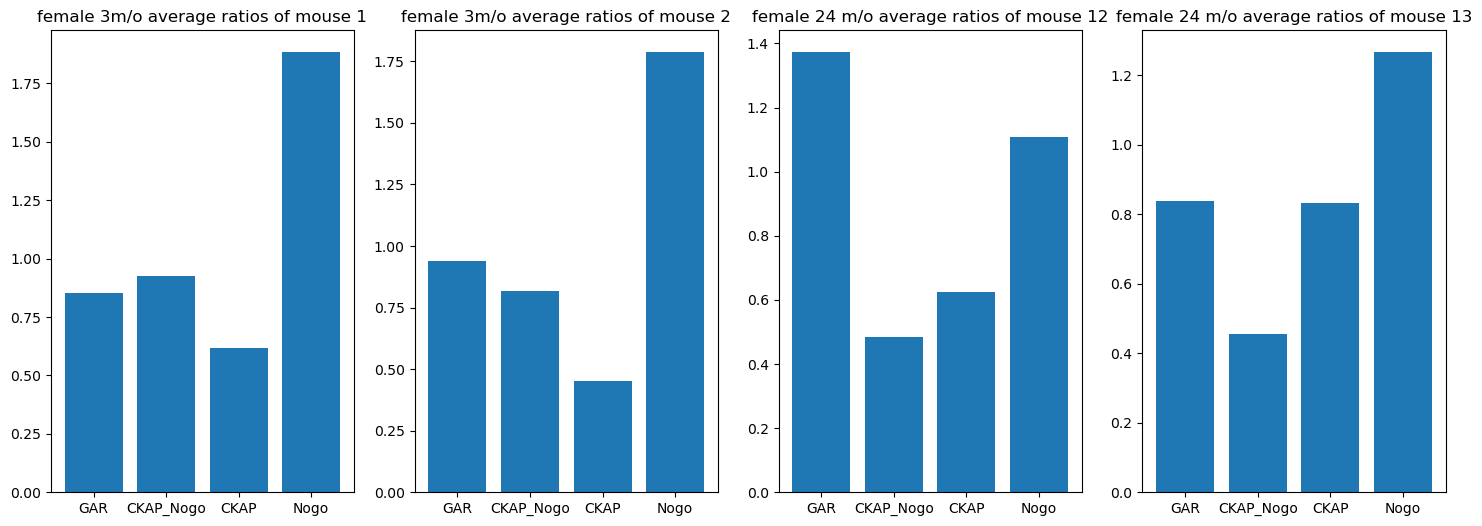

In [153]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 6))

x = np.array(['GAR','CKAP_Nogo','CKAP','Nogo'])

m_3_t3_ratios = np.array([np.mean(data_m_3_GAR_t3[:,2]),np.mean(data_m_3_CKAP4_Nogo_t3[:,2]),np.mean(data_m_3_CKAP_t3[:,2]),np.mean(data_m_3_Nogo_t3[:,2])])
ax1.bar(x,m_3_t3_ratios)
ax1.set_title('male 3m/o average ratios of mouse 3')

m_3_t4_ratios = np.array([np.mean(data_m_3_GAR_t4[:,2]),np.mean(data_m_3_CKAP4_Nogo_t4[:,2]),np.mean(data_m_3_CKAP_t4[:,2]),np.mean(data_m_3_Nogo_t4[:,2])])
ax2.bar(x,m_3_t4_ratios)
ax2.set_title('male 3m/o average ratios of mouse 4')

m_3_t5_ratios = np.array([np.mean(data_m_3_GAR_t5[:,2]),np.mean(data_m_3_CKAP4_Nogo_t5[:,2]),np.mean(data_m_3_CKAP_t5[:,2]),np.mean(data_m_3_Nogo_t5[:,2])])
ax3.bar(x,m_3_t5_ratios)
ax3.set_title('male 3m/o average ratios of mouse 5')

m_24_t13_ratios = np.array([np.mean(data_m_24_GAR_t13[:,2]),np.mean(data_m_24_CKAP4_Nogo_t13[:,2]),np.mean(data_m_24_CKAP_t13[:,2]),np.mean(data_m_24_Nogo_t13[:,2])])
ax4.bar(x,m_24_t13_ratios)
ax4.set_title('male 24 m/o average ratios of mouse 13')

m_24_t14_ratios = np.array([np.mean(data_m_24_GAR_t14[:,2]),np.mean(data_m_24_CKAP4_Nogo_t14[:,2]),np.mean(data_m_24_CKAP_t14[:,2]),np.mean(data_m_24_Nogo_t14[:,2])])
ax5.bar(x,m_24_t14_ratios)
ax5.set_title('male 24 m/o average ratios of mouse 14')

plt.show()


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6))
        
f_3_t1_ratios = np.array([np.mean(data_f_3_GAR_t1[:,2]),np.mean(data_f_3_CKAP4_Nogo_t1[:,2]),np.mean(data_f_3_CKAP_t1[:,2]),np.mean(data_f_3_Nogo_t1[:,2])])
ax1.bar(x,f_3_t1_ratios)
ax1.set_title('female 3m/o average ratios of mouse 1')

f_3_t2_ratios = np.array([np.mean(data_f_3_GAR_t2[:,2]),np.mean(data_f_3_CKAP4_Nogo_t2[:,2]),np.mean(data_f_3_CKAP_t2[:,2]),np.mean(data_f_3_Nogo_t2[:,2])])
ax2.bar(x,f_3_t2_ratios)
ax2.set_title('female 3m/o average ratios of mouse 2')

f_24_t12_ratios = np.array([np.mean(data_f_24_GAR_t12[:,2]),np.mean(data_f_24_CKAP4_Nogo_t12[:,2]),np.mean(data_f_24_CKAP_t12[:,2]),np.mean(data_f_24_Nogo_t12[:,2])])
ax3.bar(x,f_24_t12_ratios)
ax3.set_title('female 24 m/o average ratios of mouse 12')

f_24_t13_ratios = np.array([np.mean(data_f_24_GAR_t13[:,2]),np.mean(data_f_24_CKAP4_Nogo_t13[:,2]),np.mean(data_f_24_CKAP_t13[:,2]),np.mean(data_f_24_Nogo_t13[:,2])])
ax4.bar(x,f_24_t13_ratios)
ax4.set_title('female 24 m/o average ratios of mouse 13')

plt.show()

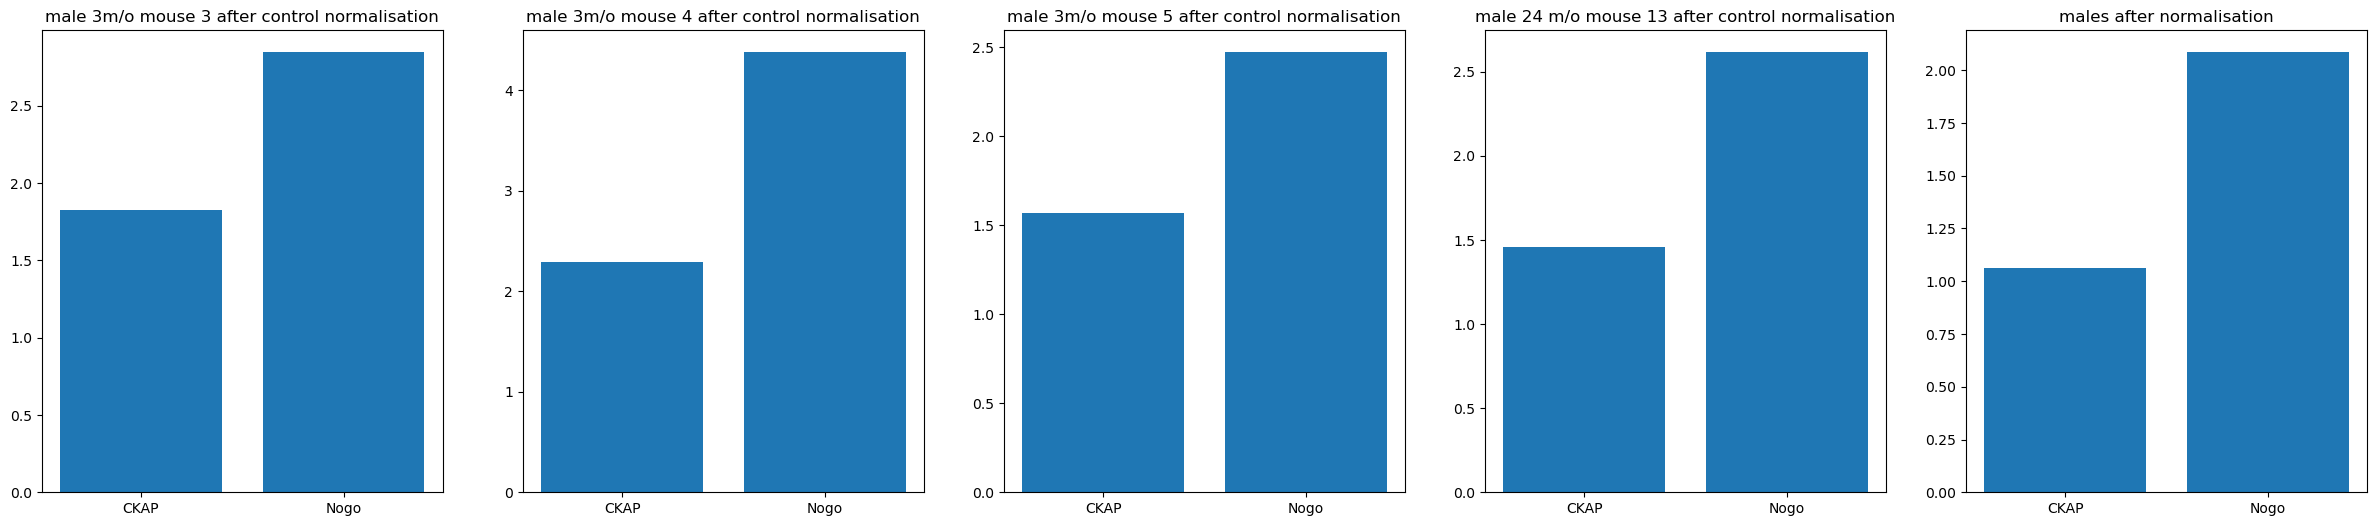

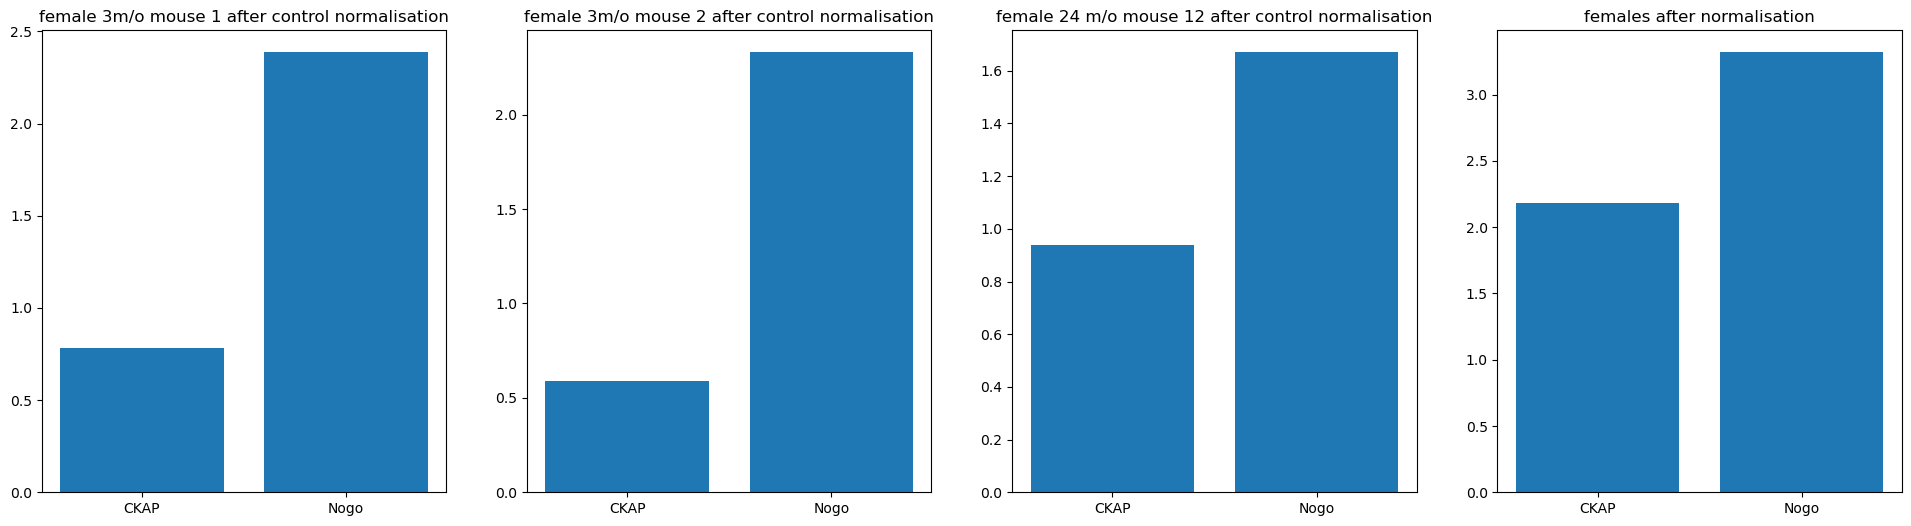

In [154]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 6))

x = np.array(['CKAP','Nogo'])

m_3_t3_ratios = np.array([np.mean(data_m_3_CKAP_t3[:,2])/(np.mean(data_m_3_GAR_t3[:,2])*np.mean(data_m_3_CKAP4_Nogo_t3[:,2])),np.mean(data_m_3_Nogo_t3[:,2])/(np.mean(data_m_3_GAR_t3[:,2])*np.mean(data_m_3_CKAP4_Nogo_t3[:,2]))])
ax1.bar(x,m_3_t3_ratios)
ax1.set_title('male 3m/o mouse 3 after control normalisation')

m_3_t4_ratios = np.array([np.mean(data_m_3_CKAP_t4[:,2])/(np.mean(data_m_3_GAR_t4[:,2])*np.mean(data_m_3_CKAP4_Nogo_t4[:,2])),np.mean(data_m_3_Nogo_t4[:,2])/(np.mean(data_m_3_GAR_t4[:,2])*np.mean(data_m_3_CKAP4_Nogo_t4[:,2]))])
ax2.bar(x,m_3_t4_ratios)
ax2.set_title('male 3m/o mouse 4 after control normalisation')

m_3_t5_ratios = np.array([np.mean(data_m_3_CKAP_t5[:,2])/(np.mean(data_m_3_GAR_t5[:,2])*np.mean(data_m_3_CKAP4_Nogo_t5[:,2])),np.mean(data_m_3_Nogo_t5[:,2])/(np.mean(data_m_3_GAR_t5[:,2])*np.mean(data_m_3_CKAP4_Nogo_t5[:,2]))])
ax3.bar(x,m_3_t5_ratios)
ax3.set_title('male 3m/o mouse 5 after control normalisation')

m_24_t13_ratios = np.array([np.mean(data_m_24_CKAP_t13[:,2])/(np.mean(data_m_24_GAR_t13[:,2])*np.mean(data_m_24_CKAP4_Nogo_t13[:,2])),np.mean(data_m_24_Nogo_t13[:,2])/(np.mean(data_m_24_GAR_t13[:,2])*np.mean(data_m_24_CKAP4_Nogo_t13[:,2]))])
ax4.bar(x,m_24_t13_ratios)
ax4.set_title('male 24 m/o mouse 13 after control normalisation')

m_24_t14_ratios = np.array([np.mean(data_m_24_CKAP_t14[:,2])/(np.mean(data_m_24_GAR_t14[:,2])*np.mean(data_m_24_CKAP4_Nogo_t14[:,2])),np.mean(data_m_24_Nogo_t14[:,2])/(np.mean(data_m_24_GAR_t14[:,2])*np.mean(data_m_24_CKAP4_Nogo_t14[:,2]))])
ax5.bar(x,m_24_t14_ratios)
ax5.set_title('male 24 m/o mouse 14 after control normalisation')

plt.title('males after normalisation')
plt.show()


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
        
f_3_t1_ratios = np.array([np.mean(data_f_3_CKAP_t1[:,2])/(np.mean(data_f_3_GAR_t1[:,2])*np.mean(data_f_3_CKAP4_Nogo_t1[:,2])),np.mean(data_f_3_Nogo_t1[:,2])/(np.mean(data_f_3_GAR_t1[:,2])*np.mean(data_f_3_CKAP4_Nogo_t1[:,2]))])
ax1.bar(x,f_3_t1_ratios)
ax1.set_title('female 3m/o mouse 1 after control normalisation')

f_3_t2_ratios = np.array([np.mean(data_f_3_CKAP_t2[:,2])/(np.mean(data_f_3_GAR_t2[:,2])*np.mean(data_f_3_CKAP4_Nogo_t2[:,2])),np.mean(data_f_3_Nogo_t2[:,2])/(np.mean(data_f_3_GAR_t2[:,2])*np.mean(data_f_3_CKAP4_Nogo_t2[:,2]))])
ax2.bar(x,f_3_t2_ratios)
ax2.set_title('female 3m/o mouse 2 after control normalisation')

f_24_t12_ratios = np.array([np.mean(data_f_24_CKAP_t12[:,2])/(np.mean(data_f_24_GAR_t12[:,2])*np.mean(data_f_24_CKAP4_Nogo_t12[:,2])),np.mean(data_f_24_Nogo_t12[:,2])/(np.mean(data_f_24_GAR_t12[:,2])*np.mean(data_f_24_CKAP4_Nogo_t12[:,2]))])
ax3.bar(x,f_24_t12_ratios)
ax3.set_title('female 24 m/o mouse 12 after control normalisation')

f_24_t13_ratios = np.array([np.mean(data_f_24_CKAP_t13[:,2])/(np.mean(data_f_24_GAR_t13[:,2])*np.mean(data_f_24_CKAP4_Nogo_t13[:,2])),np.mean(data_f_24_Nogo_t13[:,2])/(np.mean(data_f_24_GAR_t13[:,2])*np.mean(data_f_24_CKAP4_Nogo_t13[:,2]))])
ax4.bar(x,f_24_t13_ratios)
ax4.set_title('female 24 m/o mouse 13 after control normalisation')

plt.title('females after normalisation')
plt.show()

[1.89771221 3.23179813]
[1.89771221 1.26017172]


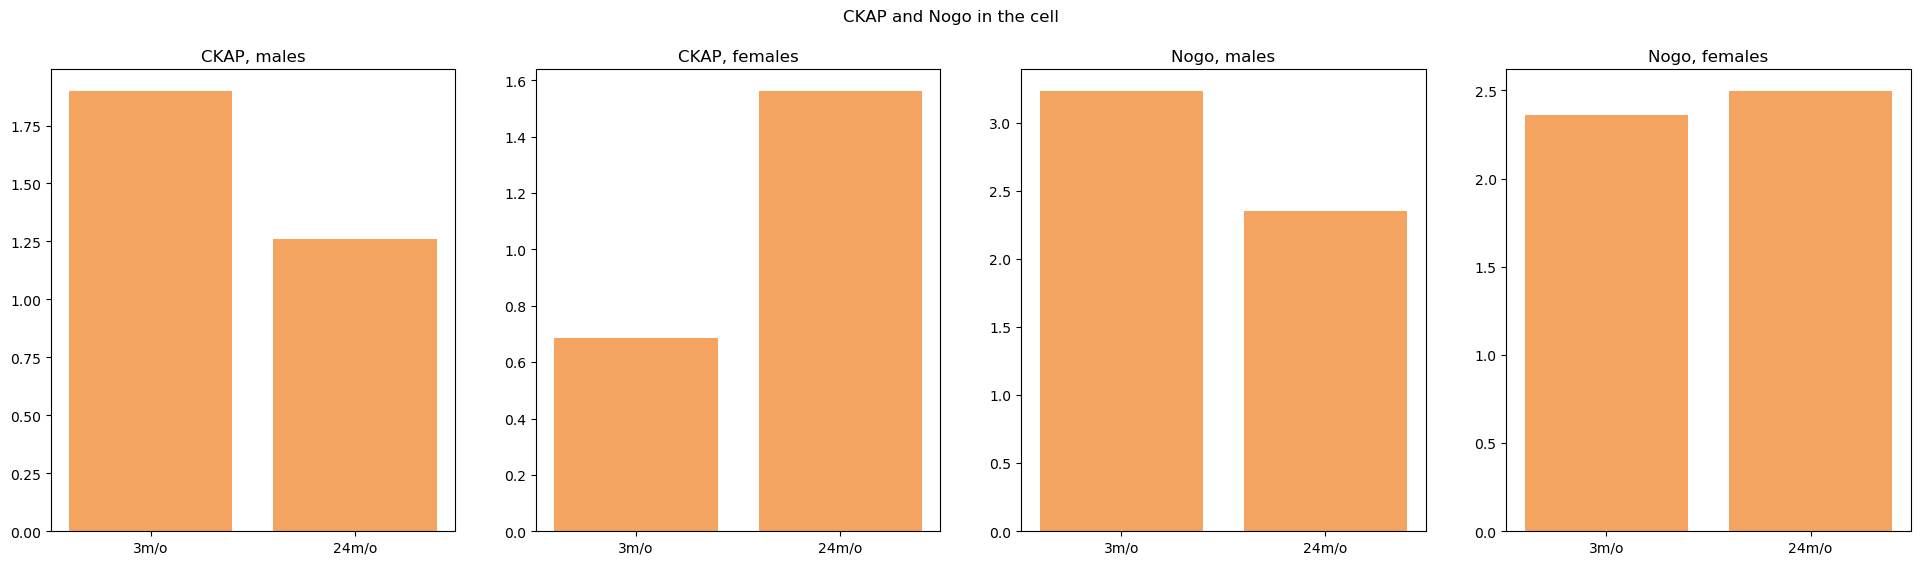

"\ndifference = np.array([CKAP_m[1]-CKAP_m[0], CKAP_f[1]-CKAP_f[0],Nogo_m[1]-Nogo_m[0],Nogo_f[1]-Nogo_f[0]])\nx_d = np.array(['CKAP m','CKAP f','Nogo m','Nogo f'])\n\nplt.bar(x_d,difference)\nplt.title('difference between 24m/o and 3m/o (24-3)')\nplt.show()\n"

In [155]:
#0 = ckap4, 1 = Nogo
mean_3m = np.array([np.mean(np.array([m_3_t3_ratios[0], m_3_t4_ratios[0], m_3_t5_ratios[0]])), 
                    np.mean(np.array([m_3_t3_ratios[1], m_3_t4_ratios[1], m_3_t5_ratios[1]]))])
mean_3f = np.array([np.mean(np.array([f_3_t1_ratios[0], f_3_t2_ratios[0]])), 
                    np.mean(np.array([f_3_t1_ratios[1], f_3_t2_ratios[1]]))])
mean_24m = np.array([np.mean(np.array([m_24_t13_ratios[0], m_24_t14_ratios[0]])), 
                    np.mean(np.array([m_24_t13_ratios[1], m_24_t14_ratios[1]]))])
mean_24f = np.array([np.mean(np.array([f_24_t12_ratios[0], f_24_t13_ratios[0]])), 
                    np.mean(np.array([f_24_t12_ratios[1], f_24_t13_ratios[1]]))])

print(mean_3m)

CKAP_m = np.array([mean_3m[0], mean_24m[0]])
CKAP_f = np.array([mean_3f[0], mean_24f[0]])
Nogo_m = np.array([mean_3m[1], mean_24m[1]])
Nogo_f = np.array([mean_3f[1], mean_24f[1]])
print(CKAP_m)

x = np.array(['3m/o','24m/o'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.bar(x,CKAP_m,color = 'sandybrown')
ax1.set_title('CKAP, males')

ax2.bar(x,CKAP_f,color = 'sandybrown')
ax2.set_title('CKAP, females')

ax3.bar(x, Nogo_m,color = 'sandybrown')
ax3.set_title('Nogo, males')

ax4.bar(x, Nogo_f,color = 'sandybrown')
ax4.set_title('Nogo, females')

fig.suptitle('CKAP and Nogo in the cell')

plt.show()
'''
difference = np.array([CKAP_m[1]-CKAP_m[0], CKAP_f[1]-CKAP_f[0],Nogo_m[1]-Nogo_m[0],Nogo_f[1]-Nogo_f[0]])
x_d = np.array(['CKAP m','CKAP f','Nogo m','Nogo f'])

plt.bar(x_d,difference)
plt.title('difference between 24m/o and 3m/o (24-3)')
plt.show()
'''

## Proving this ^ statistically

In [156]:
print('Full cell analysis difference between Nogo-A and CKAP after normalisation, statistical proof')

def normalisation(data, nor_1, nor_2):
    return data/(np.mean(nor_1)*np.mean(nor_2))

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

def confidence_interval(group1_data, group2_data):
    mean_group1 = np.mean(group1_data)
    mean_group2 = np.mean(group2_data)
    std_group1 = np.std(group1_data, ddof=1) 
    std_group2 = np.std(group2_data, ddof=1)

    pooled_std = np.sqrt(((len(group1_data) - 1) * std_group1**2 + (len(group2_data) - 1) * std_group2**2) / (len(group1_data) + len(group2_data) - 2))
    alpha = 0.05  # Set the desired confidence level (e.g., 95%)
    standard_error = pooled_std * np.sqrt(1 / len(group1_data) + 1 / len(group2_data))
    margin_of_error = stats.t.ppf(1 - alpha / 2, len(group1_data) + len(group2_data) - 2) * standard_error

    lower_ci = (mean_group1 - mean_group2) - margin_of_error
    upper_ci = (mean_group1 - mean_group2) + margin_of_error
    
    return lower_ci,upper_ci

#------------------------------------------------------------------------------------------------------------
print('CKAP')
n_1 = normalisation(data_m_3_CKAP_t3[:,2],data_m_3_GAR_t3[:,2],data_m_3_CKAP4_Nogo_t3[:,2])
n_2 = normalisation(data_m_3_CKAP_t4[:,2],data_m_3_GAR_t4[:,2],data_m_3_CKAP4_Nogo_t4[:,2])
n_3 = normalisation(data_m_3_CKAP_t5[:,2],data_m_3_GAR_t5[:,2],data_m_3_CKAP4_Nogo_t5[:,2])

n_4 = normalisation(data_m_24_CKAP_t13[:,2],data_m_24_GAR_t13[:,2],data_m_24_CKAP4_Nogo_t13[:,2])
n_5 = normalisation(data_m_24_CKAP_t14[:,2],data_m_24_GAR_t14[:,2],data_m_24_CKAP4_Nogo_t14[:,2])

n_6 = normalisation(data_f_3_CKAP_t1[:,2],data_f_3_GAR_t1[:,2],data_f_3_CKAP4_Nogo_t1[:,2])
n_7 = normalisation(data_f_3_CKAP_t2[:,2],data_f_3_GAR_t2[:,2],data_f_3_CKAP4_Nogo_t2[:,2])

n_8 = normalisation(data_f_24_CKAP_t12[:,2],data_f_24_GAR_t12[:,2],data_f_24_CKAP4_Nogo_t12[:,2])
n_9 = normalisation(data_f_24_CKAP_t13[:,2],data_f_24_GAR_t13[:,2],data_f_24_CKAP4_Nogo_t13[:,2])


CKAP_m_3 = np.concatenate((n_1,n_2,n_3))
CKAP_m_24 = np.concatenate((n_4,n_5))
CKAP_f_3 = np.concatenate((n_6,n_7))
CKAP_f_24 = np.concatenate((n_8,n_9))

d_m_3_24 = cohen_d(CKAP_m_3, CKAP_m_24)
d_f_3_24 = cohen_d(CKAP_f_3, CKAP_f_24)
d_m_f_3 = cohen_d(CKAP_m_3, CKAP_f_3)
d_m_f_24 = cohen_d(CKAP_m_24, CKAP_f_24)

print("Cohen's D between male 3 and 24 months:", d_m_3_24)
print("Cohen's D between female 3 and 24 months:", d_f_3_24)
print("Cohen's D between male and female at 3 months:", d_m_f_3)
print("Cohen's D between male and female at 24 months:", d_m_f_24)
print(' ')
#------------------------------------------------------------------------------------------------------------
print('Nogo-A')
n_1 = normalisation(data_m_3_Nogo_t3[:,2],data_m_3_GAR_t3[:,2],data_m_3_CKAP4_Nogo_t3[:,2])
n_2 = normalisation(data_m_3_Nogo_t4[:,2],data_m_3_GAR_t4[:,2],data_m_3_CKAP4_Nogo_t4[:,2])
n_3 = normalisation(data_m_3_Nogo_t5[:,2],data_m_3_GAR_t5[:,2],data_m_3_CKAP4_Nogo_t5[:,2])

n_4 = normalisation(data_m_24_Nogo_t13[:,2],data_m_24_GAR_t13[:,2],data_m_24_CKAP4_Nogo_t13[:,2])
n_5 = normalisation(data_m_24_Nogo_t14[:,2],data_m_24_GAR_t14[:,2],data_m_24_CKAP4_Nogo_t14[:,2])

n_6 = normalisation(data_f_3_Nogo_t1[:,2],data_f_3_GAR_t1[:,2],data_f_3_CKAP4_Nogo_t1[:,2])
n_7 = normalisation(data_f_3_Nogo_t2[:,2],data_f_3_GAR_t2[:,2],data_f_3_CKAP4_Nogo_t2[:,2])

n_8 = normalisation(data_f_24_Nogo_t12[:,2],data_f_24_GAR_t12[:,2],data_f_24_CKAP4_Nogo_t12[:,2])
n_9 = normalisation(data_f_24_Nogo_t13[:,2],data_f_24_GAR_t13[:,2],data_f_24_CKAP4_Nogo_t13[:,2])


Nogo_m_3 = np.concatenate((n_1,n_2,n_3))
Nogo_m_24 = np.concatenate((n_4,n_5))
Nogo_f_3 = np.concatenate((n_6,n_7))
Nogo_f_24 = np.concatenate((n_8,n_9))


d_m_3_24 = cohen_d(Nogo_m_3, Nogo_m_24)
d_f_3_24 = cohen_d(Nogo_f_3, Nogo_f_24)
d_m_f_3 = cohen_d(Nogo_m_3, Nogo_f_3)
d_m_f_24 = cohen_d(Nogo_m_24, Nogo_f_24)

print("Cohen's D between male 3 and 24 months:", d_m_3_24)
print("Cohen's D between female 3 and 24 months:", d_f_3_24)
print("Cohen's D between male and female at 3 months:", d_m_f_3)
print("Cohen's D between male and female at 24 months:", d_m_f_24)

print(' ')
#------------------------------------------------------------------------------------------------------------
print('Cohens D info:')
print('small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8')

Full cell analysis difference between Nogo-A and CKAP after normalisation, statistical proof
CKAP
Cohen's D between male 3 and 24 months: 1.6380750247961497
Cohen's D between female 3 and 24 months: -1.3471092091681165
Cohen's D between male and female at 3 months: 3.2338681045237005
Cohen's D between male and female at 24 months: -0.3833698637295782
 
Nogo-A
Cohen's D between male 3 and 24 months: 0.8866010557973393
Cohen's D between female 3 and 24 months: -0.14323475288151769
Cohen's D between male and female at 3 months: 0.7716713314324881
Cohen's D between male and female at 24 months: -0.18315385946814297
 
Cohens D info:
small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8


Violoin plots for full cell analysis CKAP and Nogo

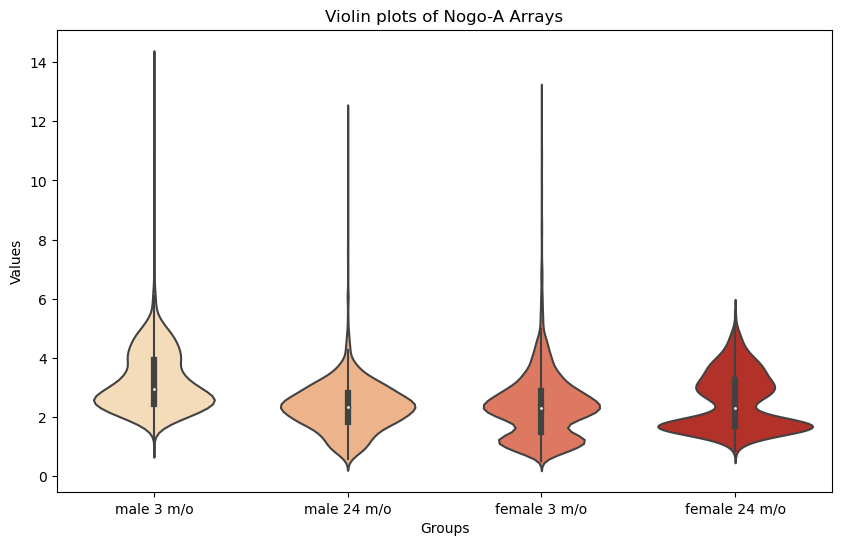

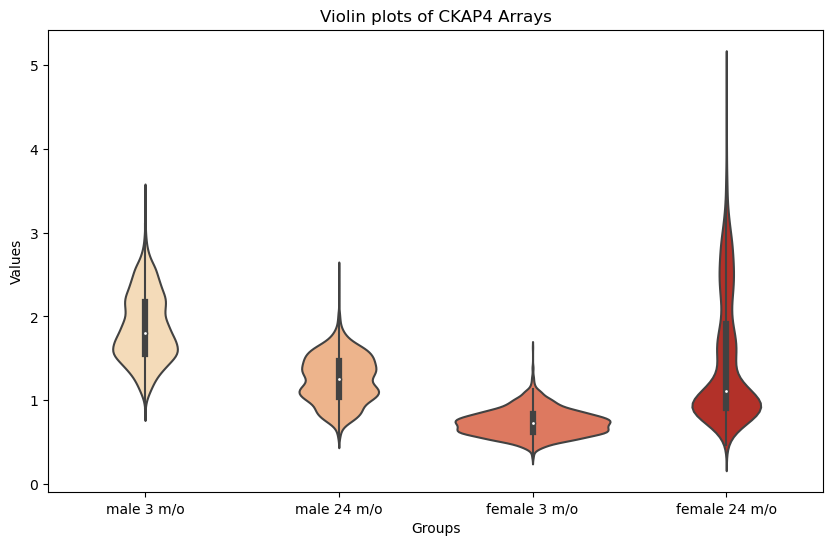

In [157]:
df1_Nogo = pd.DataFrame({'Value': Nogo_m_3, 'Group': 'male 3 m/o'})
df2_Nogo = pd.DataFrame({'Value': Nogo_m_24, 'Group': 'male 24 m/o'})
df3_Nogo = pd.DataFrame({'Value': Nogo_f_3, 'Group': 'female 3 m/o'})
df4_Nogo = pd.DataFrame({'Value': Nogo_f_24, 'Group': 'female 24 m/o'})

df_Nogo = pd.concat([df1_Nogo, df2_Nogo, df3_Nogo, df4_Nogo], ignore_index=True)
df_Nogo['Value'] = pd.to_numeric(df_Nogo['Value'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_Nogo, palette = 'OrRd')
plt.title('Violin plots of Nogo-A Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

df1_CKAP = pd.DataFrame({'Value': CKAP_m_3, 'Group': 'male 3 m/o'})
df2_CKAP = pd.DataFrame({'Value': CKAP_m_24, 'Group': 'male 24 m/o'})
df3_CKAP = pd.DataFrame({'Value': CKAP_f_3, 'Group': 'female 3 m/o'})
df4_CKAP = pd.DataFrame({'Value': CKAP_f_24, 'Group': 'female 24 m/o'})

df_CKAP = pd.concat([df1_CKAP, df2_CKAP, df3_CKAP, df4_CKAP], ignore_index=True)
df_CKAP['Value'] = pd.to_numeric(df_CKAP['Value'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_CKAP, palette = 'OrRd')
plt.title('Violin plots of CKAP4 Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

proving that this ^ is statistically true

male 3 m/o
0       3.132768
1       2.806430
2       2.702965
3       3.058886
4       3.081119
          ...   
4431    1.562803
4432    1.777692
4433    2.360996
4434    1.688018
4435    2.300613
Name: Value, Length: 4436, dtype: float64


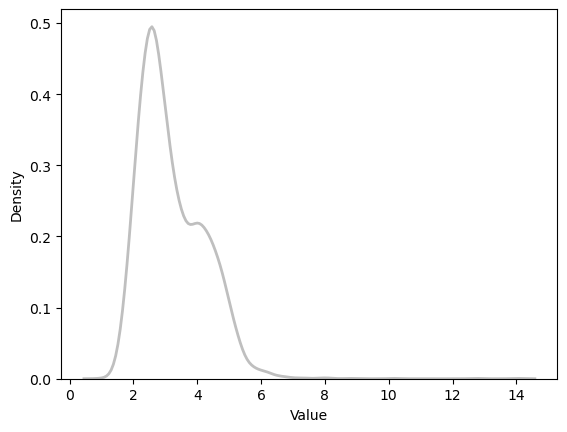

max y and x 2.5780229250291296 0.49492339767320886
male 24 m/o
4436    2.178637
4437    2.167429
4438    1.917565
4439    4.353364
4440    2.168095
          ...   
6497    2.078305
6498    1.988834
6499    2.625585
6500    1.783698
6501    1.584331
Name: Value, Length: 2066, dtype: float64


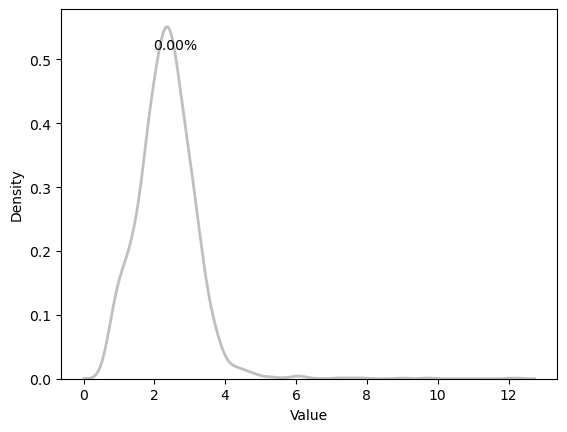

max y and x 2.379686067417036 0.5512349783700584
female 3 m/o
6502     1.436683
6503     1.287025
6504     1.239576
6505     1.402801
6506     1.412997
           ...   
19079    2.571297
19080    2.661422
19081    2.898657
19082    2.658585
19083    2.678638
Name: Value, Length: 12582, dtype: float64


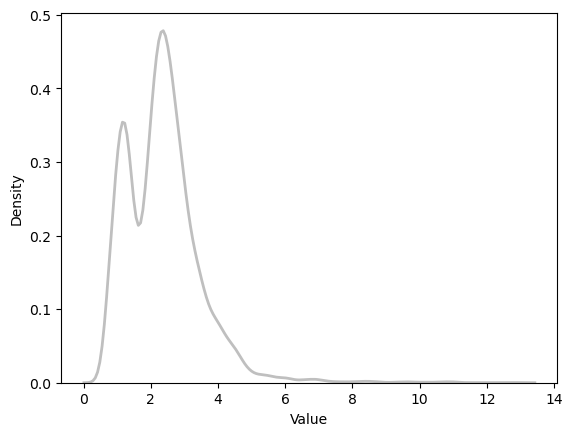

max y and x 2.3703346552713924 0.47825591614851415
we are in the if
highest val 0.3352334416675383
Lowest x at 0.4-0.95 range: 3.448818786494966


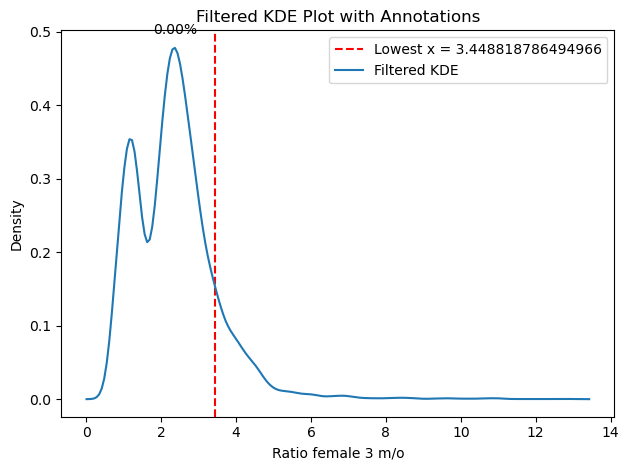

female 24 m/o
19084    1.344149
19085    1.290030
19086    1.466545
19087    1.236213
19088    1.323700
           ...   
21855    3.037968
21856    2.247086
21857    3.157353
21858    3.349766
21859    2.263806
Name: Value, Length: 2776, dtype: float64


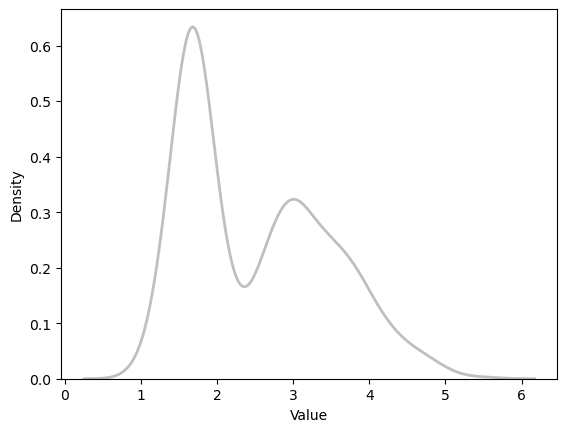

max y and x 1.6818455103913157 0.633991017709672
male 3 m/o
0       1.476670
1       1.412078
2       1.400366
3       1.433962
4       1.453628
          ...   
4922    1.198878
4923    1.432724
4924    1.316196
4925    1.446315
4926    1.428664
Name: Value, Length: 4927, dtype: float64


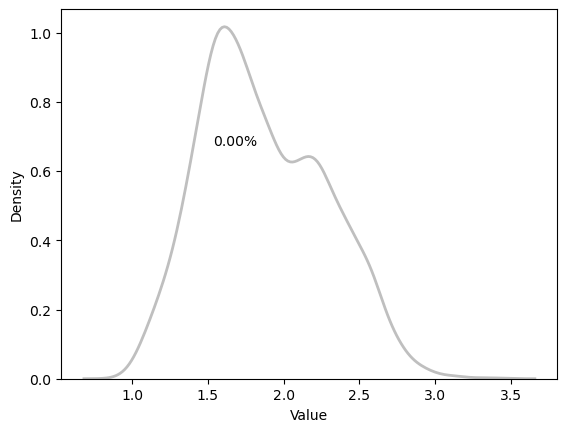

max y and x 1.609440983884855 1.0170903229004737
male 24 m/o
4927    1.540369
4928    1.682753
4929    1.518003
4930    1.446916
4931    1.719656
          ...   
7047    0.846198
7048    1.219582
7049    1.128607
7050    0.759914
7051    0.918769
Name: Value, Length: 2125, dtype: float64


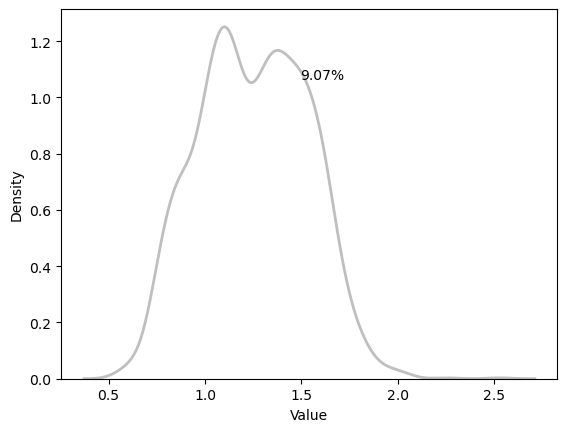

max y and x 1.1006902609669877 1.2513025136698723
female 3 m/o
7052    0.618336
7053    0.580596
7054    0.584216
7055    0.614032
7056    0.618401
          ...   
9349    0.441055
9350    0.426575
9351    0.519128
9352    0.450503
9353    0.503999
Name: Value, Length: 2302, dtype: float64


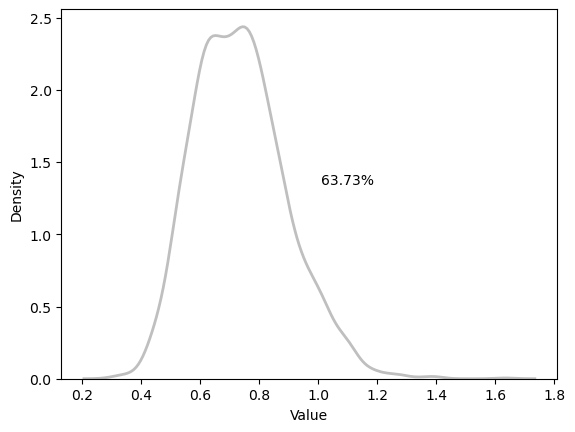

max y and x 0.7436390966173617 2.437219683201238
we are in the if


ValueError: attempt to get argmin of an empty sequence

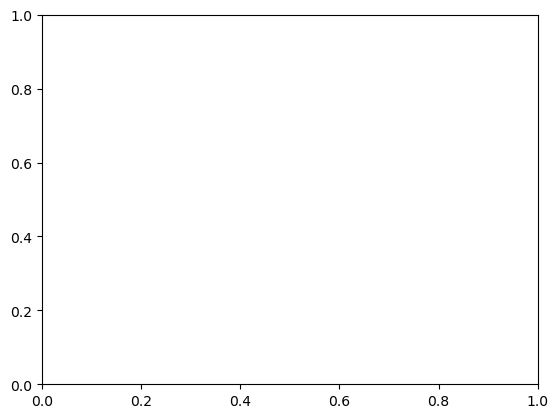

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_Nogo and df_CKAP are already defined and prepared as mentioned

# Process each DataFrame
def process_dataframe(df):
    i = 0

    for group in df['Group'].unique():
        print(group)
        subset = df[df['Group'] == group]['Value']
        print(subset)
        kde = sns.kdeplot(subset, color='gray', linewidth=2, alpha=0.5)
        plt.show()  # Show the KDE plot to see where it might be useful to place annotations

        x = kde.get_lines()[0].get_data()[0]
        y = kde.get_lines()[0].get_data()[1]

        # Identifying a percentage based on a threshold in density
        bump_indices = y > 1.0  # Adjust the threshold according to your dataset specifics
        percentage = sum(y[bump_indices]) / sum(y) if sum(y) != 0 else 0
        percentage_label = f'{percentage:.2%}'

        max_x = x[y.argmax()]
        max_y = y.max()
        
        print('max y and x', max_x, max_y)

        plt.annotate(
            percentage_label, 
            xy=(max_x, max_y),
            xytext=(0, 10), 
            textcoords='offset points',
            ha='center', 
            fontsize=10, 
            color='black'
        )
        '''
        plt.xlabel(f'Ratio {group}')
        plt.ylabel("Density")
        plt.title("Density Plot with Percentage Annotations")
        plt.legend(loc="upper left")
        plt.tight_layout()
        plt.show()
        '''
        # Further analysis with specific x ranges
        # Example: filtering and finding specific points as in your original script
        # Adapted to this context by setting custom x ranges and further analysis

        # Your additional logic for filtered indices, lowest_x_1, lowest_x_2, lowest_x_3
        # would be implemented here similar to your original script
        
        # Remember to adapt these ranges based on the output KDE plots
        if i == 2:
            print('we are in the if')
            filtered_indices = np.where((x >= 2.8) & (x <= 3.5))
            filtered_x = x[filtered_indices]
            filtered_y = y[filtered_indices]

            min_y_index = np.argmin(filtered_y)
            lowest_x_1 = filtered_x[min_y_index]
            
            highest_x_1 = filtered_y.max()
            
            print('highest val', highest_x_1)

            # Example of how you might print and visualize this
            print(f"Lowest x at 0.4-0.95 range: {lowest_x_1}")
            plt.axvline(x=lowest_x_1, color='red', linestyle='--', label=f'Lowest x = {lowest_x_1}')
            plt.plot(x, y, label='Filtered KDE')
            plt.xlabel(f'Ratio {group}')
            plt.ylabel("Density")
            plt.title("Filtered KDE Plot with Annotations")
            plt.legend()
            plt.tight_layout()
            plt.show()
        i+=1

# Process both data frames
process_dataframe(df_Nogo)
process_dataframe(df_CKAP)


In [159]:
df_Nogo

,Value,Group
0,3.132768,male 3 m/o
1,2.806430,male 3 m/o
2,2.702965,male 3 m/o
3,3.058886,male 3 m/o
4,3.081119,male 3 m/o
...,...,...
21855,3.037968,female 24 m/o
21856,2.247086,female 24 m/o
21857,3.157353,female 24 m/o
21858,3.349766,female 24 m/o


In [160]:
def make_array(group_1, group_2, group_3, data):
    variable_name = f"{group_1}_{group_2}_{group_3}"
    result = {}    
    result[variable_name] = data
    
    return result

group_1 = 'one'
group_2 = 'two'
group_3 = 'three'
data = np.array([1,2])
result = make_array(group_1,group_2,group_3,data)
variable_name = list(result.keys())[0]
data_value = result[variable_name]
print(result)
data_value[0]

{'one_two_three': array([1, 2])}


1

In [181]:
Nogo_f_3_subset_1 = []
Nogo_f_3_subset_2 = []
Nogo_f_24_subset_1 = []
Nogo_f_24_subset_2 = []
Nogo_m_3_subset_1 = []
Nogo_m_3_subset_2 = []
Nogo_m_24_subset_1 = []
Nogo_m_24_subset_2 = []

CKAP_f_3_subset_1 = []
CKAP_f_3_subset_2 = []
CKAP_f_24_subset_1 = []
CKAP_f_24_subset_2 = []
CKAP_m_3_subset_1 = []
CKAP_m_3_subset_2 = []
CKAP_m_24_subset_1 = []
CKAP_m_24_subset_2 = []

def nogo_sorting(group, data, subset):
    if group == 'male 3 m/o' and subset == 1:
        Nogo_m_3_subset_1.append(data)
    elif group == 'male 3 m/o' and subset == 2:
        Nogo_m_3_subset_2.append(data)
    elif group == 'male 24 m/o' and subset == 1:
        Nogo_m_24_subset_1.append(data)
    elif group == 'male 24 m/o' and subset == 2:    
        Nogo_m_24_subset_2.append(data)
    elif group == 'female 3 m/o' and subset == 1:
        Nogo_f_3_subset_1.append(data)
    elif group == 'female 3 m/o' and subset == 2:
        Nogo_f_3_subset_2.append(data)
    elif group == 'female 24 m/o' and subset == 1:
        Nogo_f_24_subset_1.append(data)
    elif group == 'female 24 m/o' and subset == 2:
        Nogo_f_24_subset_2.append(data)
        
def ckap_sorting(group, data, subset):
    if group == 'male 3 m/o' and subset == 1:
        CKAP_m_3_subset_1.append(data)
    elif group == 'male 3 m/o' and subset == 2:
        CKAP_m_3_subset_2.append(data)
    elif group == 'male 24 m/o' and subset == 1:
        CKAP_m_24_subset_1.append(data)
    elif group == 'male 24 m/o' and subset == 2:    
        CKAP_m_24_subset_2.append(data)
    elif group == 'female 3 m/o' and subset == 1:
        CKAP_f_3_subset_1.append(data)
    elif group == 'female 3 m/o' and subset == 2:
        CKAP_f_3_subset_2.append(data)
    elif group == 'female 24 m/o' and subset == 1:
        CKAP_f_24_subset_1.append(data)
    elif group == 'female 24 m/o' and subset == 2:
        CKAP_f_24_subset_2.append(data)
        
a = np.array([3.785,1,1.629,2.366])
i = 0 
for group in df_Nogo['Group'].unique():
    print('Nogo',group)
    if i == 1:
        print('wont work not separate')
    #subset1_1 = df_Nogo[df_Nogo['Group'] == group]['Value']
    subset1_1 = df_Nogo[(df_Nogo['Group'] == group) & (df_Nogo['Value'] >= a[i])]
    subset2_1 = df_Nogo[(df_Nogo['Group'] == group) & (df_Nogo['Value'] < a[i])]

    group1_data = subset1_1['Value']
    group2_data = subset2_1['Value']
    
    #for the plots
    sub_1 = df_Nogo[(df_Nogo['Group'] == group) & (df_Nogo['Value'] >= a[i] + 0.3)]
    sub_2 = df_Nogo[(df_Nogo['Group'] == group) & (df_Nogo['Value'] < a[i]-0.3)]

    grp1_data = sub_1['Value']
    grp2_data = sub_2['Value']
    
    nogo_sorting(group, grp1_data, 1)
    nogo_sorting(group, grp2_data, 2)
    
    #---------------

    mean_group1 = np.mean(group1_data)
    mean_group2 = np.mean(group2_data)
    std_group1 = np.std(group1_data, ddof=1)  # Use ddof=1 for sample standard deviation
    std_group2 = np.std(group2_data, ddof=1)

    pooled_std = np.sqrt(((len(group1_data) - 1) * std_group1**2 + (len(group2_data) - 1) * std_group2**2) / (len(group1_data) + len(group2_data) - 2))

    effect_size = (mean_group1 - mean_group2) / pooled_std

    alpha = 0.05  # Set the desired confidence level (e.g., 95%)

    standard_error = pooled_std * np.sqrt(1 / len(group1_data) + 1 / len(group2_data))

    margin_of_error = stats.t.ppf(1 - alpha / 2, len(group1_data) + len(group2_data) - 2) * standard_error

    lower_ci = (mean_group1 - mean_group2) - margin_of_error
    upper_ci = (mean_group1 - mean_group2) + margin_of_error

    print("Effect Size (Cohen's d):", effect_size)
    print(f"{(1-alpha)*100}% Confidence Interval for the Difference: [{lower_ci}, {upper_ci}]")
    print()
    i+=1

b = np.array([2.058,1.242,0.682,1.475])
i = 0 
for group in df_CKAP['Group'].unique():
    print('CKAP',group)
    #subset1_1 = df_CKAP[df_Nogo['Group'] == group]['Value']
    subset1_1 = df_CKAP[(df_CKAP['Group'] == group) & (df_CKAP['Value'] >= b[i])]
    subset2_1 = df_CKAP[(df_CKAP['Group'] == group) & (df_CKAP['Value'] < b[i])]

    group1_data = subset1_1['Value']
    group2_data = subset2_1['Value']
    
    #for the plots
    sub_1 = df_CKAP[(df_CKAP['Group'] == group) & (df_CKAP['Value'] >= b[i]+0.25)]
    sub_2 = df_CKAP[(df_CKAP['Group'] == group) & (df_CKAP['Value'] < b[i]-0.25)]
    
    grp1_data = sub_1['Value']
    grp2_data = sub_2['Value']
    
    ckap_sorting(group, grp1_data, 1)
    ckap_sorting(group, grp2_data, 2)
    
    #---------------

    mean_group1 = np.mean(group1_data)
    mean_group2 = np.mean(group2_data)
    std_group1 = np.std(group1_data, ddof=1)  # Use ddof=1 for sample standard deviation
    std_group2 = np.std(group2_data, ddof=1)

    pooled_std = np.sqrt(((len(group1_data) - 1) * std_group1**2 + (len(group2_data) - 1) * std_group2**2) / (len(group1_data) + len(group2_data) - 2))

    effect_size = (mean_group1 - mean_group2) / pooled_std

    alpha = 0.05  # Set the desired confidence level (e.g., 95%)

    standard_error = pooled_std * np.sqrt(1 / len(group1_data) + 1 / len(group2_data))

    margin_of_error = stats.t.ppf(1 - alpha / 2, len(group1_data) + len(group2_data) - 2) * standard_error

    lower_ci = (mean_group1 - mean_group2) - margin_of_error
    upper_ci = (mean_group1 - mean_group2) + margin_of_error

    print("Effect Size (Cohen's d):", effect_size)
    print(f"{(1-alpha)*100}% Confidence Interval for the Difference: [{lower_ci}, {upper_ci}]")
    print()
    i+=1
    
Nogo_f_3_subset_1 = np.array(Nogo_f_3_subset_1)
Nogo_f_3_subset_2 = np.array(Nogo_f_3_subset_2)
Nogo_f_24_subset_1 = np.array(Nogo_f_24_subset_1)
Nogo_f_24_subset_2 = np.array(Nogo_f_24_subset_2)
Nogo_m_3_subset_1 = np.array(Nogo_m_3_subset_1)
Nogo_m_3_subset_2 = np.array(Nogo_m_3_subset_2)
Nogo_m_24_subset_1 = np.array(Nogo_m_24_subset_1)
Nogo_m_24_subset_2 = np.array(Nogo_m_24_subset_2)

CKAP_f_3_subset_1 = np.array(CKAP_f_3_subset_1)
CKAP_f_3_subset_2 = np.array(CKAP_f_3_subset_2)
CKAP_f_24_subset_1 = np.array(CKAP_f_24_subset_1)
CKAP_f_24_subset_2 = np.array(CKAP_f_24_subset_2)
CKAP_m_3_subset_1 = np.array(CKAP_m_3_subset_1)
CKAP_m_3_subset_2 = np.array(CKAP_m_3_subset_2)
CKAP_m_24_subset_1 = np.array(CKAP_m_24_subset_1)
CKAP_m_24_subset_2 = np.array(CKAP_m_24_subset_2)


Nogo male 3 m/o
Effect Size (Cohen's d): 3.2035856094392745
95.0% Confidence Interval for the Difference: [1.821568144500381, 1.8978535581263833]

Nogo male 24 m/o
wont work not separate
Effect Size (Cohen's d): 1.9961649549112672
95.0% Confidence Interval for the Difference: [1.40496301828219, 1.7417664432731104]

Nogo female 3 m/o
Effect Size (Cohen's d): 1.967324203759347
95.0% Confidence Interval for the Difference: [1.628093169842762, 1.6942386444908013]

Nogo female 24 m/o
Effect Size (Cohen's d): 3.6212193916819255
95.0% Confidence Interval for the Difference: [1.6415537493165353, 1.7104560451214723]

CKAP male 3 m/o
Effect Size (Cohen's d): 3.1684368809253955
95.0% Confidence Interval for the Difference: [0.7107635604480158, 0.7379779454081741]

CKAP male 24 m/o
Effect Size (Cohen's d): 3.084776138377769
95.0% Confidence Interval for the Difference: [0.45846583496255777, 0.48447878905767083]

CKAP female 3 m/o
Effect Size (Cohen's d): 2.4422484880607196
95.0% Confidence Interva

Using the separate populations to see if there is a difference 

[1.89771221 3.23179813]
[2.52061189 1.62634554]


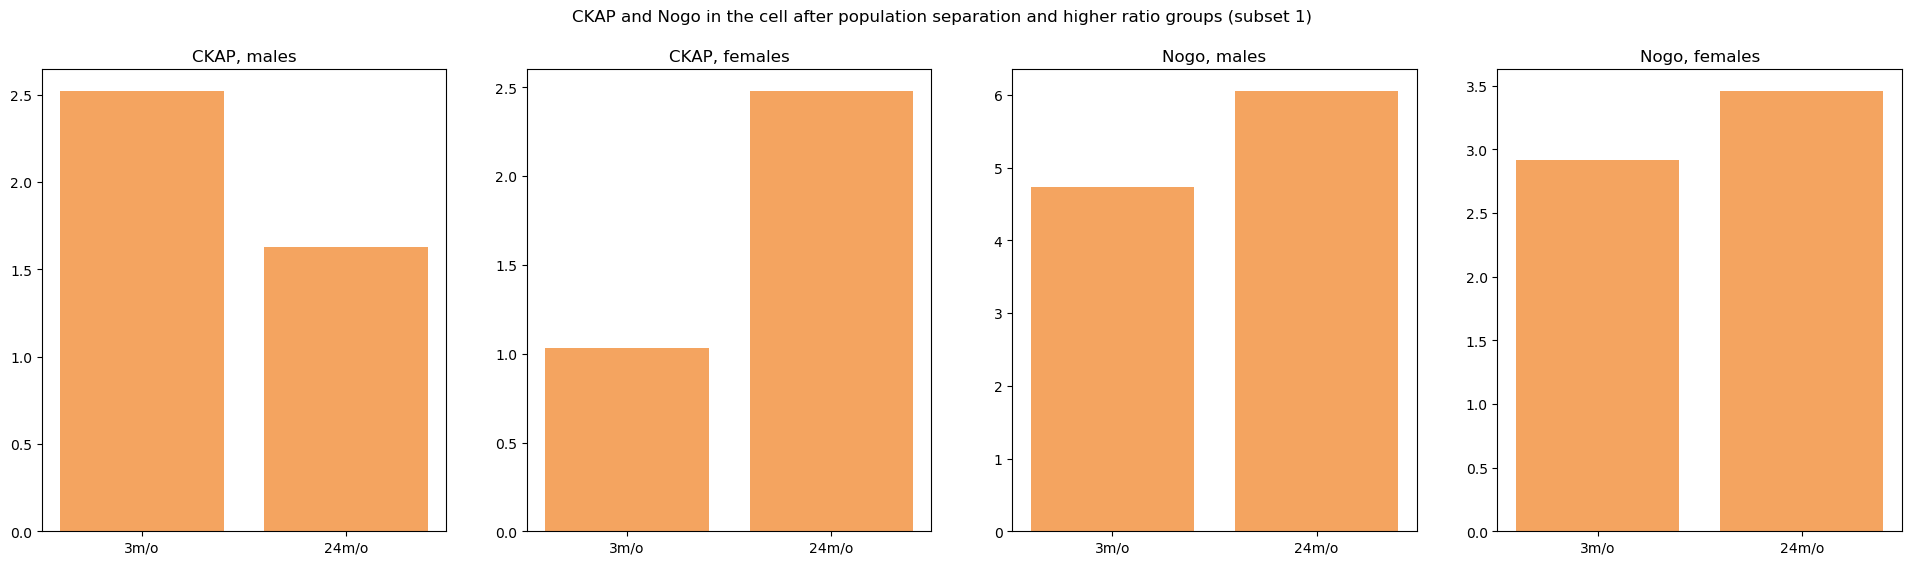

Factor between CKAP males 3m/o and 24m/o:  1.5498624536913765
Factor between CKAP females 3m/o and 24m/o:  0.41548887318119165
Factor between Nogo males 3m/o and 24m/o:  0.7833685801943854
Factor between Nogo females 3m/o and 24m/o:  0.8428795478578192
[1.89771221 3.23179813]
[1.52935671 0.85635712]


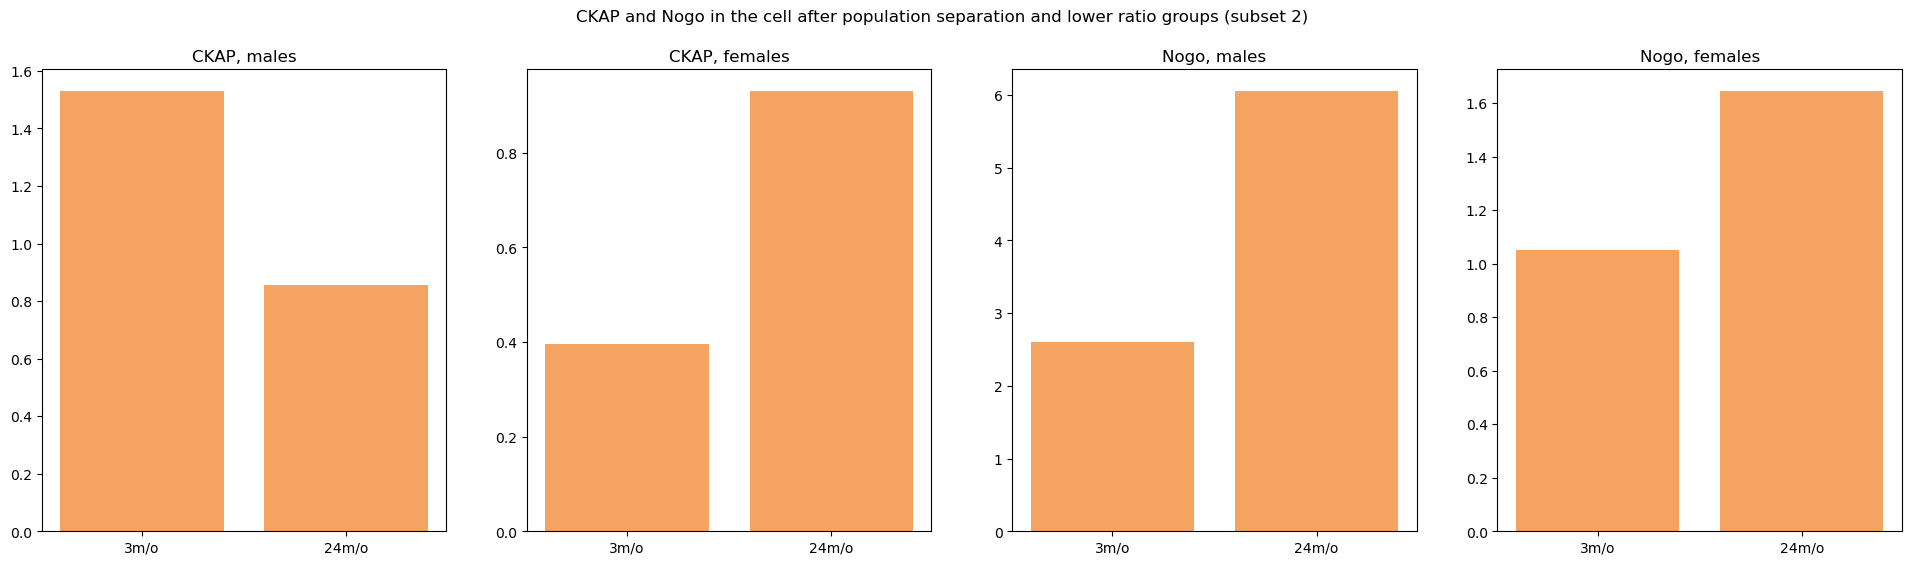

Factor between CKAP males 3m/o and 24m/o:  1.785886609005828
Factor between CKAP females 3m/o and 24m/o:  0.4266527892891199
Factor between Nogo males 3m/o and 24m/o:  0.43002179798854956
Factor between Nogo females 3m/o and 24m/o:  0.6403697590094645


In [182]:
mean_3m_nogo_1 = np.mean(Nogo_m_3_subset_1)
mean_3m_nogo_2 = np.mean(Nogo_m_3_subset_2)
mean_3f_nogo_1 = np.mean(Nogo_f_3_subset_1)
mean_3f_nogo_2 = np.mean(Nogo_f_3_subset_2)
#mean_24m_nogo_1 = np.mean(Nogo_m_24_subset_1)
#mean_24m_nogo_2 = np.mean(Nogo_m_24_subset_2)
mean_24f_nogo_1 = np.mean(Nogo_f_24_subset_1)
mean_24f_nogo_2 = np.mean(Nogo_f_24_subset_2)

mean_3m_ckap_1 = np.mean(CKAP_m_3_subset_1)
mean_3m_ckap_2 = np.mean(CKAP_m_3_subset_2)
mean_3f_ckap_1 = np.mean(CKAP_f_3_subset_1)
mean_3f_ckap_2 = np.mean(CKAP_f_3_subset_2)
mean_24m_ckap_1 = np.mean(CKAP_m_24_subset_1)
mean_24m_ckap_2 = np.mean(CKAP_m_24_subset_2)
mean_24f_ckap_1 = np.mean(CKAP_f_24_subset_1)
mean_24f_ckap_2 = np.mean(CKAP_f_24_subset_2)

#there is no difference in populations (if you look at them)
mean_24m_nogo_1 = Nogo_m[1]
mean_24m_nogo_2 = Nogo_m[1]

# subset 1 (higher values)---------------------------------------------------------------------------------------------


print(mean_3m)

CKAP_m = np.array([mean_3m_ckap_1, mean_24m_ckap_1])
CKAP_f = np.array([mean_3f_ckap_1, mean_24f_ckap_1])
Nogo_m = np.array([mean_3m_nogo_1, mean_24m_nogo_1])
Nogo_f = np.array([mean_3f_nogo_1, mean_24f_nogo_1])
print(CKAP_m)

x = np.array(['3m/o','24m/o'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.bar(x,CKAP_m,color = 'sandybrown')
ax1.set_title('CKAP, males')

ax2.bar(x,CKAP_f,color = 'sandybrown')
ax2.set_title('CKAP, females')

ax3.bar(x, Nogo_m,color = 'sandybrown')
ax3.set_title('Nogo, males')

ax4.bar(x, Nogo_f,color = 'sandybrown')
ax4.set_title('Nogo, females')

fig.suptitle('CKAP and Nogo in the cell after population separation and higher ratio groups (subset 1)')

plt.show()

print('Factor between CKAP males 3m/o and 24m/o: ',mean_3m_ckap_1/mean_24m_ckap_1)
print('Factor between CKAP females 3m/o and 24m/o: ',mean_3f_ckap_1/mean_24f_ckap_1)
print('Factor between Nogo males 3m/o and 24m/o: ',mean_3m_nogo_1/mean_24m_nogo_1)
print('Factor between Nogo females 3m/o and 24m/o: ',mean_3f_nogo_1/mean_24f_nogo_1)


# subset 2 (lower values)---------------------------------------------------------------------------------------------


print(mean_3m)

CKAP_m = np.array([mean_3m_ckap_2, mean_24m_ckap_2])
CKAP_f = np.array([mean_3f_ckap_2, mean_24f_ckap_2])
Nogo_m = np.array([mean_3m_nogo_2, mean_24m_nogo_2])
Nogo_f = np.array([mean_3f_nogo_2, mean_24f_nogo_2])
print(CKAP_m)

x = np.array(['3m/o','24m/o'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.bar(x,CKAP_m,color = 'sandybrown')
ax1.set_title('CKAP, males')

ax2.bar(x,CKAP_f,color = 'sandybrown')
ax2.set_title('CKAP, females')

ax3.bar(x, Nogo_m,color = 'sandybrown')
ax3.set_title('Nogo, males')

ax4.bar(x, Nogo_f,color = 'sandybrown')
ax4.set_title('Nogo, females')

fig.suptitle('CKAP and Nogo in the cell after population separation and lower ratio groups (subset 2)')

plt.show()

print('Factor between CKAP males 3m/o and 24m/o: ',mean_3m_ckap_2/mean_24m_ckap_2)
print('Factor between CKAP females 3m/o and 24m/o: ',mean_3f_ckap_2/mean_24f_ckap_2)
print('Factor between Nogo males 3m/o and 24m/o: ',mean_3m_nogo_2/mean_24m_nogo_2)
print('Factor between Nogo females 3m/o and 24m/o: ',mean_3f_nogo_2/mean_24f_nogo_2)

trying the ChatGPT suggestions to separate the populations 

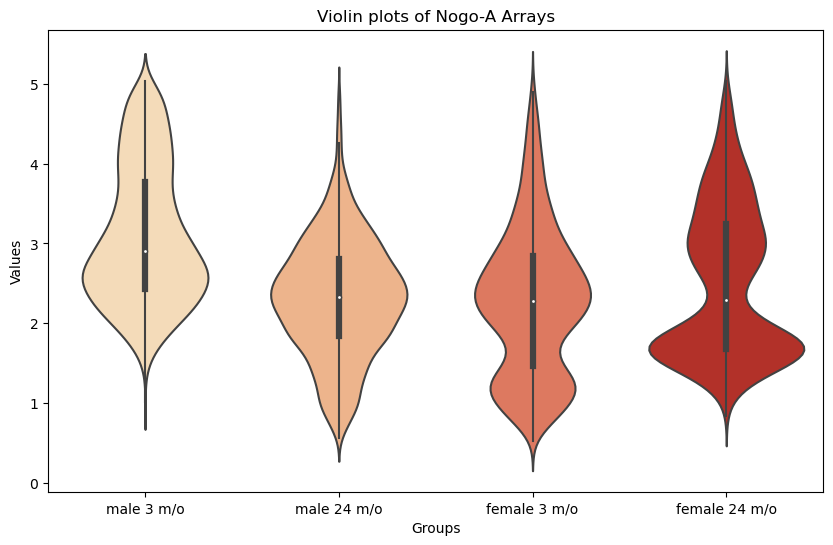

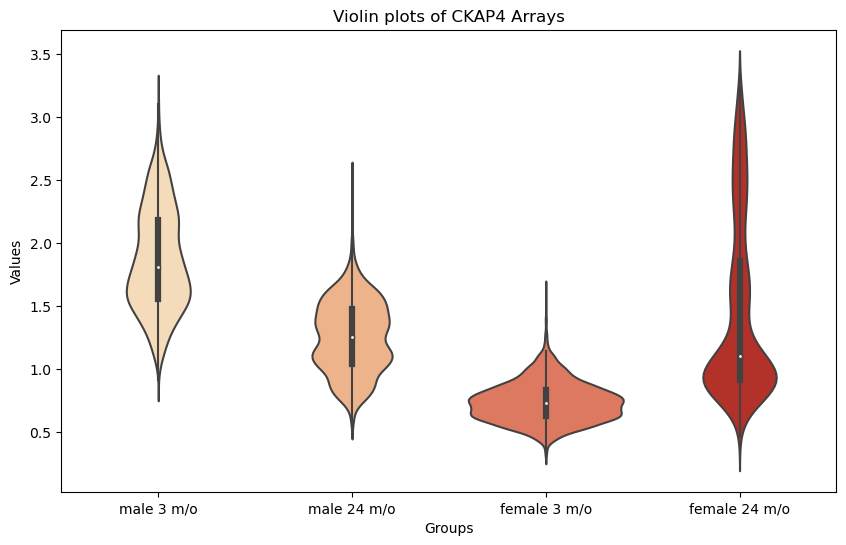

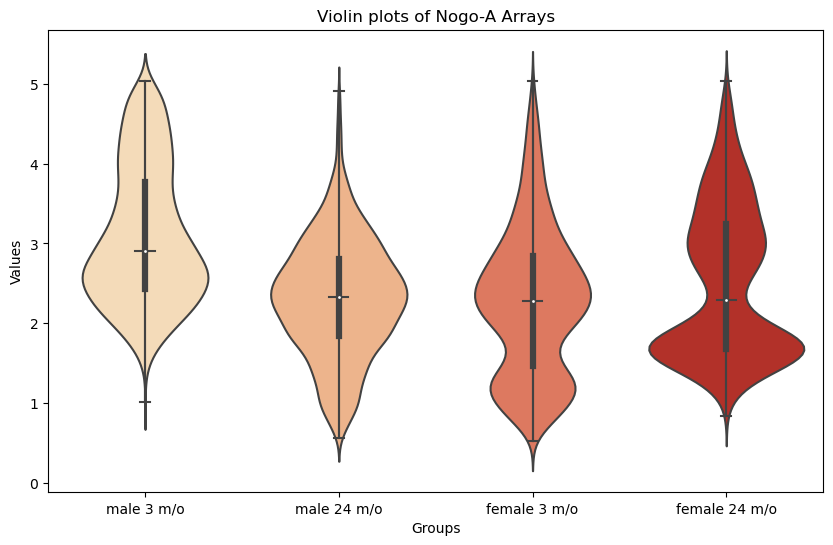

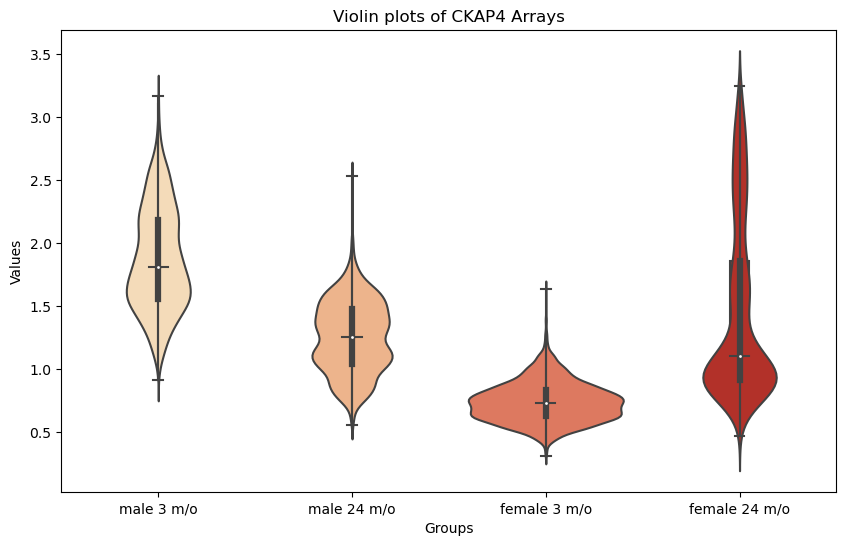

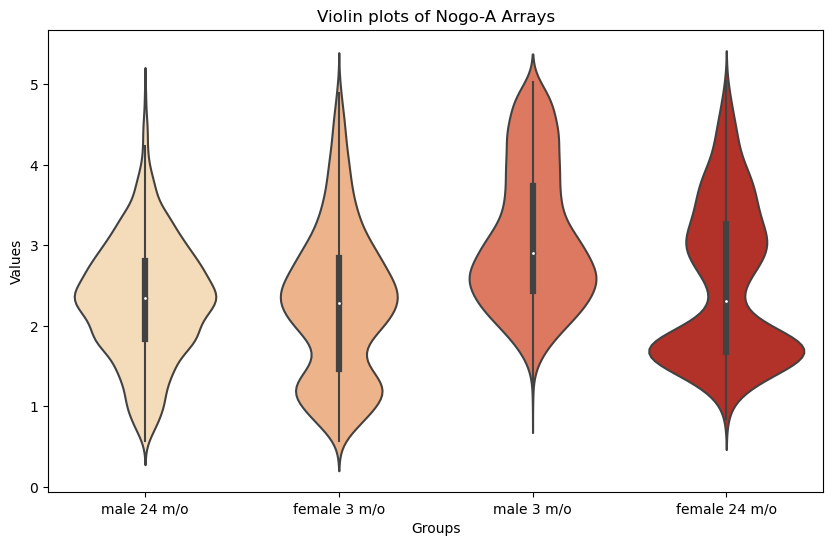

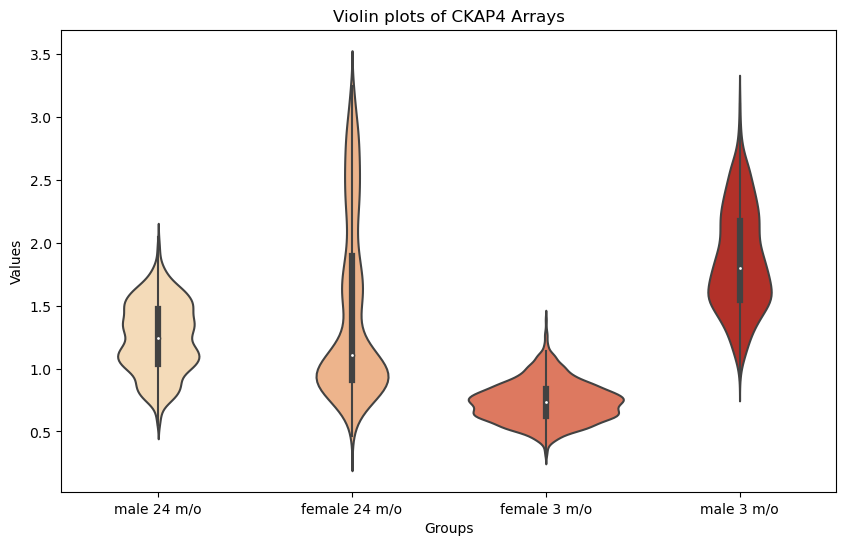

In [101]:
def filter_outliers(df):
    Q1 = df['Value'].quantile(0.25)
    Q3 = df['Value'].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR)))]
    return df_filtered

df_Nogo_filtered = filter_outliers(df_Nogo)
df_CKAP_filtered = filter_outliers(df_CKAP)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_Nogo_filtered, palette='OrRd', bw=0.2)  # Adjust bw as needed
plt.title('Violin plots of Nogo-A Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_CKAP_filtered, palette='OrRd', bw=0.2)  # Adjust bw as needed
plt.title('Violin plots of CKAP4 Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_Nogo_filtered, palette='OrRd', bw=0.2)
sns.boxplot(x='Group', y='Value', data=df_Nogo_filtered, whis=[0, 100], width=0.1, palette='OrRd')
plt.title('Violin plots of Nogo-A Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_CKAP_filtered, palette='OrRd', bw=0.2)
sns.boxplot(x='Group', y='Value', data=df_CKAP_filtered, whis=[0, 100], width=0.1, palette='OrRd')
plt.title('Violin plots of CKAP4 Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

def sample_data(df, fraction=0.7):
    return df.sample(frac=fraction)

df_Nogo_sampled = sample_data(df_Nogo_filtered)
df_CKAP_sampled = sample_data(df_CKAP_filtered)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_Nogo_sampled, palette='OrRd', bw=0.2)
plt.title('Violin plots of Nogo-A Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Value', data=df_CKAP_sampled, palette='OrRd', bw=0.2)
plt.title('Violin plots of CKAP4 Arrays')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()


Nogo
male_3_mo_pop1: [3.44830476 3.3208268  3.55254688 ... 4.19969839 3.65351345 3.32954171]

male_3_mo_pop2: [3.13276848 2.80642989 2.70296518 ... 2.36099562 1.68801841 2.30061333]



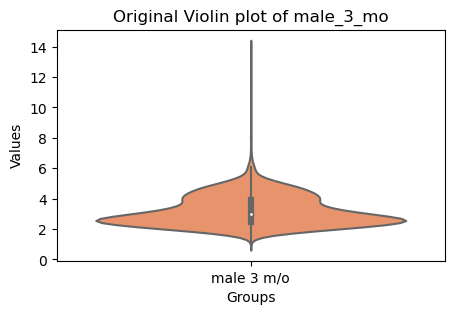

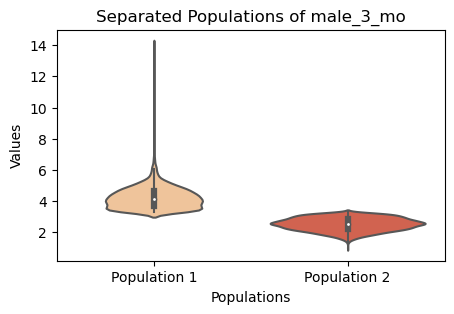

male_24_mo_pop1: [2.17863676 2.16742884 1.91756527 ... 2.62558482 1.78369796 1.58433147]

male_24_mo_pop2: [ 6.02516558  4.5758529  12.19017845  8.98183564  4.72304942  5.15517313
  5.89439461  4.84911481  6.16616476  7.53794402  4.59502386  4.81092801
  4.48473705  5.46762481  4.47852661  5.25966707  7.87783181  4.57542528
  4.80265143  9.71677494  7.15940918  4.69841406  4.91504169  6.00848511
  6.27940921]



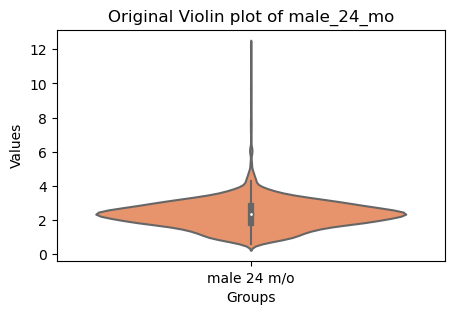

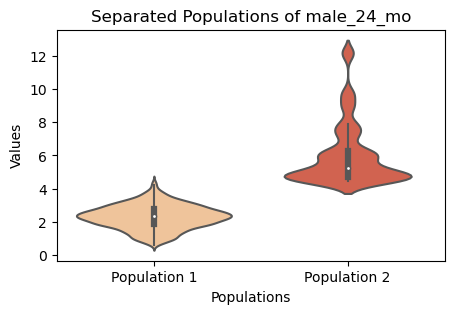

female_3_mo_pop1: [ 3.97692666  4.13415001  4.75402589  4.09923702  4.42999367  5.17833266
  4.70046872  5.09728472  5.7827763   4.6127328   4.01766295  3.96357109
  3.99222945  4.40732277  4.05110036  4.15455719  4.19406287  5.51273914
  4.37992706  3.99378971  4.25147092 10.68714877  4.03619819  4.0262949
  6.67044078  4.95050278  4.30775473  5.7057788   5.57252024  4.94505932
  5.40059543  5.96560073  5.17716389  4.04826292  4.44252183  4.12043921
  4.84731832  4.51900313  5.68209317  4.7867699   4.03432453  4.27902418
  4.42386255  4.79159942  4.24552256  4.05364075  5.15782968  4.26327325
  4.20825643  4.54500129  4.07572094  5.38086101  4.85725809  4.27389726
  4.57375103  4.31009784  4.31391678  4.44870302  4.61178578  5.0362855
  4.62173172  5.37856184  5.9733362   4.00237889  4.50719765  4.71421502
  4.68060284  4.69500698  4.53674872  4.01284405  4.52930992  4.42769033
  3.98728558  4.49596098  4.55733153  4.00357738  4.11304476  4.14584965
  4.01227526  4.26084663  4.2113159

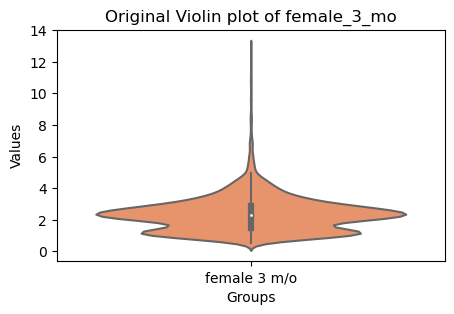

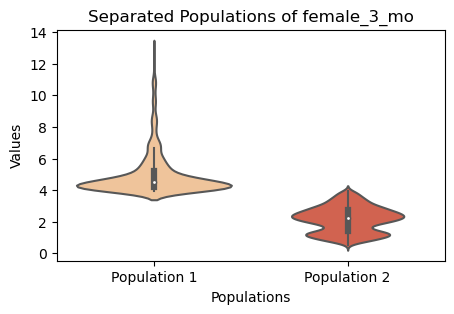

female_24_mo_pop1: [1.34414877 1.29002985 1.46654473 ... 2.12962459 2.04446195 2.1478362 ]

female_24_mo_pop2: [2.27994936 2.28469202 2.54722744 ... 3.15735276 3.34976629 2.26380563]



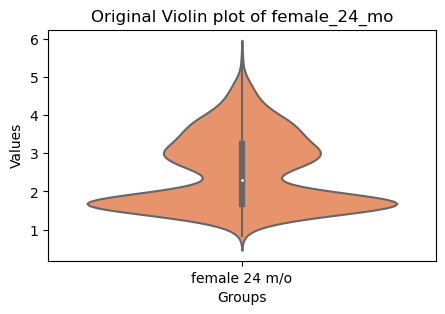

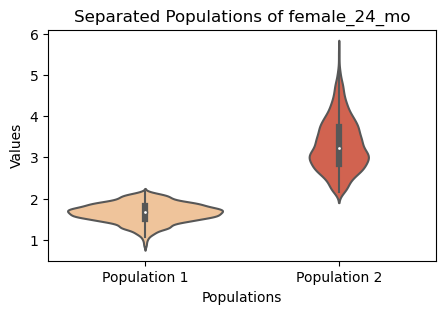

CKAP
male_3_mo_pop1: [1.47666981 1.41207834 1.40036642 ... 1.31619606 1.44631497 1.42866391]

male_3_mo_pop2: [1.96990769 2.04259966 1.98168919 ... 2.00171509 1.96434441 2.01825295]



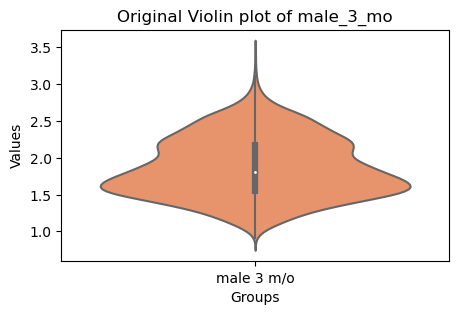

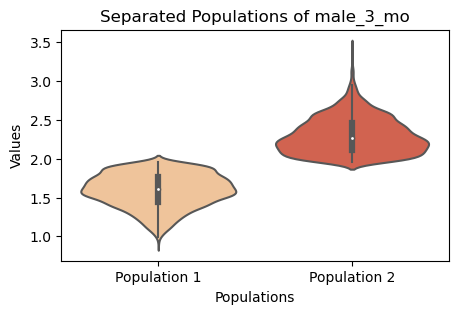

male_24_mo_pop1: [1.06385251 1.12106823 1.17745645 ... 1.12860692 0.75991439 0.91876908]

male_24_mo_pop2: [1.54036889 1.68275335 1.51800303 ... 1.38840406 1.28287581 1.42000129]



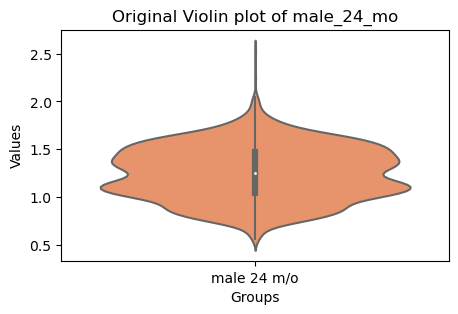

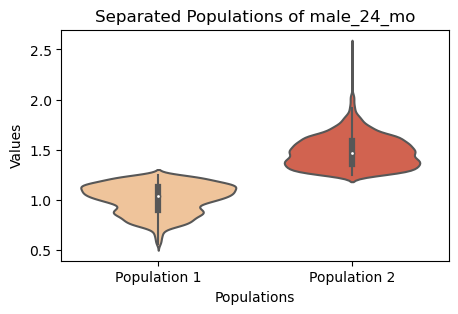

female_3_mo_pop1: [0.78964958 0.84757632 0.81001846 0.79096617 0.7963714  0.84552697
 0.86344924 0.8081058  0.86696435 0.9287244  0.81317657 0.9056884
 0.86985866 0.8571461  0.78759392 0.93253183 0.81420115 0.81451972
 0.80548505 0.82450623 0.85509314 0.8162049  0.86922386 0.80569911
 0.80261406 0.83988661 0.84527076 0.86209946 0.8774857  0.88763031
 0.83387903 0.86707552 0.80878261 0.84271774 0.789444   0.83307376
 0.80464968 0.82573601 0.91937843 0.78928087 0.82129651 0.8447198
 0.7870545  0.8334244  0.83821076 0.79696908 0.80354075 0.82165046
 0.81670852 0.82422091 0.88418788 0.86439067 0.82844088 0.81843977
 0.85043615 0.78219939 0.88817898 0.84912304 0.82721051 0.8754285
 0.85545229 0.93651066 0.94933871 0.92595099 0.81811944 0.87400706
 0.97115496 0.88881414 0.95002206 0.97582501 0.83673465 0.83073
 0.85876532 0.93589664 0.86835181 0.8385086  0.86017011 0.85265177
 0.79943102 0.78710042 0.80906539 0.80415863 0.83451975 1.02497786
 0.82705336 0.87739766 0.88464176 0.90447742 0.985

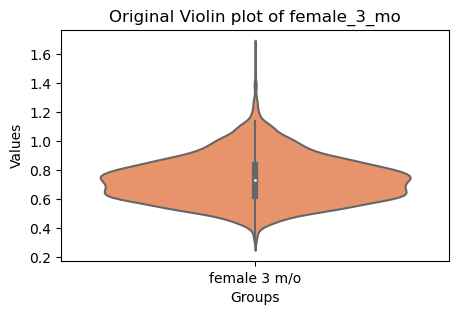

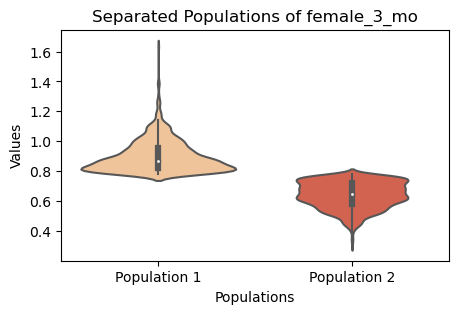

female_24_mo_pop1: [1.26719879 1.30319773 1.28218058 ... 2.16836246 2.05898458 2.16363482]

female_24_mo_pop2: [0.8981567  0.82725045 0.9127368  ... 1.22148307 1.17873734 1.16989485]



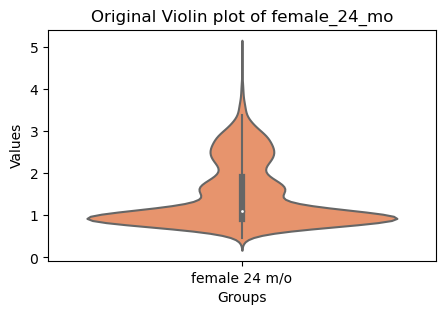

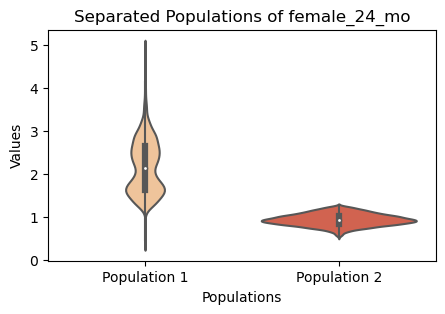

<built-in method keys of dict object at 0x2a8b91d40>
{'female_24_mo_pop1': array([1.26719879, 1.30319773, 1.28218058, ..., 2.16836246, 2.05898458,
       2.16363482]), 'female_24_mo_pop2': array([0.8981567 , 0.82725045, 0.9127368 , ..., 1.22148307, 1.17873734,
       1.16989485])}
redone error from Nogo 3mo female


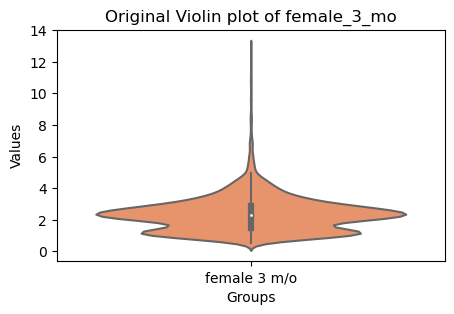

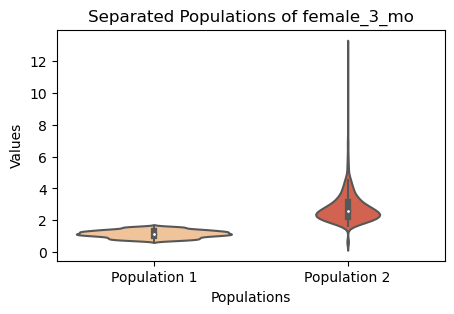

In [172]:
def separate_populations(data):
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2)
    data = data.reshape(-1, 1)
    gmm.fit(data)
    labels = gmm.predict(data)
    
    # Separate the data based on the GMM labels
    population_1 = data[labels == 0].flatten()
    population_2 = data[labels == 1].flatten()
    
    return population_1, population_2

def separate_populations_special(data, peak_ranges):
    assert len(peak_ranges) == 2, "This function currently supports exactly 2 peak ranges."
    
    data = data.reshape(-1, 1)
    gmm = GaussianMixture(n_components=2, means_init=np.array(peak_ranges).reshape(-1, 1))
    gmm.fit(data)
    labels = gmm.predict(data)
    
    population_1 = data[labels == 0].flatten()
    population_2 = data[labels == 1].flatten()
    
    return population_1, population_2

def plot_separated_populations(separated_data, original_data, group_name):
    plt.figure(figsize=(5, 3))
    
    # Plot original data
    sns.violinplot(x='Group', y='Value', data=original_data, palette='OrRd', bw=0.2)
    plt.title(f'Original Violin plot of {group_name}')
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.show()
    
    # Plot separated populations
    pop1 = separated_data[f"{group_name}_pop1"]
    pop2 = separated_data[f"{group_name}_pop2"]
    
    plt.figure(figsize=(5, 3))
    sns.violinplot(data=[pop1, pop2], palette='OrRd', bw=0.2)
    plt.title(f'Separated Populations of {group_name}')
    plt.xlabel('Populations')
    plt.ylabel('Values')
    plt.xticks([0, 1], ['Population 1', 'Population 2'])
    plt.show()

def plotting(df, name, string):
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    df.dropna(subset=['Value'], inplace=True)

    # Example usage with your data
    name = df['Value'].values
    groups = {
        string: name
    }

    separated_data = {}
    for group, data in groups.items():
        pop1, pop2 = separate_populations(np.array(data))
        separated_data[f"{group}_pop1"] = pop1
        separated_data[f"{group}_pop2"] = pop2

    # Print separated data for inspection
    for key, value in separated_data.items():
        print(f"{key}: {value}\n")

    # Plot separated populations
    plot_separated_populations(separated_data, df, string)
    
    return separated_data

def plotting_special(df, name, string):
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    df.dropna(subset=['Value'], inplace=True)

    # Example usage with your data
    name = df['Value'].values
    groups = {
        string: name
    }

    separated_data = {}
    for group, data in groups.items():
        pop1, pop2 = separate_populations_special(np.array(data), [0.47825591614851415, 0.3352334416675383])
        separated_data[f"{group}_pop1"] = pop1
        separated_data[f"{group}_pop2"] = pop2

    '''
    # Print separated data for inspection
    for key, value in separated_data.items():
        print(f"{key}: {value}\n")
    '''

    # Plot separated populations
    plot_separated_populations(separated_data, df, string)
    
    return separated_data

#---------------------------------
print('Nogo')
sep_nogo_m_3 = plotting(df1_Nogo, Nogo_m_3, "male_3_mo")
sep_nogo_m_24 = plotting(df2_Nogo, Nogo_m_24, "male_24_mo")
sep_nogo_f_3 = plotting(df3_Nogo, Nogo_f_3, "female_3_mo")
sep_nogo_f_24 = plotting(df4_Nogo, Nogo_f_24, "female_24_mo")

print('CKAP')
sep_ckap_m_3 = plotting(df1_CKAP, CKAP_m_3, "male_3_mo")
sep_ckap_m_24 = plotting(df2_CKAP, CKAP_m_24, "male_24_mo")
sep_ckap_f_3 = plotting(df3_CKAP, CKAP_f_3, "female_3_mo")
sep_ckap_f_24 = plotting(df4_CKAP, CKAP_f_24, "female_24_mo")

print(sep_ckap_f_24.keys)
print(sep_ckap_f_24)

print('redone error from Nogo 3mo female')
sep_nogo_f_3 = plotting_special(df3_Nogo, Nogo_f_3, "female_3_mo")


firest dict_keys(['male_3_mo_pop1', 'male_3_mo_pop2'])
 
firest dict_keys(['male_24_mo_pop1', 'male_24_mo_pop2'])
 
firest dict_keys(['female_3_mo_pop1', 'female_3_mo_pop2'])
 
firest dict_keys(['female_24_mo_pop1', 'female_24_mo_pop2'])
 
firest dict_keys(['male_3_mo_pop1', 'male_3_mo_pop2'])
 
firest dict_keys(['male_24_mo_pop1', 'male_24_mo_pop2'])
 
firest dict_keys(['female_3_mo_pop1', 'female_3_mo_pop2'])
 
firest dict_keys(['female_24_mo_pop1', 'female_24_mo_pop2'])
 
[1.89771221 3.23179813]
[1.59255814 1.01121283]


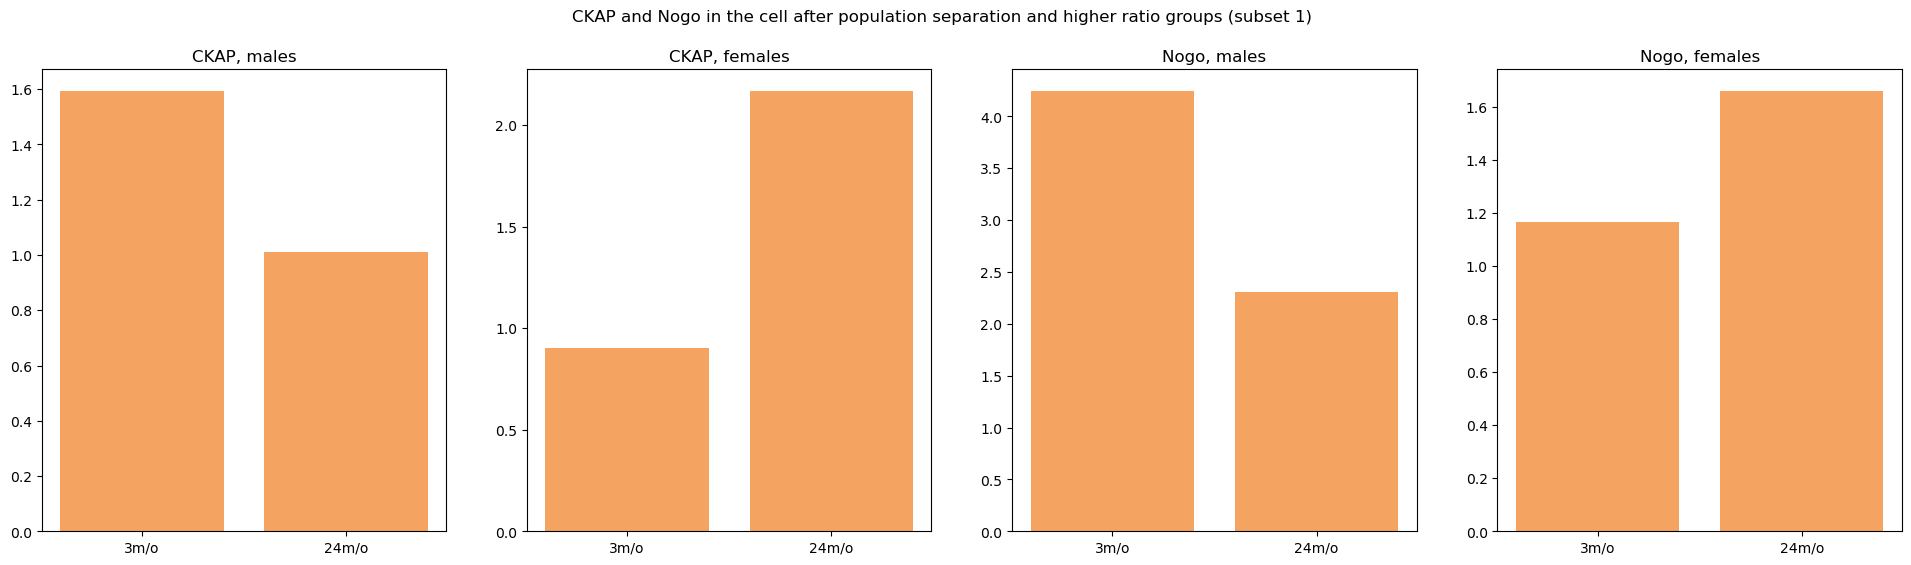

Factor between CKAP males 3m/o and 24m/o:  1.5748990611877436
Factor between CKAP females 3m/o and 24m/o:  0.41596031850258613
Factor between Nogo males 3m/o and 24m/o:  1.8400003851684805
Factor between Nogo females 3m/o and 24m/o:  0.7039938933228819
[1.89771221 3.23179813]
[2.30005407 1.48268514]


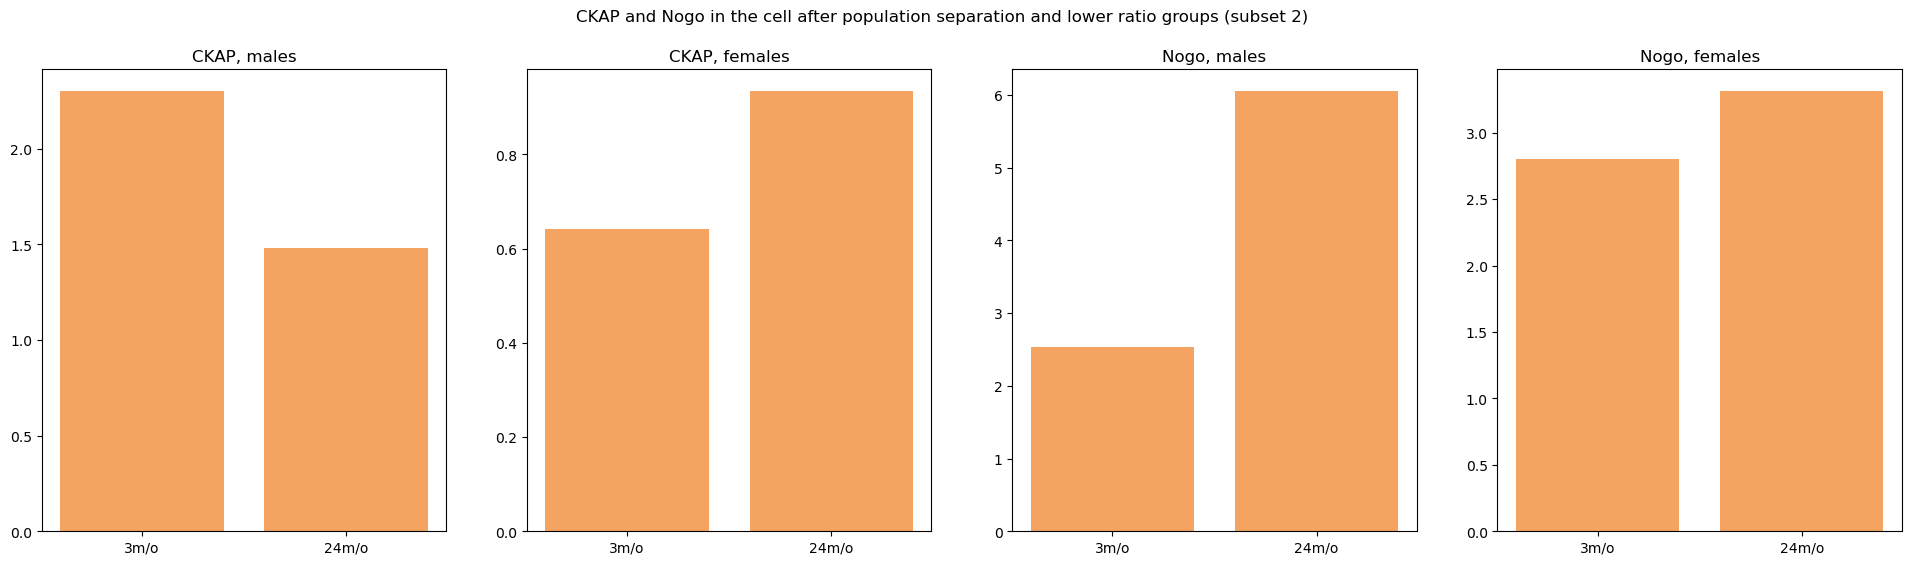

Factor between CKAP males 3m/o and 24m/o:  1.5512761261760923
Factor between CKAP females 3m/o and 24m/o:  0.6872447267352574
Factor between Nogo males 3m/o and 24m/o:  0.4180549086710861
Factor between Nogo females 3m/o and 24m/o:  0.845642483267406


In [173]:
print('first', sep_nogo_m_3.keys())
print(' ')
print('first', sep_nogo_m_24.keys())
print(' ')
print('first', sep_nogo_f_3.keys())
print(' ')
print('first', sep_nogo_f_24.keys())
print(' ')

print('first', sep_ckap_m_3.keys())
print(' ')
print('first', sep_ckap_m_24.keys())
print(' ')
print('first', sep_ckap_f_3.keys())
print(' ')
print('first', sep_ckap_f_24.keys())
print(' ')

sep_nogo_m_3_data_1 = sep_nogo_m_3["male_3_mo_pop1"]
sep_nogo_m_3_data_2 = sep_nogo_m_3['male_3_mo_pop2']
sep_nogo_m_24_data_1 = sep_nogo_m_24['male_24_mo_pop1']
sep_nogo_m_24_data_2 = sep_nogo_m_24['male_24_mo_pop2']
sep_nogo_f_3_data_1 =sep_nogo_f_3['female_3_mo_pop1']
sep_nogo_f_3_data_2 =sep_nogo_f_3['female_3_mo_pop2']
sep_nogo_f_24_data_1 =sep_nogo_f_24['female_24_mo_pop1']
sep_nogo_f_24_data_2 =sep_nogo_f_24['female_24_mo_pop2']

sep_ckap_m_3_data_1 = sep_ckap_m_3["male_3_mo_pop1"]
sep_ckap_m_3_data_2 =sep_ckap_m_3['male_3_mo_pop2']
sep_ckap_m_24_data_1 =sep_ckap_m_24['male_24_mo_pop1']
sep_ckap_m_24_data_2 =sep_ckap_m_24['male_24_mo_pop2']
sep_ckap_f_3_data_1 =sep_ckap_f_3['female_3_mo_pop1']
sep_ckap_f_3_data_2 =sep_ckap_f_3['female_3_mo_pop2']
sep_ckap_f_24_data_1 =sep_ckap_f_24['female_24_mo_pop1']
sep_ckap_f_24_data_2 =sep_ckap_f_24['female_24_mo_pop2']

#------------------------------------------------------------------------------------------

mean_3m_nogo_1 = np.mean(sep_nogo_m_3_data_1)
mean_3m_nogo_2 = np.mean(sep_nogo_m_3_data_2)
mean_3f_nogo_1 = np.mean(sep_nogo_f_3_data_1)
mean_3f_nogo_2 = np.mean(sep_nogo_f_3_data_2)
mean_24m_nogo_1 = np.mean(sep_nogo_m_24_data_1)
mean_24m_nogo_2 = np.mean(sep_nogo_m_24_data_2)
mean_24f_nogo_1 = np.mean(sep_nogo_f_24_data_1)
mean_24f_nogo_2 = np.mean(sep_nogo_f_24_data_2)

mean_3m_ckap_1 = np.mean(sep_ckap_m_3_data_1)
mean_3m_ckap_2 = np.mean(sep_ckap_m_3_data_2)
mean_3f_ckap_1 = np.mean(sep_ckap_f_3_data_1)
mean_3f_ckap_2 = np.mean(sep_ckap_f_3_data_2)
mean_24m_ckap_1 = np.mean(sep_ckap_m_24_data_1)
mean_24m_ckap_2 = np.mean(sep_ckap_m_24_data_2)
mean_24f_ckap_1 = np.mean(sep_ckap_f_24_data_1)
mean_24f_ckap_2 = np.mean(sep_ckap_f_24_data_2)

# subset 1 (higher values)---------------------------------------------------------------------------------------------


print(mean_3m)

CKAP_m = np.array([mean_3m_ckap_1, mean_24m_ckap_1])
CKAP_f = np.array([mean_3f_ckap_1, mean_24f_ckap_1])
Nogo_m = np.array([mean_3m_nogo_1, mean_24m_nogo_1])
Nogo_f = np.array([mean_3f_nogo_1, mean_24f_nogo_1])
print(CKAP_m)

x = np.array(['3m/o','24m/o'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.bar(x,CKAP_m,color = 'sandybrown')
ax1.set_title('CKAP, males')

ax2.bar(x,CKAP_f,color = 'sandybrown')
ax2.set_title('CKAP, females')

ax3.bar(x, Nogo_m,color = 'sandybrown')
ax3.set_title('Nogo, males')

ax4.bar(x, Nogo_f,color = 'sandybrown')
ax4.set_title('Nogo, females')

fig.suptitle('CKAP and Nogo in the cell after population separation and higher ratio groups (subset 1)')

plt.show()

print('Factor between CKAP males 3m/o and 24m/o: ',mean_3m_ckap_1/mean_24m_ckap_1)
print('Factor between CKAP females 3m/o and 24m/o: ',mean_3f_ckap_1/mean_24f_ckap_1)
print('Factor between Nogo males 3m/o and 24m/o: ',mean_3m_nogo_1/mean_24m_nogo_1)
print('Factor between Nogo females 3m/o and 24m/o: ',mean_3f_nogo_1/mean_24f_nogo_1)


# subset 2 (lower values)---------------------------------------------------------------------------------------------


print(mean_3m)

CKAP_m = np.array([mean_3m_ckap_2, mean_24m_ckap_2])
CKAP_f = np.array([mean_3f_ckap_2, mean_24f_ckap_2])
Nogo_m = np.array([mean_3m_nogo_2, mean_24m_nogo_2])
Nogo_f = np.array([mean_3f_nogo_2, mean_24f_nogo_2])
print(CKAP_m)

x = np.array(['3m/o','24m/o'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.bar(x,CKAP_m,color = 'sandybrown')
ax1.set_title('CKAP, males')

ax2.bar(x,CKAP_f,color = 'sandybrown')
ax2.set_title('CKAP, females')

ax3.bar(x, Nogo_m,color = 'sandybrown')
ax3.set_title('Nogo, males')

ax4.bar(x, Nogo_f,color = 'sandybrown')
ax4.set_title('Nogo, females')

fig.suptitle('CKAP and Nogo in the cell after population separation and lower ratio groups (subset 2)')

plt.show()

print('Factor between CKAP males 3m/o and 24m/o: ',mean_3m_ckap_2/mean_24m_ckap_2)
print('Factor between CKAP females 3m/o and 24m/o: ',mean_3f_ckap_2/mean_24f_ckap_2)
print('Factor between Nogo males 3m/o and 24m/o: ',mean_3m_nogo_2/mean_24m_nogo_2)
print('Factor between Nogo females 3m/o and 24m/o: ',mean_3f_nogo_2/mean_24f_nogo_2)


proving ^ is stat sig

In [178]:
print('Full cell analysis difference between Nogo-A and CKAP after normalisation and population separation, statistical proof')

def normalisation(data, nor_1, nor_2):
    return data/(np.mean(nor_1)*np.mean(nor_2))

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

def confidence_interval(group1_data, group2_data):
    mean_group1 = np.mean(group1_data)
    mean_group2 = np.mean(group2_data)
    std_group1 = np.std(group1_data, ddof=1) 
    std_group2 = np.std(group2_data, ddof=1)

    pooled_std = np.sqrt(((len(group1_data) - 1) * std_group1**2 + (len(group2_data) - 1) * std_group2**2) / (len(group1_data) + len(group2_data) - 2))
    alpha = 0.05  # Set the desired confidence level (e.g., 95%)
    standard_error = pooled_std * np.sqrt(1 / len(group1_data) + 1 / len(group2_data))
    margin_of_error = stats.t.ppf(1 - alpha / 2, len(group1_data) + len(group2_data) - 2) * standard_error

    lower_ci = (mean_group1 - mean_group2) - margin_of_error
    upper_ci = (mean_group1 - mean_group2) + margin_of_error
    
    return lower_ci,upper_ci

#------------------------------------------------------------------------------------------------------------
print('Nogo')
print('group 1')
d_m_3_24 = cohen_d(sep_nogo_m_3_data_1, sep_nogo_m_24_data_1)
d_f_3_24 = cohen_d(sep_nogo_f_3_data_1, sep_nogo_f_24_data_1)
d_m_f_3 = cohen_d(sep_nogo_m_3_data_1, sep_nogo_f_3_data_1)
d_m_f_24 = cohen_d(sep_nogo_m_24_data_1, sep_nogo_f_24_data_1)

print("Cohen's D between male 3 and 24 months of higher values after population separation:", d_m_3_24)
print("Cohen's D between female 3 and 24 months of higher values after population separation:", d_f_3_24)
#print("Cohen's D between male and female at 3 months of higher values after population separation:", d_m_f_3)
#print("Cohen's D between male and female at 24 months of higher values after population separation:", d_m_f_24)
print(' ')

print('group 2')
d_m_3_24 = cohen_d(sep_nogo_m_3_data_2, sep_nogo_m_24_data_2)
d_f_3_24 = cohen_d(sep_nogo_f_3_data_2, sep_nogo_f_24_data_2)
d_m_f_3 = cohen_d(sep_nogo_m_3_data_2, sep_nogo_f_3_data_2)
d_m_f_24 = cohen_d(sep_nogo_m_24_data_2, sep_nogo_f_24_data_2)

print("Cohen's D between male 3 and 24 months of lower values after population separation:", d_m_3_24)
print("Cohen's D between female 3 and 24 months of lower values after population separation:", d_f_3_24)
#print("Cohen's D between male and female at 3 months of lower values after population separation:", d_m_f_3)
#print("Cohen's D between male and female at 24 months of lower values after population separation:", d_m_f_24)
print(' ')

#------------------------------------------------------------------------------------------------------------
print('Nogo-A')
print('group 1')
d_m_3_24 = cohen_d(sep_ckap_m_3_data_1, sep_ckap_m_24_data_1)
d_f_3_24 = cohen_d(sep_ckap_f_3_data_1, sep_ckap_f_24_data_1)
d_m_f_3 = cohen_d(sep_ckap_m_3_data_1, sep_ckap_m_24_data_1)
d_m_f_24 = cohen_d(sep_ckap_f_3_data_1, sep_ckap_f_24_data_1)

print("Cohen's D between male 3 and 24 months of higher values after population separation:", d_m_3_24)
print("Cohen's D between female 3 and 24 months of higher values after population separation:", d_f_3_24)
#print("Cohen's D between male and female at 3 months of higher values after population separation:", d_m_f_3)
#print("Cohen's D between male and female at 24 months of higher values after population separation:", d_m_f_24)

print(' ')
print('group 2')
d_m_3_24 = cohen_d(sep_ckap_m_3_data_2, sep_ckap_m_24_data_2)
d_f_3_24 = cohen_d(sep_ckap_f_3_data_2, sep_ckap_f_24_data_2)
d_m_f_3 = cohen_d(sep_ckap_m_3_data_2, sep_ckap_m_24_data_2)
d_m_f_24 = cohen_d(sep_ckap_f_3_data_2, sep_ckap_f_24_data_2)

print("Cohen's D between male 3 and 24 months of higher values after population separation:", d_m_3_24)
print("Cohen's D between female 3 and 24 months of higher values after population separation:", d_f_3_24)
#print("Cohen's D between male and female at 3 months of higher values after population separation:", d_m_f_3)
#print("Cohen's D between male and female at 24 months of higher values after population separation:", d_m_f_24)

print(' ')
#------------------------------------------------------------------------------------------------------------
print('Population separation')
d_m_3 = cohen_d(sep_nogo_m_3_data_1, sep_nogo_m_3_data_2)
d_m_24 = cohen_d(sep_nogo_m_24_data_1, sep_nogo_m_24_data_2)
d_f_3 = cohen_d(sep_nogo_f_3_data_1, sep_nogo_f_3_data_2)
d_f_24 = cohen_d(sep_nogo_f_24_data_1, sep_nogo_f_24_data_2)

print("Cohen's D between separated populations in male 3 month old Nogo:", d_m_3)
print("Cohen's D between separated populations in male 24 month old Nogo:", d_m_24)
print("Cohen's D between separated populations in female 3 month old Nogo:", d_f_3)
print("Cohen's D between separated populations in female 24 month old Nogo:", d_f_24)

print(' ')
#------------------------------------------------------------------------------------------------------------


d_m_3 = cohen_d(sep_ckap_m_3_data_1, sep_ckap_m_3_data_2)
d_m_24 = cohen_d(sep_ckap_m_24_data_1, sep_ckap_m_24_data_2)
d_f_3 = cohen_d(sep_ckap_f_3_data_1, sep_ckap_f_3_data_2)
d_f_24 = cohen_d(sep_ckap_f_24_data_1, sep_ckap_f_24_data_2)

print("Cohen's D between separated populations in male 3 month old CKAP:", d_m_3)
print("Cohen's D between separated populations in male 24 month old CKAP:", d_m_24)
print("Cohen's D between separated populations in female 3 month old CKAP:", d_f_3)
print("Cohen's D between separated populations in female 24 month old CKAP:", d_f_24)
print(' ')
#------------------------------------------------------------------------------------------------------------
print('Cohens D info:')
print('small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8')

Full cell analysis difference between Nogo-A and CKAP after normalisation and population separation, statistical proof
Nogo
group 1
Cohen's D between male 3 and 24 months of higher values after population separation: 2.6223846818056686
Cohen's D between female 3 and 24 months of higher values after population separation: -2.120063890477484
 
group 2
Cohen's D between male 3 and 24 months of lower values after population separation: -7.896330872532215
Cohen's D between female 3 and 24 months of lower values after population separation: -0.535654425668814
 
Nogo-A
group 1
Cohen's D between male 3 and 24 months of higher values after population separation: 2.915715837484673
Cohen's D between female 3 and 24 months of higher values after population separation: -2.6902872541373197
 
group 2
Cohen's D between male 3 and 24 months of higher values after population separation: 3.9252015122936976
Cohen's D between female 3 and 24 months of higher values after population separation: -2.547988303

# Redone with mouse specificity and nucleus 

In [22]:
excel_file_path_4 = '/Users/alexandra/Bachelor Project code/Full_Nuclei_Analysis.xlsx'
sheet_name = 'Sheet1'
df_4 = pd.read_excel(excel_file_path_4, sheet_name=sheet_name)
data_4 = df_4.values
data_4n = data_4[:,2:]
#data_4n = np.hstack((data_4n, data_4[:,9:]))
data_4n[0]

array([48.963133640553, 40.23502304147465, 0.8217411764705882, 217,
       '24_month_liver_m_GAR_t13_01_s00.tif', '24_month_liver',
       'Secondary', 'male'], dtype=object)

In [23]:
data_4[0][-4].split('/')[-1].split('_')[-3]

't13'

In [24]:
data_m_24_GAR_l_t14 = []
data_m_24_GAR_l_t13 = []
data_f_24_GAR_l_t12 = []
data_f_24_GAR_l_t13 = []
data_m_24_CKAP_l_t14 = []
data_m_24_CKAP_l_t13 = []
data_f_24_CKAP_l_t12 = []
data_f_24_CKAP_l_t13 = []
data_m_24_Nogo_l_t14 = []
data_m_24_Nogo_l_t13 = []
data_f_24_Nogo_l_t12 = []
data_f_24_Nogo_l_t13 = []
data_m_24_CKAP4_Nogo_l_t14 = []
data_m_24_CKAP4_Nogo_l_t13 = []
data_f_24_CKAP4_Nogo_l_t12 = []
data_f_24_CKAP4_Nogo_l_t13 = []
data_m_3_GAR_l_t3 = []
data_m_3_GAR_l_t4 = []
data_m_3_GAR_l_t5 = []
data_f_3_GAR_l_t1 = []
data_f_3_GAR_l_t2 = []
data_m_3_CKAP_l_t3 = []
data_m_3_CKAP_l_t4 = []
data_m_3_CKAP_l_t5 = []
data_f_3_CKAP_l_t1 = []
data_f_3_CKAP_l_t2 = []
data_m_3_Nogo_l_t3 = []
data_m_3_Nogo_l_t4 = []
data_m_3_Nogo_l_t5 = []
data_f_3_Nogo_l_t1 = []
data_f_3_Nogo_l_t2 = []
data_m_3_CKAP4_Nogo_l_t3 = []
data_m_3_CKAP4_Nogo_l_t4 = []
data_m_3_CKAP4_Nogo_l_t5 = []
data_f_3_CKAP4_Nogo_l_t1 = []
data_f_3_CKAP4_Nogo_l_t2 = []

for i in range(len(data_4)):
    if data_4[i][-3] == '24_month_liver':
        if data_4[i][-1] == 'male' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't14' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't14':
            if data_4[i][-2] == 'Secondary':
                data_m_24_GAR_l_t14.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_m_24_CKAP_l_t14.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_m_24_Nogo_l_t14.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_m_24_CKAP4_Nogo_l_t14.append(data_4n[i])
        if data_4[i][-1] == 'male' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't13' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't13':
            if data_4[i][-2] == 'Secondary':
                data_m_24_GAR_l_t13.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_m_24_CKAP_l_t13.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_m_24_Nogo_l_t13.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_m_24_CKAP4_Nogo_l_t13.append(data_4n[i])
        if data_4[i][-1] == 'female' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't12' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't12':
            if data_4[i][-2] == 'Secondary':
                data_f_24_GAR_l_t12.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_f_24_CKAP_l_t12.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_f_24_Nogo_l_t12.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_f_24_CKAP4_Nogo_l_t12.append(data_4n[i])
        if data_4[i][-1] == 'female' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't13' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't13':
            if data_4[i][-2] == 'Secondary':
                data_f_24_GAR_l_t13.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_f_24_CKAP_l_t13.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_f_24_Nogo_l_t13.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_f_24_CKAP4_Nogo_l_t13.append(data_4n[i])
    if data_4[i][-3] == '3_month_liver':
        if data_4[i][-1] == 'male' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't3' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't3':
            if data_4[i][-2] == 'Secondary':
                data_m_3_GAR_l_t3.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_m_3_CKAP_l_t3.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_m_3_Nogo_l_t3.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_m_3_CKAP4_Nogo_l_t3.append(data_4n[i])
        if data_4[i][-1] == 'male' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't4' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't4':
            if data_4[i][-2] == 'Secondary':
                data_m_3_GAR_l_t4.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_m_3_CKAP_l_t4.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_m_3_Nogo_l_t4.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_m_3_CKAP4_Nogo_l_t4.append(data_4n[i])
        if data_4[i][-1] == 'male' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't5' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't5':
            if data_4[i][-2] == 'Secondary':
                data_m_3_GAR_l_t5.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_m_3_CKAP_l_t5.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_m_3_Nogo_l_t5.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_m_3_CKAP4_Nogo_l_t5.append(data_4n[i])            
        if data_4[i][-1] == 'female' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't1' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't1' or data_4[i][-4].split('/')[-1].split('_')[-2] == '01':
            if data_4[i][-2] == 'Secondary':
                data_f_3_GAR_l_t1.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_f_3_CKAP_l_t1.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_f_3_Nogo_l_t1.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_f_3_CKAP4_Nogo_l_t1.append(data_4n[i])
        if data_4[i][-1] == 'female' and data_4[i][-4].split('/')[-1].split('_')[-3] == 't2' or data_4[i][-4].split('/')[-1].split('_')[-2] == 't2' or data_4[i][-4].split('/')[-1].split('_')[-2] == '02':
            if data_4[i][-2] == 'Secondary':
                data_f_3_GAR_l_t2.append(data_4n[i])
            if data_4[i][-2] == 'CKAP4':
                data_f_3_CKAP_l_t2.append(data_4n[i])
            if data_4[i][-2] == 'NOGOA':
                data_f_3_Nogo_l_t2.append(data_4n[i])
            if data_4[i][-2] == 'Isotype':
                data_f_3_CKAP4_Nogo_l_t2.append(data_4n[i])
                
            

data_m_24_GAR_t14 = np.array(data_m_24_GAR_l_t14)
data_m_24_GAR_t13 = np.array(data_m_24_GAR_l_t13)
data_f_24_GAR_t12 = np.array(data_f_24_GAR_l_t12)
data_f_24_GAR_t13 = np.array(data_f_24_GAR_l_t13)
data_m_24_CKAP_t14 = np.array(data_m_24_CKAP_l_t14)
data_m_24_CKAP_t13 = np.array(data_m_24_CKAP_l_t13)
data_f_24_CKAP_t12 = np.array(data_f_24_CKAP_l_t12)
data_f_24_CKAP_t13 = np.array(data_f_24_CKAP_l_t13)
data_m_24_Nogo_t14 = np.array(data_m_24_Nogo_l_t14)
data_m_24_Nogo_t13 = np.array(data_m_24_Nogo_l_t14)
data_f_24_Nogo_t12 = np.array(data_f_24_Nogo_l_t12)
data_f_24_Nogo_t13 = np.array(data_f_24_Nogo_l_t13)
data_m_24_CKAP4_Nogo_t14 = np.array(data_m_24_CKAP4_Nogo_l_t14)
data_m_24_CKAP4_Nogo_t13 = np.array(data_m_24_CKAP4_Nogo_l_t13)
data_f_24_CKAP4_Nogo_t12 = np.array(data_f_24_CKAP4_Nogo_l_t12)
data_f_24_CKAP4_Nogo_t13 = np.array(data_f_24_CKAP4_Nogo_l_t13)
data_m_3_GAR_t3 = np.array(data_m_3_GAR_l_t3)
data_m_3_GAR_t4 = np.array(data_m_3_GAR_l_t4)
data_m_3_GAR_t5 = np.array(data_m_3_GAR_l_t5)
data_f_3_GAR_t1 = np.array(data_f_3_GAR_l_t1)
data_f_3_GAR_t2 = np.array(data_f_3_GAR_l_t2)
data_m_3_CKAP_t3 = np.array(data_m_3_CKAP_l_t3)
data_m_3_CKAP_t4 = np.array(data_m_3_CKAP_l_t4)
data_m_3_CKAP_t5 = np.array(data_m_3_CKAP_l_t5)
data_f_3_CKAP_t1 = np.array(data_f_3_CKAP_l_t1)
data_f_3_CKAP_t2 = np.array(data_f_3_CKAP_l_t2)
data_m_3_Nogo_t3 = np.array(data_m_3_Nogo_l_t3)
data_m_3_Nogo_t4 = np.array(data_m_3_Nogo_l_t4)
data_m_3_Nogo_t5 = np.array(data_m_3_Nogo_l_t5)
data_f_3_Nogo_t1 = np.array(data_f_3_Nogo_l_t1)
data_f_3_Nogo_t2 = np.array(data_f_3_Nogo_l_t2)
data_m_3_CKAP4_Nogo_t3 = np.array(data_m_3_CKAP4_Nogo_l_t3)
data_m_3_CKAP4_Nogo_t4 = np.array(data_m_3_CKAP4_Nogo_l_t4)
data_m_3_CKAP4_Nogo_t5 = np.array(data_m_3_CKAP4_Nogo_l_t5)
data_f_3_CKAP4_Nogo_t1 = np.array(data_f_3_CKAP4_Nogo_l_t1)
data_f_3_CKAP4_Nogo_t2 = np.array(data_f_3_CKAP4_Nogo_l_t2)

### If you want to add the new CKAP (new concentration)

In [25]:
excel_file_path_3 = '/Users/alexandra/Bachelor Project code/Full_Cell_Analysis_CKAP4_update.xlsx'
sheet_name = 'Sheet1'
df_3 = pd.read_excel(excel_file_path_3, sheet_name=sheet_name)
data_3 = df_3.values
data_3n = data_3[:,2:7]
data_3n = np.hstack((data_3n, data_3[:,9:]))

data_m_24_CKAP_l_t14 = []
data_m_24_CKAP_l_t13 = []
data_f_24_CKAP_l_t12 = []
data_f_24_CKAP_l_t13 = []
data_m_3_CKAP_l_t3 = []
data_m_3_CKAP_l_t4 = []
data_m_3_CKAP_l_t5 = []
data_f_3_CKAP_l_t1 = []
data_f_3_CKAP_l_t2 = []

print('data_3',data_3[3195][-5].split('/')[-1].split('_')[-3])

for i in range(len(data_3)):
    if data_3[i][-3] == '24_month_liver' and data_3[i][-2] == 'CKAP4_2':
        '''
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't14' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't14':
            data_m_24_CKAP_l_t14.append(data_3n[i])
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't13' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't13':
            data_m_24_CKAP_l_t13.append(data_3n[i])
        '''
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't12' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't12':
            data_f_24_CKAP_l_t12.append(data_3n[i])
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't13' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't13':
            data_f_24_CKAP_l_t13.append(data_3n[i])
    if data_3[i][-3] == '3_month_liver' and data_3[i][-2] == 'CKAP4_2':
        '''
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't4' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't4':
            data_m_3_CKAP_l_t4.append(data_3n[i])
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't3' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't3':
            data_m_3_CKAP_l_t3.append(data_3n[i])
        if data_3[i][-1] == 'male' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't5' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't5':
            data_m_3_CKAP_l_t5.append(data_3n[i])
        '''
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't3' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't3':
            data_f_3_CKAP_l_t1.append(data_3n[i])
        if data_3[i][-1] == 'female' and data_3[i][-5].split('/')[-1].split('_')[-3] == 't4' or data_3[i][-5].split('/')[-1].split('_')[-2] == 't4':
            data_f_3_CKAP_l_t2.append(data_3n[i])
   

data_f_24_CKAP_t12 = np.array(data_f_24_CKAP_l_t12)
data_f_24_CKAP_t13 = np.array(data_f_24_CKAP_l_t13)
data_f_3_CKAP_t1 = np.array(data_f_3_CKAP_l_t1)
data_f_3_CKAP_t2 = np.array(data_f_3_CKAP_l_t2)

data_3 t3


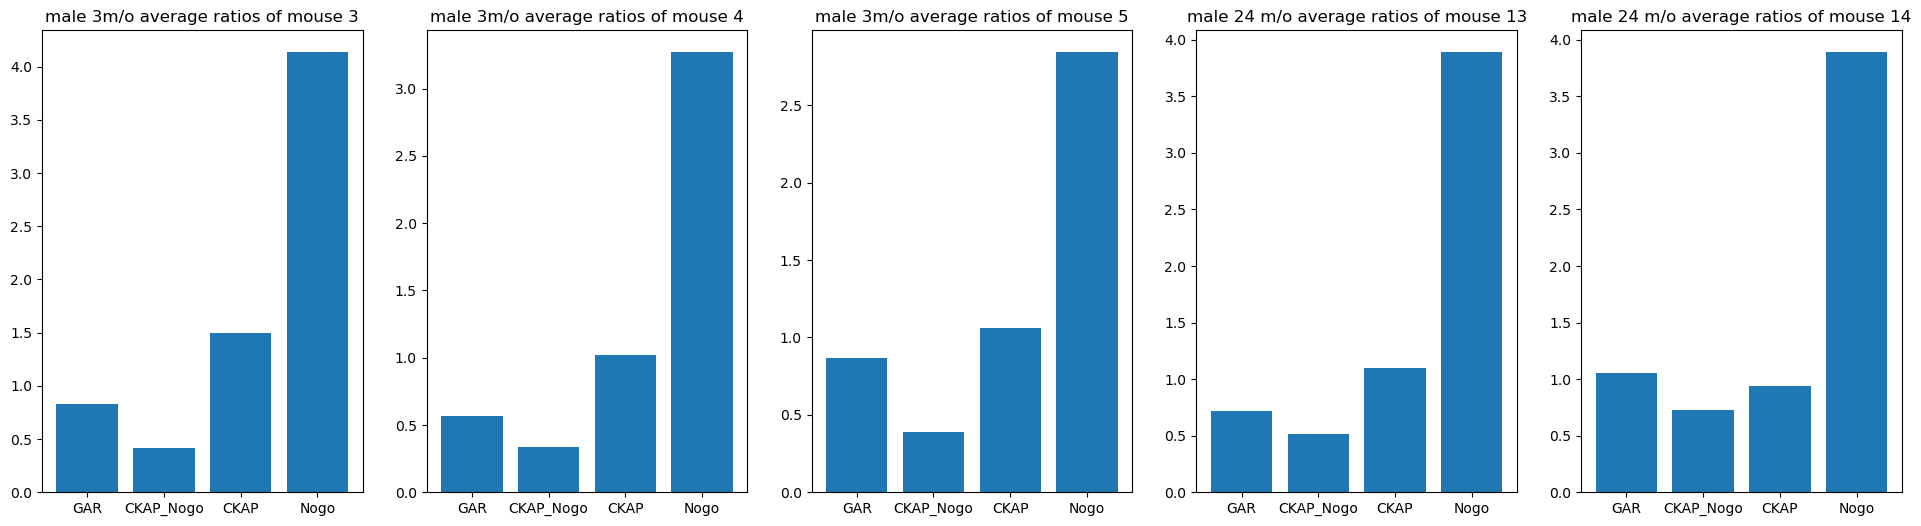

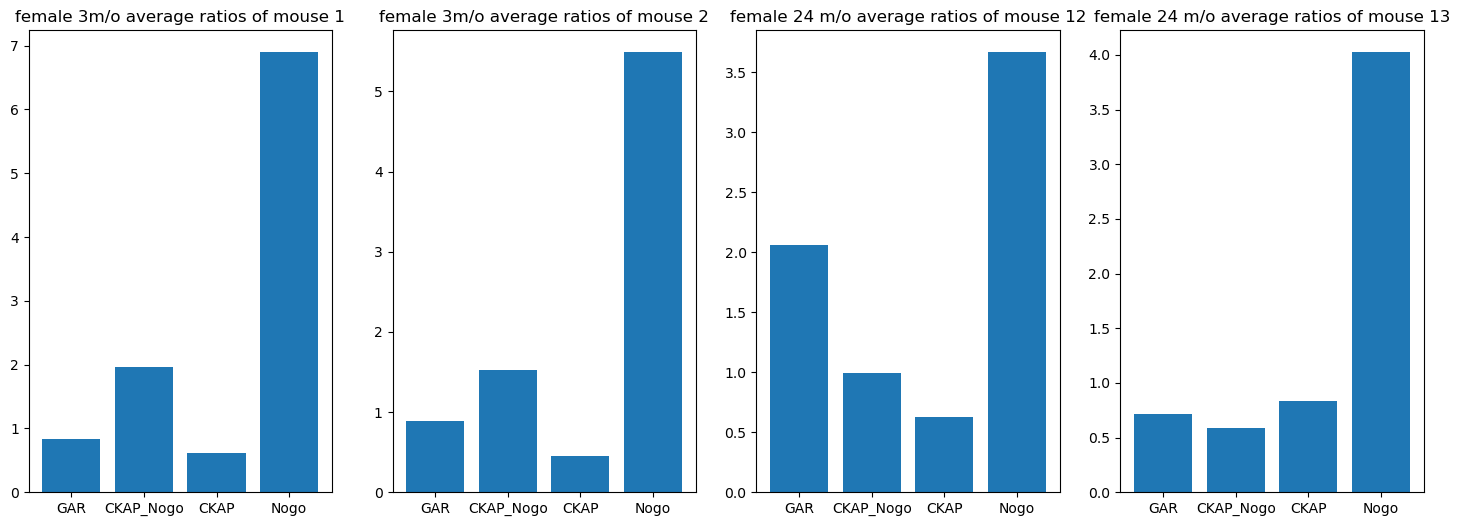

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 6))

x = np.array(['GAR','CKAP_Nogo','CKAP','Nogo'])

m_3_t3_ratios = np.array([np.mean(data_m_3_GAR_t3[:,2]),np.mean(data_m_3_CKAP4_Nogo_t3[:,2]),np.mean(data_m_3_CKAP_t3[:,2]),np.mean(data_m_3_Nogo_t3[:,2])])
ax1.bar(x,m_3_t3_ratios)
ax1.set_title('male 3m/o average ratios of mouse 3')

m_3_t4_ratios = np.array([np.mean(data_m_3_GAR_t4[:,2]),np.mean(data_m_3_CKAP4_Nogo_t4[:,2]),np.mean(data_m_3_CKAP_t4[:,2]),np.mean(data_m_3_Nogo_t4[:,2])])
ax2.bar(x,m_3_t4_ratios)
ax2.set_title('male 3m/o average ratios of mouse 4')

m_3_t5_ratios = np.array([np.mean(data_m_3_GAR_t5[:,2]),np.mean(data_m_3_CKAP4_Nogo_t5[:,2]),np.mean(data_m_3_CKAP_t5[:,2]),np.mean(data_m_3_Nogo_t5[:,2])])
ax3.bar(x,m_3_t5_ratios)
ax3.set_title('male 3m/o average ratios of mouse 5')

m_24_t13_ratios = np.array([np.mean(data_m_24_GAR_t13[:,2]),np.mean(data_m_24_CKAP4_Nogo_t13[:,2]),np.mean(data_m_24_CKAP_t13[:,2]),np.mean(data_m_24_Nogo_t13[:,2])])
ax4.bar(x,m_24_t13_ratios)
ax4.set_title('male 24 m/o average ratios of mouse 13')

m_24_t14_ratios = np.array([np.mean(data_m_24_GAR_t14[:,2]),np.mean(data_m_24_CKAP4_Nogo_t14[:,2]),np.mean(data_m_24_CKAP_t14[:,2]),np.mean(data_m_24_Nogo_t14[:,2])])
ax5.bar(x,m_24_t14_ratios)
ax5.set_title('male 24 m/o average ratios of mouse 14')

plt.show()


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6))
        
f_3_t1_ratios = np.array([np.mean(data_f_3_GAR_t1[:,2]),np.mean(data_f_3_CKAP4_Nogo_t1[:,2]),np.mean(data_f_3_CKAP_t1[:,2]),np.mean(data_f_3_Nogo_t1[:,2])])
ax1.bar(x,f_3_t1_ratios)
ax1.set_title('female 3m/o average ratios of mouse 1')

f_3_t2_ratios = np.array([np.mean(data_f_3_GAR_t2[:,2]),np.mean(data_f_3_CKAP4_Nogo_t2[:,2]),np.mean(data_f_3_CKAP_t2[:,2]),np.mean(data_f_3_Nogo_t2[:,2])])
ax2.bar(x,f_3_t2_ratios)
ax2.set_title('female 3m/o average ratios of mouse 2')

f_24_t12_ratios = np.array([np.mean(data_f_24_GAR_t12[:,2]),np.mean(data_f_24_CKAP4_Nogo_t12[:,2]),np.mean(data_f_24_CKAP_t12[:,2]),np.mean(data_f_24_Nogo_t12[:,2])])
ax3.bar(x,f_24_t12_ratios)
ax3.set_title('female 24 m/o average ratios of mouse 12')

f_24_t13_ratios = np.array([np.mean(data_f_24_GAR_t13[:,2]),np.mean(data_f_24_CKAP4_Nogo_t13[:,2]),np.mean(data_f_24_CKAP_t13[:,2]),np.mean(data_f_24_Nogo_t13[:,2])])
ax4.bar(x,f_24_t13_ratios)
ax4.set_title('female 24 m/o average ratios of mouse 13')

plt.show()

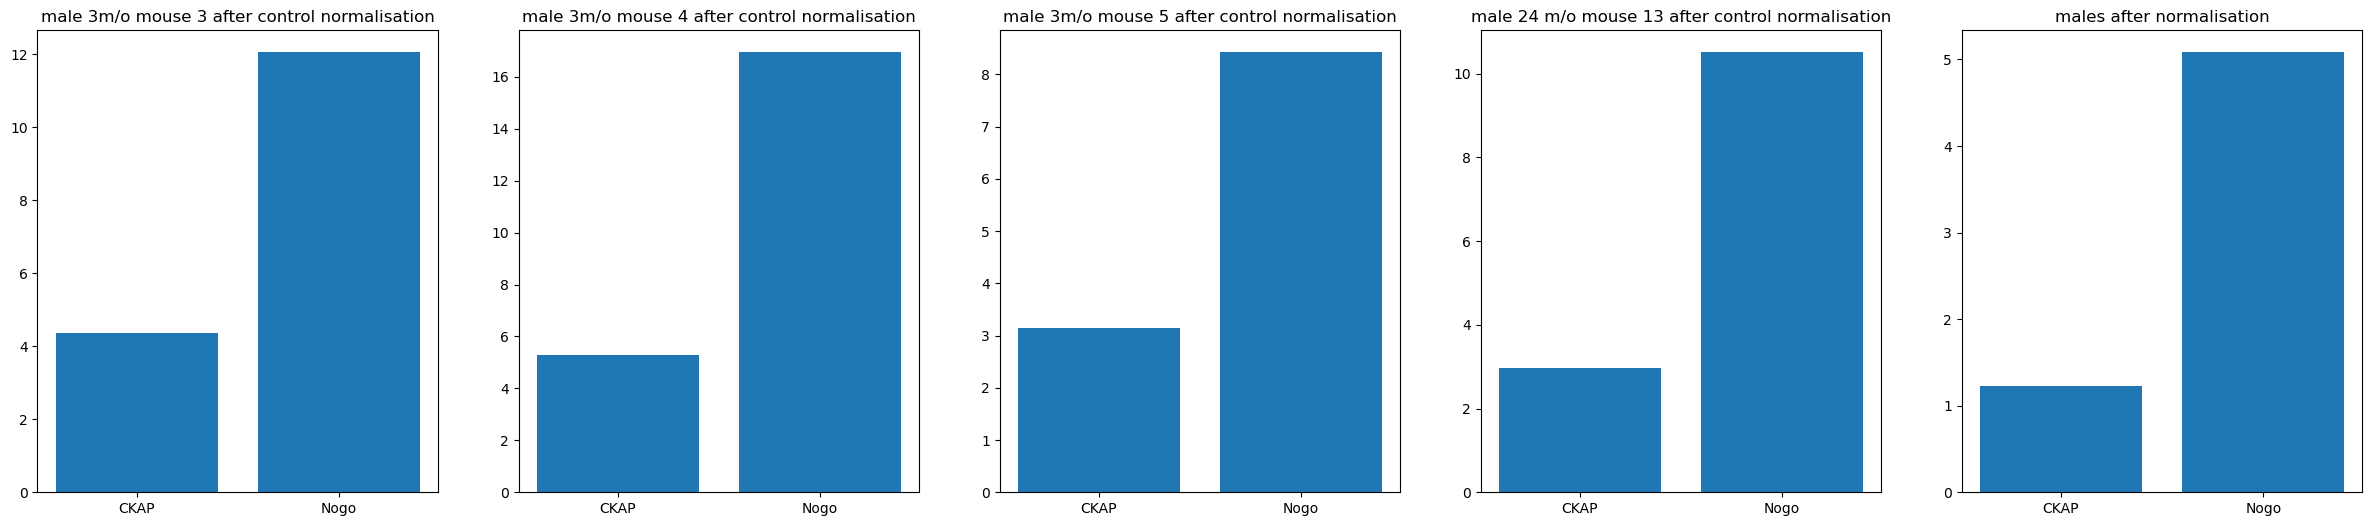

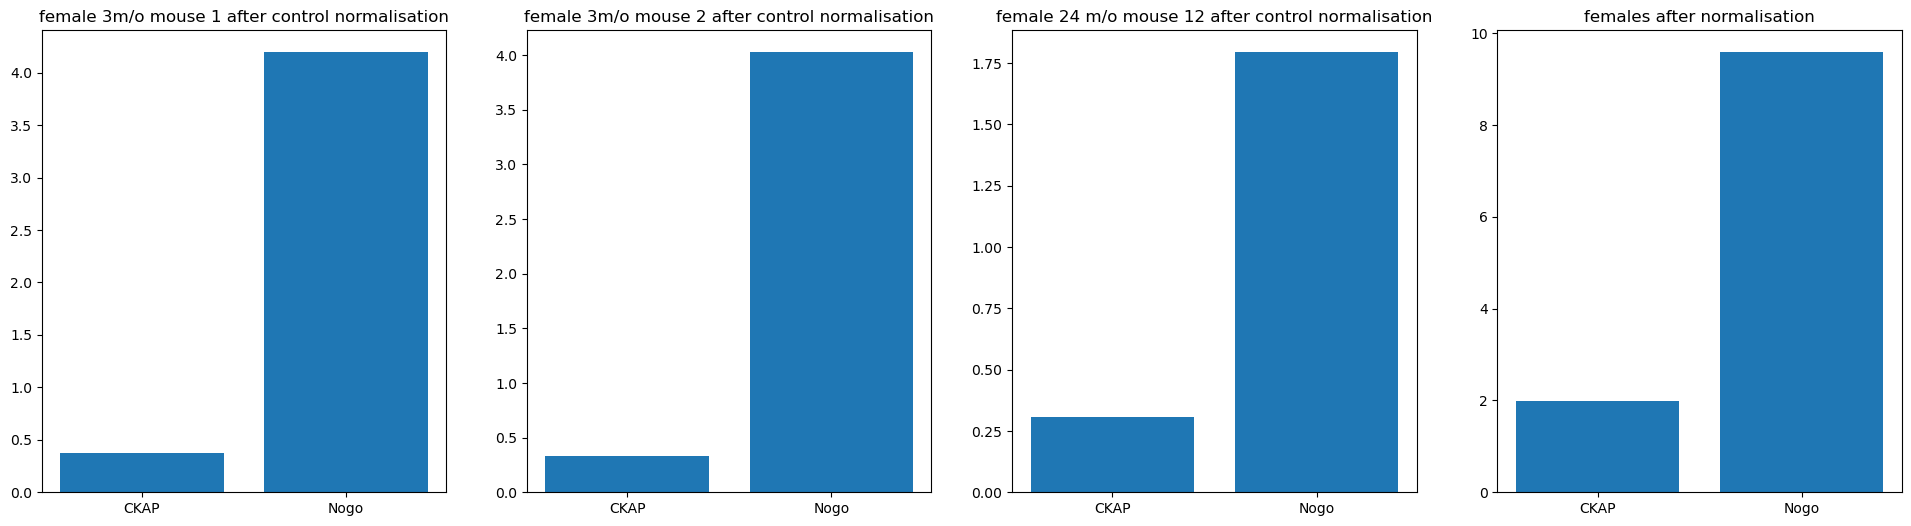

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 6))

x = np.array(['CKAP','Nogo'])

m_3_t3_ratios = np.array([np.mean(data_m_3_CKAP_t3[:,2])/(np.mean(data_m_3_GAR_t3[:,2])*np.mean(data_m_3_CKAP4_Nogo_t3[:,2])),np.mean(data_m_3_Nogo_t3[:,2])/(np.mean(data_m_3_GAR_t3[:,2])*np.mean(data_m_3_CKAP4_Nogo_t3[:,2]))])
ax1.bar(x,m_3_t3_ratios)
ax1.set_title('male 3m/o mouse 3 after control normalisation')

m_3_t4_ratios = np.array([np.mean(data_m_3_CKAP_t4[:,2])/(np.mean(data_m_3_GAR_t4[:,2])*np.mean(data_m_3_CKAP4_Nogo_t4[:,2])),np.mean(data_m_3_Nogo_t4[:,2])/(np.mean(data_m_3_GAR_t4[:,2])*np.mean(data_m_3_CKAP4_Nogo_t4[:,2]))])
ax2.bar(x,m_3_t4_ratios)
ax2.set_title('male 3m/o mouse 4 after control normalisation')

m_3_t5_ratios = np.array([np.mean(data_m_3_CKAP_t5[:,2])/(np.mean(data_m_3_GAR_t5[:,2])*np.mean(data_m_3_CKAP4_Nogo_t5[:,2])),np.mean(data_m_3_Nogo_t5[:,2])/(np.mean(data_m_3_GAR_t5[:,2])*np.mean(data_m_3_CKAP4_Nogo_t5[:,2]))])
ax3.bar(x,m_3_t5_ratios)
ax3.set_title('male 3m/o mouse 5 after control normalisation')

m_24_t13_ratios = np.array([np.mean(data_m_24_CKAP_t13[:,2])/(np.mean(data_m_24_GAR_t13[:,2])*np.mean(data_m_24_CKAP4_Nogo_t13[:,2])),np.mean(data_m_24_Nogo_t13[:,2])/(np.mean(data_m_24_GAR_t13[:,2])*np.mean(data_m_24_CKAP4_Nogo_t13[:,2]))])
ax4.bar(x,m_24_t13_ratios)
ax4.set_title('male 24 m/o mouse 13 after control normalisation')

m_24_t14_ratios = np.array([np.mean(data_m_24_CKAP_t14[:,2])/(np.mean(data_m_24_GAR_t14[:,2])*np.mean(data_m_24_CKAP4_Nogo_t14[:,2])),np.mean(data_m_24_Nogo_t14[:,2])/(np.mean(data_m_24_GAR_t14[:,2])*np.mean(data_m_24_CKAP4_Nogo_t14[:,2]))])
ax5.bar(x,m_24_t14_ratios)
ax5.set_title('male 24 m/o mouse 14 after control normalisation')

plt.title('males after normalisation')
plt.show()


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
        
f_3_t1_ratios = np.array([np.mean(data_f_3_CKAP_t1[:,2])/(np.mean(data_f_3_GAR_t1[:,2])*np.mean(data_f_3_CKAP4_Nogo_t1[:,2])),np.mean(data_f_3_Nogo_t1[:,2])/(np.mean(data_f_3_GAR_t1[:,2])*np.mean(data_f_3_CKAP4_Nogo_t1[:,2]))])
ax1.bar(x,f_3_t1_ratios)
ax1.set_title('female 3m/o mouse 1 after control normalisation')

f_3_t2_ratios = np.array([np.mean(data_f_3_CKAP_t2[:,2])/(np.mean(data_f_3_GAR_t2[:,2])*np.mean(data_f_3_CKAP4_Nogo_t2[:,2])),np.mean(data_f_3_Nogo_t2[:,2])/(np.mean(data_f_3_GAR_t2[:,2])*np.mean(data_f_3_CKAP4_Nogo_t2[:,2]))])
ax2.bar(x,f_3_t2_ratios)
ax2.set_title('female 3m/o mouse 2 after control normalisation')

f_24_t12_ratios = np.array([np.mean(data_f_24_CKAP_t12[:,2])/(np.mean(data_f_24_GAR_t12[:,2])*np.mean(data_f_24_CKAP4_Nogo_t12[:,2])),np.mean(data_f_24_Nogo_t12[:,2])/(np.mean(data_f_24_GAR_t12[:,2])*np.mean(data_f_24_CKAP4_Nogo_t12[:,2]))])
ax3.bar(x,f_24_t12_ratios)
ax3.set_title('female 24 m/o mouse 12 after control normalisation')

f_24_t13_ratios = np.array([np.mean(data_f_24_CKAP_t13[:,2])/(np.mean(data_f_24_GAR_t13[:,2])*np.mean(data_f_24_CKAP4_Nogo_t13[:,2])),np.mean(data_f_24_Nogo_t13[:,2])/(np.mean(data_f_24_GAR_t13[:,2])*np.mean(data_f_24_CKAP4_Nogo_t13[:,2]))])
ax4.bar(x,f_24_t13_ratios)
ax4.set_title('female 24 m/o mouse 13 after control normalisation')

plt.title('females after normalisation')
plt.show()

[ 4.26402759 12.47288559]
[4.26402759 2.09715877]


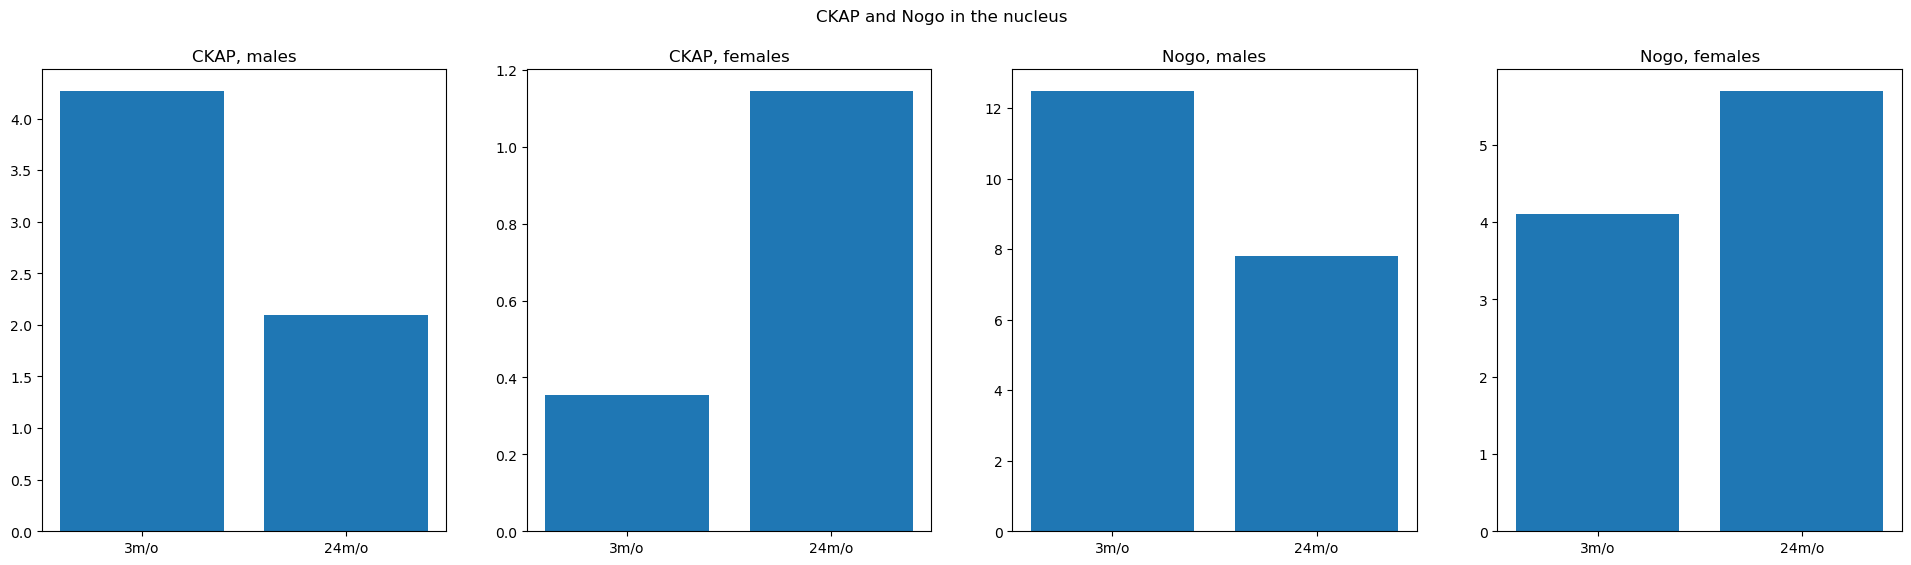

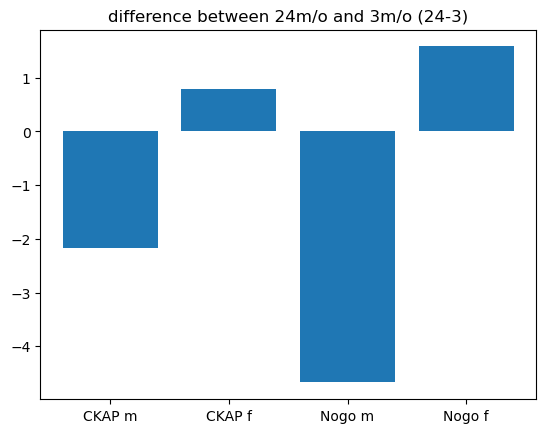

In [28]:
#0 = ckap4, 1 = Nogo
mean_3m = np.array([np.mean(np.array([m_3_t3_ratios[0], m_3_t4_ratios[0], m_3_t5_ratios[0]])), 
                    np.mean(np.array([m_3_t3_ratios[1], m_3_t4_ratios[1], m_3_t5_ratios[1]]))])
mean_3f = np.array([np.mean(np.array([f_3_t1_ratios[0], f_3_t2_ratios[0]])), 
                    np.mean(np.array([f_3_t1_ratios[1], f_3_t2_ratios[1]]))])
mean_24m = np.array([np.mean(np.array([m_24_t13_ratios[0], m_24_t14_ratios[0]])), 
                    np.mean(np.array([m_24_t13_ratios[1], m_24_t14_ratios[1]]))])
mean_24f = np.array([np.mean(np.array([f_24_t12_ratios[0], f_24_t13_ratios[0]])), 
                    np.mean(np.array([f_24_t12_ratios[1], f_24_t13_ratios[1]]))])

print(mean_3m)

CKAP_m = np.array([mean_3m[0], mean_24m[0]])
CKAP_f = np.array([mean_3f[0], mean_24f[0]])
Nogo_m = np.array([mean_3m[1], mean_24m[1]])
Nogo_f = np.array([mean_3f[1], mean_24f[1]])
print(CKAP_m)

x = np.array(['3m/o','24m/o'])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.bar(x,CKAP_m)
ax1.set_title('CKAP, males')

ax2.bar(x,CKAP_f)
ax2.set_title('CKAP, females')

ax3.bar(x, Nogo_m)
ax3.set_title('Nogo, males')

ax4.bar(x, Nogo_f)
ax4.set_title('Nogo, females')

fig.suptitle('CKAP and Nogo in the nucleus')
plt.show()

difference = np.array([CKAP_m[1]-CKAP_m[0], CKAP_f[1]-CKAP_f[0],Nogo_m[1]-Nogo_m[0],Nogo_f[1]-Nogo_f[0]])
x_d = np.array(['CKAP m','CKAP f','Nogo m','Nogo f'])

plt.bar(x_d,difference)
plt.title('difference between 24m/o and 3m/o (24-3)')
plt.show()


### Proving that this result is true ^ (statistically)

In [29]:
print('Full nuclei analysis difference between Nogo-A and CKAP after normalisation, statistical proof')

def normalisation(data, nor_1, nor_2):
    return data/(np.mean(nor_1)*np.mean(nor_2))

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

#------------------------------------------------------------------------------------------------------------
print('CKAP')
n_1 = normalisation(data_m_3_CKAP_t3[:,2],data_m_3_GAR_t3[:,2],data_m_3_CKAP4_Nogo_t3[:,2])
n_2 = normalisation(data_m_3_CKAP_t4[:,2],data_m_3_GAR_t4[:,2],data_m_3_CKAP4_Nogo_t4[:,2])
n_3 = normalisation(data_m_3_CKAP_t5[:,2],data_m_3_GAR_t5[:,2],data_m_3_CKAP4_Nogo_t5[:,2])

n_4 = normalisation(data_m_24_CKAP_t13[:,2],data_m_24_GAR_t13[:,2],data_m_24_CKAP4_Nogo_t13[:,2])
n_5 = normalisation(data_m_24_CKAP_t14[:,2],data_m_24_GAR_t14[:,2],data_m_24_CKAP4_Nogo_t14[:,2])

n_6 = normalisation(data_f_3_CKAP_t1[:,2],data_f_3_GAR_t1[:,2],data_f_3_CKAP4_Nogo_t1[:,2])
n_7 = normalisation(data_f_3_CKAP_t2[:,2],data_f_3_GAR_t2[:,2],data_f_3_CKAP4_Nogo_t2[:,2])

n_8 = normalisation(data_f_24_CKAP_t12[:,2],data_f_24_GAR_t12[:,2],data_f_24_CKAP4_Nogo_t12[:,2])
n_9 = normalisation(data_f_24_CKAP_t13[:,2],data_f_24_GAR_t13[:,2],data_f_24_CKAP4_Nogo_t13[:,2])


CKAP_m_3 = np.concatenate((n_1,n_2,n_3))
CKAP_m_24 = np.concatenate((n_4,n_5))
CKAP_f_3 = np.concatenate((n_6,n_7))
CKAP_f_24 = np.concatenate((n_8,n_9))

d_m_3_24 = cohen_d(CKAP_m_3, CKAP_m_24)
d_f_3_24 = cohen_d(CKAP_f_3, CKAP_f_24)
d_m_f_3 = cohen_d(CKAP_m_3, CKAP_f_3)
d_m_f_24 = cohen_d(CKAP_m_24, CKAP_f_24)

print("Cohen's D between male 3 and 24 months:", d_m_3_24)
print("Cohen's D between female 3 and 24 months:", d_f_3_24)
print("Cohen's D between male and female at 3 months:", d_m_f_3)
print("Cohen's D between male and female at 24 months:", d_m_f_24)
print(' ')
#------------------------------------------------------------------------------------------------------------
print('Nogo-A')
n_1 = normalisation(data_m_3_Nogo_t3[:,2],data_m_3_GAR_t3[:,2],data_m_3_CKAP4_Nogo_t3[:,2])
n_2 = normalisation(data_m_3_Nogo_t4[:,2],data_m_3_GAR_t4[:,2],data_m_3_CKAP4_Nogo_t4[:,2])
n_3 = normalisation(data_m_3_Nogo_t5[:,2],data_m_3_GAR_t5[:,2],data_m_3_CKAP4_Nogo_t5[:,2])

n_4 = normalisation(data_m_24_Nogo_t13[:,2],data_m_24_GAR_t13[:,2],data_m_24_CKAP4_Nogo_t13[:,2])
n_5 = normalisation(data_m_24_Nogo_t14[:,2],data_m_24_GAR_t14[:,2],data_m_24_CKAP4_Nogo_t14[:,2])

n_6 = normalisation(data_f_3_Nogo_t1[:,2],data_f_3_GAR_t1[:,2],data_f_3_CKAP4_Nogo_t1[:,2])
n_7 = normalisation(data_f_3_Nogo_t2[:,2],data_f_3_GAR_t2[:,2],data_f_3_CKAP4_Nogo_t2[:,2])

n_8 = normalisation(data_f_24_Nogo_t12[:,2],data_f_24_GAR_t12[:,2],data_f_24_CKAP4_Nogo_t12[:,2])
n_9 = normalisation(data_f_24_Nogo_t13[:,2],data_f_24_GAR_t13[:,2],data_f_24_CKAP4_Nogo_t13[:,2])


Nogo_m_3 = np.concatenate((n_1,n_2,n_3))
Nogo_m_24 = np.concatenate((n_4,n_5))
Nogo_f_3 = np.concatenate((n_6,n_7))
Nogo_f_24 = np.concatenate((n_8,n_9))


d_m_3_24 = cohen_d(Nogo_m_3, Nogo_m_24)
d_f_3_24 = cohen_d(Nogo_f_3, Nogo_f_24)
d_m_f_3 = cohen_d(Nogo_m_3, Nogo_f_3)
d_m_f_24 = cohen_d(Nogo_m_24, Nogo_f_24)

print("Cohen's D between male 3 and 24 months:", d_m_3_24)
print("Cohen's D between female 3 and 24 months:", d_f_3_24)
print("Cohen's D between male and female at 3 months:", d_m_f_3)
print("Cohen's D between male and female at 24 months:", d_m_f_24)

print(' ')
#------------------------------------------------------------------------------------------------------------
print('Cohens D info:')
print('small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8')



Full nuclei analysis difference between Nogo-A and CKAP after normalisation, statistical proof
CKAP
Cohen's D between male 3 and 24 months: 1.154125278780564
Cohen's D between female 3 and 24 months: -1.00501140043273
Cohen's D between male and female at 3 months: 2.011716372869938
Cohen's D between male and female at 24 months: 0.8856076368433606
 
Nogo-A
Cohen's D between male 3 and 24 months: 0.6398125535812752
Cohen's D between female 3 and 24 months: -0.42273316901663693
Cohen's D between male and female at 3 months: 1.6729310495881131
Cohen's D between male and female at 24 months: 0.3272086697449975
 
Cohens D info:
small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8


# Redone with mouse specificity, nucleus and DAPI control


### Downloading data

In [132]:
excel_file_path_5 = '/Users/alexandra/Bachelor Project code/Full_Nuclei_Analysis_DNA.xlsx'
sheet_name = 'Sheet1'
df_5 = pd.read_excel(excel_file_path_5, sheet_name=sheet_name)
data_5 = df_5.values
data_5n = data_5[:,2:]
data_5[0][-4].split('/')[-1].split('_')[-2]

'01'

In [133]:
print(data_5[0][-4].split('/')[-1])
data_5[0][-4].split('/')[-1].split('_')[-3]

24_month_liver_m_Nogo_A_t13_01_s00.tif


't13'

In [134]:
print(data_5[0])
print(data_5[:,2])
df

[0 0 240.4322580645161 77.59677419354838 0.3227386159336678 310
 '24_month_liver_m_Nogo_A_t13_01_s00.tif' '24_month_liver' 'NOGOA' 'male']
[240.4322580645161 158.832285115304 55.41438356164384 ...
 39.07913669064748 28.5958904109589 29.7542662116041]


,Value,Sex,Age
0,0.855185,Male,24 Months
1,0.485583,Male,24 Months
2,0.692999,Male,24 Months
3,0.912619,Male,24 Months
4,1.621285,Male,24 Months
...,...,...,...
45878,1.547139,Female,3 Months
45879,1.926526,Female,3 Months
45880,1.051546,Female,3 Months
45881,2.939281,Female,3 Months


### Putting the data into arrays

In [135]:
data_m_24_Nogo_l_t14 = []
data_m_24_Nogo_l_t13 = []
data_f_24_Nogo_l_t12 = []
data_f_24_Nogo_l_t13 = []

data_m_3_Nogo_l_t3 = []
data_m_3_Nogo_l_t4 = []
data_m_3_Nogo_l_t5 = []
data_f_3_Nogo_l_t1 = []
data_f_3_Nogo_l_t2 = []


for i in range(len(data_5)):
    if data_5[i][-3] == '24_month_liver':
        if data_5[i][-1] == 'male' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't14' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't14':
            data_m_24_Nogo_l_t14.append(data_5n[i])
        if data_5[i][-1] == 'male' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't13' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't13':
            data_m_24_Nogo_l_t13.append(data_5n[i])
        if data_5[i][-1] == 'female' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't12' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't12':
            data_f_24_Nogo_l_t12.append(data_5n[i])
        if data_5[i][-1] == 'female' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't13' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't13':
            data_f_24_Nogo_l_t13.append(data_5n[i])
    if data_5[i][-3] == '3_month_liver':
        if data_5[i][-1] == 'male' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't3' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't3':
            data_m_3_Nogo_l_t3.append(data_5n[i])
        if data_5[i][-1] == 'male' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't4' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't4':
            data_m_3_Nogo_l_t4.append(data_5n[i])
        if data_5[i][-1] == 'male' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't5' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't5':
            data_m_3_Nogo_l_t5.append(data_5n[i])
        if data_5[i][-1] == 'female' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't1' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't1' or data_5[i][-4].split('/')[-1].split('_')[-4] == 't1':
            data_f_3_Nogo_l_t1.append(data_5n[i])
        if data_5[i][-1] == 'female' and data_5[i][-4].split('/')[-1].split('_')[-3] == 't2' or data_5[i][-4].split('/')[-1].split('_')[-2] == 't2' or data_5[i][-4].split('/')[-1].split('_')[-4] == 't2':
            data_f_3_Nogo_l_t2.append(data_5n[i])
            
            
data_m_24_Nogo_t14 = np.array(data_m_24_Nogo_l_t14)
data_m_24_Nogo_t13 = np.array(data_m_24_Nogo_l_t13)
data_f_24_Nogo_t12 = np.array(data_f_24_Nogo_l_t12)
data_f_24_Nogo_t13 = np.array(data_f_24_Nogo_l_t13)

data_m_3_Nogo_t3 = np.array(data_m_3_Nogo_l_t3)
data_m_3_Nogo_t4 = np.array(data_m_3_Nogo_l_t4)
data_m_3_Nogo_t5 = np.array(data_m_3_Nogo_l_t5)
data_f_3_Nogo_t1 = np.array(data_f_3_Nogo_l_t1)
print(data_f_3_Nogo_t1[:,-4])
data_f_3_Nogo_t2 = np.array(data_f_3_Nogo_l_t2)

data_m_24_Nogo_t13[0]

['Project001_f_Nogo_A_GAR_t1_01_s00.tif'
 'Project001_f_Nogo_A_GAR_t1_01_s00.tif'
 'Project001_f_Nogo_A_GAR_t1_01_s00.tif' ...
 'Project001_f_Nogo_A_GAR_t1_03_s08.tif'
 'Project001_f_Nogo_A_GAR_t1_03_s08.tif'
 'Project001_f_Nogo_A_GAR_t1_03_s08.tif']


array([240.4322580645161, 77.59677419354838, 0.3227386159336678, 310,
       '24_month_liver_m_Nogo_A_t13_01_s00.tif', '24_month_liver',
       'NOGOA', 'male'], dtype=object)

### Plotting the average fluorescence of Nogo-A in nucleus in each individual mouse

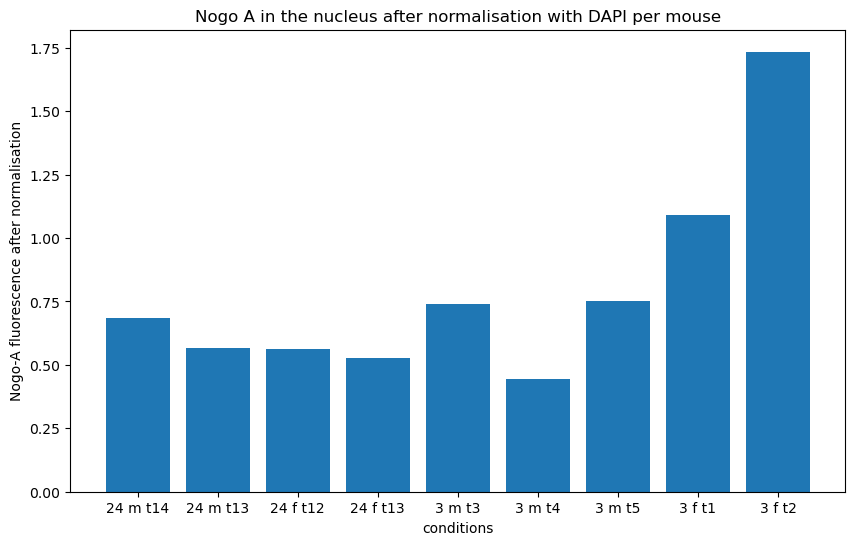

In [136]:
avg = np.array([np.mean(data_m_24_Nogo_t14[:,2]),
            np.mean(data_m_24_Nogo_t13[:,2]),
            np.mean(data_f_24_Nogo_t12[:,2]),
            np.mean(data_f_24_Nogo_t13[:,2]),
            np.mean(data_m_3_Nogo_t3[:,2]),
             np.mean(data_m_3_Nogo_t4[:,2]),
             np.mean(data_m_3_Nogo_t5[:,2]),
             np.mean(data_f_3_Nogo_t1[:,2]),
             np.mean(data_f_3_Nogo_t2[:,2])])
x = np.array(['24 m t14','24 m t13','24 f t12','24 f t13','3 m t3','3 m t4','3 m t5','3 f t1','3 f t2'])
plt.figure(figsize=(10,6))
plt.bar(x,avg)
plt.xlabel('conditions')
plt.ylabel('Nogo-A fluorescence after normalisation')
plt.title('Nogo A in the nucleus after normalisation with DAPI per mouse')
plt.show()

In [137]:
print(avg)
print(avg[2:4])

[0.68433947 0.56786093 0.56323521 0.52866997 0.74173014 0.44309658
 0.75327539 1.09046684 1.73394775]
[0.56323521 0.52866997]


### Plotting the fluorescence of Nogo-A averaged over each tissue

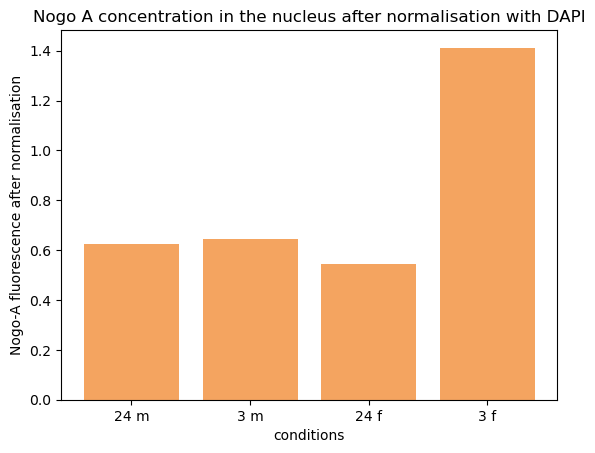

-0.019933834408439988

In [138]:
y = np.array([np.mean(avg[:2]),np.mean(avg[4:7]),np.mean(avg[2:4]),np.mean(avg[7:])])
x = np.array(['24 m','3 m','24 f','3 f'])
plt.bar(x,y,color = 'sandybrown')
plt.xlabel('conditions')
plt.ylabel('Nogo-A fluorescence after normalisation')
plt.title('Nogo A concentration in the nucleus after normalisation with DAPI')
plt.show()

np.mean(avg[:2]) - np.mean(avg[4:7])

### Proving that this result ^ is true statistically

In [139]:
print('Full nuclei analysis after DAPI normalisation difference between [Nogo-A] in age, statistical proof')

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d
#------------------------------------------------------------------------------------------------------------
print('Nogo-A')

n_1 = data_m_24_Nogo_t14[:,2]
n_2 = data_m_24_Nogo_t13[:,2]

n_3 = data_f_24_Nogo_t12[:,2]
n_4 = data_f_24_Nogo_t13[:,2]

n_5 = data_m_3_Nogo_t3[:,2]
n_6 = data_m_3_Nogo_t4[:,2]
n_7 = data_m_3_Nogo_t5[:,2]

n_8 = data_f_3_Nogo_t1[:,2]
n_9 = data_f_3_Nogo_t2[:,2]


Nogo_m_24 = np.concatenate((n_1,n_2))
Nogo_m_3 = np.concatenate((n_5,n_6,n_7))
Nogo_f_3 = np.concatenate((n_8,n_9))
Nogo_f_24 = np.concatenate((n_3,n_4))


d_m_3_24 = cohen_d(Nogo_m_3, Nogo_m_24)
d_f_3_24 = cohen_d(Nogo_f_3, Nogo_f_24)
d_m_f_3 = cohen_d(Nogo_m_3, Nogo_f_3)
d_m_f_24 = cohen_d(Nogo_m_24, Nogo_f_24)

print("Cohen's D between male 3 and 24 months:", d_m_3_24)
print("Cohen's D between female 3 and 24 months:", d_f_3_24)
print("Cohen's D between male and female at 3 months:", d_m_f_3)
print("Cohen's D between male and female at 24 months:", d_m_f_24)

print(' ')
#------------------------------------------------------------------------------------------------------------
print('Cohens D info:')
print('small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8')


Full nuclei analysis after DAPI normalisation difference between [Nogo-A] in age, statistical proof
Nogo-A
Cohen's D between male 3 and 24 months: 0.09213953591289199
Cohen's D between female 3 and 24 months: 1.3922229406739544
Cohen's D between male and female at 3 months: -1.2158403780365996
Cohen's D between male and female at 24 months: 0.24013941976627406
 
Cohens D info:
small effect size = 0.2, medium effect size = 0.5, large effect size = 0.8


In [140]:
from scipy import stats

In [141]:
A = np.array(['1','2','3'])
B = np.array(['4','5'])
np.concatenate((A,B,A))

array(['1', '2', '3', '4', '5', '1', '2', '3'], dtype='<U1')

#### Testing if the difference between male 24 mo and 3mo is statistically significant (not mouse specific)

In [142]:
m_24 = np.concatenate((data_m_24_Nogo_t14[:,2],data_m_24_Nogo_t13[:,2]))
m_24 = m_24.astype(float)
m_3 = np.concatenate((data_m_3_Nogo_t3[:,2],data_m_3_Nogo_t4[:,2],data_m_3_Nogo_t5[:,2]))
m_3 = m_3.astype(float)
t_statistic, p_val = stats.ttest_ind(m_24, m_3, equal_var=False)
print('test statistic:',t_statistic)
print('p_val:', p_val)
if p_val < 0.05:
    print('diff is significant')
else:
    print('diff not stat significant')

test statistic: -5.504579645061177
p_val: 3.785053090657433e-08
diff is significant


In [143]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A+B)
C = [1,2,3]
D = [4,5,6]
print(C+D)

[5 7 9]
[1, 2, 3, 4, 5, 6]


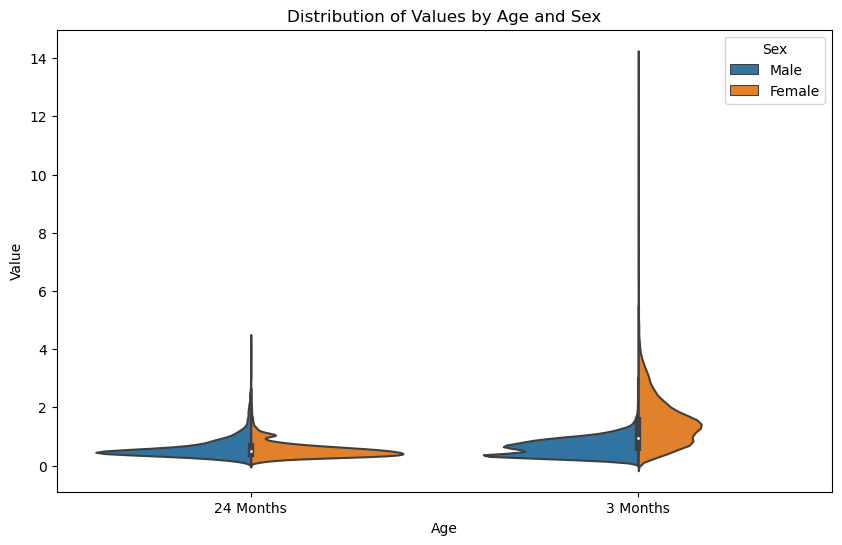

In [144]:
import seaborn as sns

m_24 = np.concatenate((data_m_24_Nogo_t14[:,2],data_m_24_Nogo_t13[:,2]))
m_24 = m_24.astype(float)
m_3 = np.concatenate((data_m_3_Nogo_t3[:,2],data_m_3_Nogo_t4[:,2],data_m_3_Nogo_t5[:,2]))
m_3 = m_3.astype(float)
f_24 = np.concatenate((data_f_24_Nogo_t12[:,2],data_f_24_Nogo_t13[:,2]))
f_24 = f_24.astype(float)
f_3 = np.concatenate((data_f_3_Nogo_t1[:,2],data_f_3_Nogo_t2[:,2]))
f_3 = f_3.astype(float)

m_24 = m_24.tolist()
m_3 = m_3.tolist()
f_24 = f_24.tolist()
f_3 = f_3.tolist()

df = pd.DataFrame({
    'Value': m_24 + m_3 + f_24 + f_3,
    'Sex': ['Male']*len(m_24) + ['Male']*len(m_3) + ['Female']*len(f_24) + ['Female']*len(f_3),
    'Age': ['24 Months']*len(m_24) + ['3 Months']*len(m_3) + ['24 Months']*len(f_24) + ['3 Months']*len(f_3)
})

#sns.violinplot(x='Group', y='Values', data=df)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Value', hue='Sex', data=df, split=True)
plt.title('Distribution of Values by Age and Sex')
plt.show()



#### Testing if the difference between female 24 mo and 3mo is statistically significant (not mouse specific)

In [145]:
f_24 = np.concatenate((data_f_24_Nogo_t12[:,2],data_f_24_Nogo_t13[:,2]))
f_24 = f_24.astype(float)
f_3 = np.concatenate((data_f_3_Nogo_t1[:,2],data_f_3_Nogo_t2[:,2]))
f_3 = f_3.astype(float)
t_statistic_2, p_val_2 = stats.ttest_ind(f_24, f_3, equal_var=False)
print('test statistic:',t_statistic_2)
print('p_val:', p_val_2)
if p_val_2 < 0.1:
    print('diff is significant')
else:
    print('diff not stat significant')
    
print('mean f_24',np.mean(f_24))
print('mean f_3',np.mean(f_3))
print('variance of f_24',np.var(f_24))
print('variance of f_3',np.var(f_3))
print('t = ',(np.mean(f_24)-np.mean(f_3))/(np.sqrt((np.var(f_24)/len(f_24))+(np.var(f_3)/len(f_3)))))
print('len(f_24) =',len(f_24),'len(f_3) =',len(f_3),'df =',len(f_24)+len(f_3)-2)


test statistic: -137.1886540122889
p_val: 0.0
diff is significant
mean f_24 0.5450448440572514
mean f_3 1.5163324519943455
variance of f_24 0.0704241696641836
variance of f_3 0.7666032271525131
t =  -137.1928310418303
len(f_24) = 11690 len(f_3) = 17384 df = 29072


#### ANOVA, F-test and diagnostic plots for mouse-specific comparison

In [147]:
#assuming that we can't to t-test cus n>>
m_24_t14 = data_m_24_Nogo_t14[:,2]
m_24_t13 = data_m_24_Nogo_t13[:,2]
f_24_t12 = data_f_24_Nogo_t12[:,2]
f_24_t13 = data_f_24_Nogo_t13[:,2]
m_3_t3 = data_m_3_Nogo_t3[:,2]
m_3_t4 = data_m_3_Nogo_t4[:,2]
m_3_t5 = data_m_3_Nogo_t5[:,2]
f_3_t1 = data_f_3_Nogo_t1[:,2]
f_3_t2 = data_f_3_Nogo_t2[:,2]

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


values = np.concatenate([m_24_t14, m_24_t13, m_3_t3, m_3_t4])
groups = ['m_24_t14'] * len(m_24_t14) + ['m_24_t13'] * len(m_24_t13) + ['m_3_t3'] * len(m_3_t3) + ['m_3_t4'] * len(m_3_t4)

# Create a DataFrame
#data = {'group': groups, 'values': values}
data = np.concatenate([m_24_t14, m_24_t13, m_3_t3, m_3_t4])
df = pd.DataFrame({'values': data, 'group': groups})
df['values'] = pd.to_numeric(df['values'])
print(df)


# Perform ANOVA
model = ols('values ~ group', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(anova_table)

# Generate diagnostic plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sm.graphics.qqplot(model.resid, line='s', ax=ax[0, 0])
ax[0, 0].set_title("QQ Plot")

sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax[0, 1])
ax[0, 1].set_title("Residuals vs Fitted")

sns.boxplot(x='group', y='values', data=df, ax=ax[1, 0])
ax[1, 0].set_title("Boxplot by Group")

sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax[1, 1])
ax[1, 1].set_title("Residuals vs Fitted")

plt.tight_layout()
plt.show()

f_statistic, p_value = stats.f_oneway(m_24_t14, m_24_t13, m_3_t3, m_3_t4, m_3_t5)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")

ModuleNotFoundError: No module named 'statsmodels'

#### T-test on mouse-specific data and Type I and Type II error calculations

In [146]:
from scipy.stats import ttest_ind
from scipy.stats import t


print('Male 24m/o compared to 3m/o')
m_3_avg = np.array([np.mean(m_3_t3),np.mean(m_3_t4),np.mean(m_3_t5)])
m_24_avg = np.array([np.mean(m_24_t13),np.mean(m_24_t14)])
t_statistic_2, p_val_2 = stats.ttest_ind(m_3_avg, m_24_avg, equal_var=False)
print('test statistic:',t_statistic_2)
print('p_val:', p_val_2)
if p_val_2 < 0.2:
    print('diff is significant')
else:
    print('diff not stat significant')
    
print()

print('Female 24m/o compared to 3m/o')
f_3_avg = np.array([np.mean(f_3_t1),np.mean(f_3_t2)])
f_24_avg = np.array([np.mean(f_24_t12),np.mean(f_24_t13)])
t_statistic_2, p_val_2 = stats.ttest_ind(f_3_avg, f_24_avg, equal_var=False)
print('test statistic:',t_statistic_2)
print('p_val:', p_val_2)
if p_val_2 < 0.2:
    print('diff is significant')
else:
    print('diff not stat significant')
    
print()
    
print('Error calculation')
alpha = 0.2
degrees_of_freedom = len(m_3_avg) + len(m_24_avg) - 2
critical_t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
critical_t_value_upper = critical_t_value
critical_t_value_lower = -critical_t_value
type_1_error = sum(m_3_avg > critical_t_value_upper) / len(m_3_avg)
type_2_error = sum(m_24_avg <= critical_t_value_upper) / len(m_24_avg)
print(m_3_avg)
plt.figure(figsize=(10, 6))
plt.hist(m_3_avg, alpha=0.5, label='m_3_avg')
plt.hist(m_24_avg, alpha=0.5, label='m_24_avg')
plt.axvline(x=critical_t_value_lower, color='r', linestyle='--', label='Critical Region (Lower)')
plt.axvline(x=critical_t_value_upper, color='b', linestyle='--', label='Critical Region (Upper)')
plt.legend()
plt.title('Type 1 and Type 2 Errors in t-Test')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.show()

print(f'Type 1 Error (False Positive Rate): {type_1_error:.2%}')
print(f'Type 2 Error (False Negative Rate): {type_2_error:.2%}')
print(f'p-value: {p_value:.4f}')

Male 24m/o compared to 3m/o


NameError: name 'm_3_t3' is not defined

### Testting per image

In [18]:
print(data_5[10])
data_5[33664][-4].split('/')[-1].split('_')[-1]



[10 0 139.6869918699187 56.28048780487805 0.4029042865873178 492
 '24_month_liver_m_Nogo_A_t13_01_s00.tif' '24_month_liver' 'NOGOA' 'male']


's02.tif'

In [148]:
import pandas as pd

df_5['Sex'] = df_5['Sex']
df_5['Age'] = df_5['Age']
df_5['Timepoint'] = df_5['Image'].str.split('_').str[-3]
df_5['Picture'] = df_5['Image'].str.split('_').str[-2]
df_5['Slice'] = df_5['Image'].str.split('_').str[-1]

data_groups = df_5.groupby(['Sex', 'Age', 'Timepoint', 'Picture', 'Slice'])

data_arrays = {}

for index, row in df_5.iterrows():
    sex = row['Sex']
    age = row['Age']
    timepoint = row['Timepoint']
    image_id = row['Picture']
    slice_id = row['Slice']
    array_name = f"{sex}_{age}_{timepoint}_{image_id}_{slice_id}"

    identifiers = (sex, age, timepoint, image_id, slice_id)  # Convert to a tuple

    if identifiers not in data_arrays:
        data_arrays[identifiers] = []

    data = row['Ratio']
    data_arrays[identifiers].append(data)

#for identifiers, data in data_arrays.items():
    #print(identifiers)
    #print(data[:5])

print(len(data_arrays))

#print('now',data_arrays[('male', '3_month_liver', 't3', '02', 's01.tif')])

#for age_group in df_5['Age'].unique():
averages = {}

for identifiers, data in data_arrays.items():
    array_average = np.mean(data)
    averages[identifiers] = array_average
    print(identifiers)
    print(array_average)
print(len(averages))
print()
#print(averages)

268
('male', '24_month_liver', 't13', '01', 's00.tif')
0.4410854341572059
('male', '24_month_liver', 't13', '01', 's01.tif')
0.47295747151198136
('male', '24_month_liver', 't13', '01', 's02.tif')
0.4230192699740537
('male', '24_month_liver', 't13', '01', 's03.tif')
0.5367940226820332
('male', '24_month_liver', 't13', '01', 's04.tif')
0.4969159634555065
('male', '24_month_liver', 't13', '01', 's05.tif')
0.4917555611544994
('male', '24_month_liver', 't13', '01', 's06.tif')
0.4776871112474404
('male', '24_month_liver', 't13', '01', 's07.tif')
0.4803348448797154
('male', '24_month_liver', 't13', '01', 's08.tif')
0.44337802287792677
('male', '24_month_liver', 't13', '02', 's00.tif')
0.4893773252294031
('male', '24_month_liver', 't13', '02', 's01.tif')
0.5484829030804842
('male', '24_month_liver', 't13', '02', 's02.tif')
0.5912965900061955
('male', '24_month_liver', 't13', '02', 's03.tif')
0.5616776016067835
('male', '24_month_liver', 't13', '02', 's04.tif')
0.580901283926539
('male', '24_mo

t-test males
t-statistic: -0.9794422354276472
p-value: 0.32913976455065574
Fail to reject the null hypothesis: There is no significant difference between the groups.

t-tests for females
t-statistic: -9.325058838560105
p-value: 3.5911796873925244e-16
Reject the null hypothesis: There is a significant difference between the groups.

Error calculation
Males


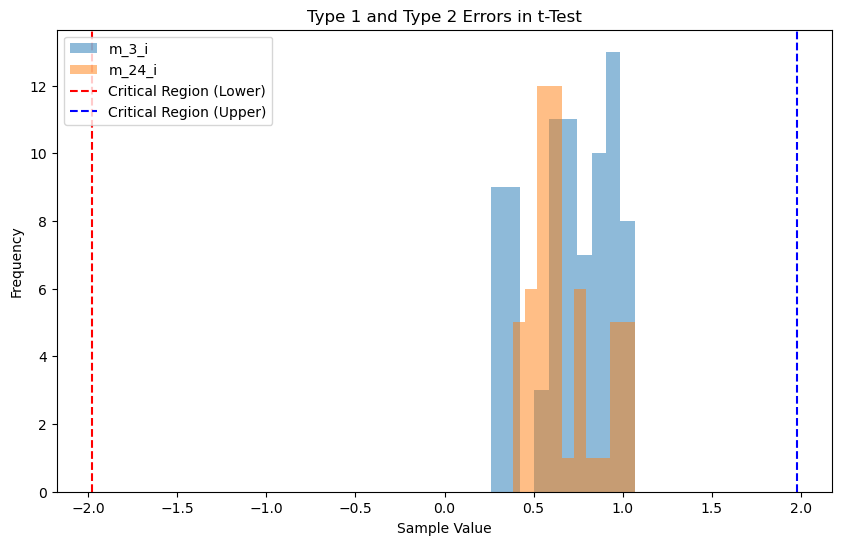

Type 1 Error (False Positive Rate): 0.00%
Type 2 Error (False Negative Rate): 100.00%
p-value: 0.0000

Females


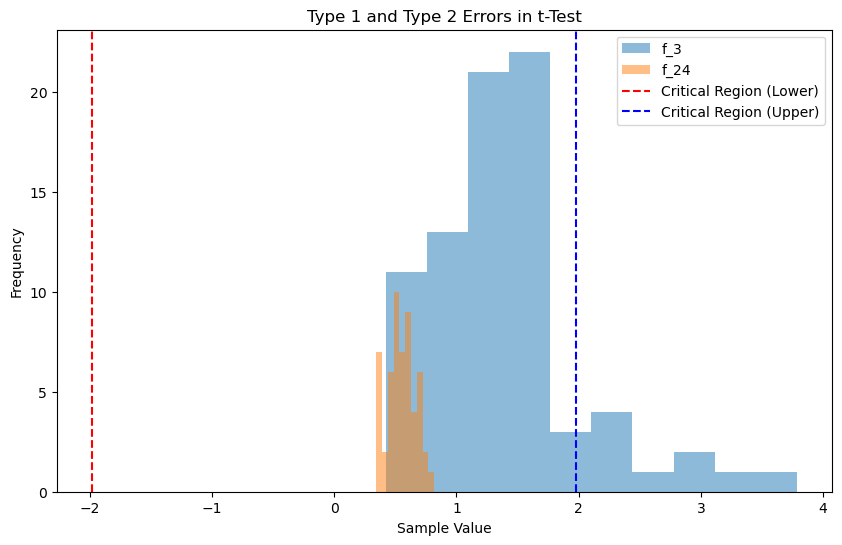

Type 1 Error (False Positive Rate): 11.39%
Type 2 Error (False Negative Rate): 100.00%
p-value: 0.0000


In [149]:
print('t-test males')
from scipy.stats import ttest_ind

m_24_i = [average for identifiers, average in averages.items() if identifiers[0] == 'male' and identifiers[1] == '24_month_liver']
m_3_i = [average for identifiers, average in averages.items() if identifiers[0] == 'male' and identifiers[1] == '3_month_liver']

t_statistic, p_value = ttest_ind(m_24_i, m_3_i)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

print()
print('t-tests for females')
f_24_i = [average for identifiers, average in averages.items() if identifiers[0] == 'female' and identifiers[1] == '24_month_liver']
f_3_i = [average for identifiers, average in averages.items() if identifiers[0] == 'female' and identifiers[1] == '3_month_liver']

t_statistic, p_value = ttest_ind(f_24_i, f_3_i)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")
    
print()
print('Error calculation')
print('Males')
alpha = 0.05
degrees_of_freedom = len(m_3_i) + len(m_24_i) - 2
critical_t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
critical_t_value_upper = critical_t_value
critical_t_value_lower = -critical_t_value
type_1_error = sum(m_3_i > critical_t_value_upper) / len(m_3_i)
type_2_error = sum(m_24_i <= critical_t_value_upper) / len(m_24_i)
#print(m_3_avg)
plt.figure(figsize=(10, 6))
plt.hist(m_3_i, alpha=0.5, label='m_3_i')
plt.hist(m_24_i, alpha=0.5, label='m_24_i')
plt.axvline(x=critical_t_value_lower, color='r', linestyle='--', label='Critical Region (Lower)')
plt.axvline(x=critical_t_value_upper, color='b', linestyle='--', label='Critical Region (Upper)')
plt.legend()
plt.title('Type 1 and Type 2 Errors in t-Test')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.show()

print(f'Type 1 Error (False Positive Rate): {type_1_error:.2%}')
print(f'Type 2 Error (False Negative Rate): {type_2_error:.2%}')
print(f'p-value: {p_value:.4f}')

print()
print('Females')
degrees_of_freedom = len(f_3_i) + len(f_24_i) - 2
critical_t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
critical_t_value_upper = critical_t_value
critical_t_value_lower = -critical_t_value
type_1_error = sum(f_3_i > critical_t_value_upper) / len(f_3_i)
type_2_error = sum(f_24_i <= critical_t_value_upper) / len(f_24_i)
#print(m_3_avg)
plt.figure(figsize=(10, 6))
plt.hist(f_3_i, alpha=0.5, label='f_3')
plt.hist(f_24_i, alpha=0.5, label='f_24')
plt.axvline(x=critical_t_value_lower, color='r', linestyle='--', label='Critical Region (Lower)')
plt.axvline(x=critical_t_value_upper, color='b', linestyle='--', label='Critical Region (Upper)')
plt.legend()
plt.title('Type 1 and Type 2 Errors in t-Test')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.show()

print(f'Type 1 Error (False Positive Rate): {type_1_error:.2%}')
print(f'Type 2 Error (False Negative Rate): {type_2_error:.2%}')
print(f'p-value: {p_value:.4f}')


In [150]:
for i in range(len(data_f_3_Nogo_t2_01)):
    print(data_f_3_Nogo_t2_01[i:,-4])

NameError: name 'data_f_3_Nogo_t2_01' is not defined

In [19]:
avg = np.array([np.mean(data_m_24_Nogo_t14_01[:,2]),
                np.mean(data_m_24_Nogo_t14_02[:,2]),
                np.mean(data_m_24_Nogo_t14_03[:,2]),
                np.mean(data_m_24_Nogo_t13_01[:,2]),
                np.mean(data_m_24_Nogo_t13_02[:,2]),
                np.mean(data_m_24_Nogo_t13_03[:,2]),
                np.mean(data_f_24_Nogo_t12_01[:,2]),
                np.mean(data_f_24_Nogo_t12_02[:,2]),
                np.mean(data_f_24_Nogo_t12_03[:,2]),
                np.mean(data_f_24_Nogo_t13_01[:,2]),
                np.mean(data_f_24_Nogo_t13_02[:,2]),
                np.mean(data_f_24_Nogo_t13_03[:,2]),
                np.mean(data_m_3_Nogo_t3_01[:,2]),
                np.mean(data_m_3_Nogo_t3_02[:,2]),
                np.mean(data_m_3_Nogo_t3_03[:,2]),
                np.mean(data_m_3_Nogo_t4_01[:,2]),
                np.mean(data_m_3_Nogo_t4_02[:,2]),
                np.mean(data_m_3_Nogo_t4_03[:,2]),
                np.mean(data_m_3_Nogo_t5_01[:,2]),
                np.mean(data_m_3_Nogo_t5_02[:,2]),
                np.mean(data_m_3_Nogo_t5_03[:,2]),
                np.mean(data_f_3_Nogo_t1_01[:,2]),
                np.mean(data_f_3_Nogo_t1_02[:,2]),
                np.mean(data_f_3_Nogo_t1_03[:,2]),
                np.mean(data_f_3_Nogo_t2_01[:,2]),
                np.mean(data_f_3_Nogo_t2_02[:,2]),
                np.mean(data_f_3_Nogo_t2_03[:,2]),
               ])
print(len(avg))
x = np.array(['24 m t14 01','24 m t14 02','24 m t14 03','24 m t13 01','24 m t13 02','24 m t13 03',
              '24 f t12 01','24 f t12 02','24 f t12 03','24 f t13 01','24 f t13 02','24 f t13 03',
              '3 m t3 01','3 m t3 02','3 m t3 03','3 m t4 01','3 m t4 02','3 m t4 03','3 m t5 01','3 m t5 02','3 m t5 03',
              '3 f t1 01','3 f t1 02','3 f t1 03','3 f t2 01','3 f t2 02','3 f t2 03'])
plt.figure(figsize=(33,6))
plt.bar(x,avg)
plt.xlabel('conditions')
plt.ylabel('Nogo-A fluorescence after normalisation')
plt.title('Nogo A in the nucleus after normalisation with DAPI per mouse and per image')
plt.show()

NameError: name 'data_m_24_Nogo_t14_01' is not defined

In [22]:
m_24 = np.array([np.mean(data_m_24_Nogo_t14_01[:,2]),
                np.mean(data_m_24_Nogo_t14_02[:,2]),
                np.mean(data_m_24_Nogo_t14_03[:,2]),
                np.mean(data_m_24_Nogo_t13_01[:,2]),
                np.mean(data_m_24_Nogo_t13_02[:,2]),
                np.mean(data_m_24_Nogo_t13_03[:,2])])
m_3 = np.array([np.mean(data_m_3_Nogo_t3_01[:,2]),
                np.mean(data_m_3_Nogo_t3_02[:,2]),
                np.mean(data_m_3_Nogo_t3_03[:,2]),
                np.mean(data_m_3_Nogo_t4_01[:,2]),
                np.mean(data_m_3_Nogo_t4_02[:,2]),
                np.mean(data_m_3_Nogo_t4_03[:,2]),
                np.mean(data_m_3_Nogo_t5_01[:,2]),
                np.mean(data_m_3_Nogo_t5_02[:,2]),
                np.mean(data_m_3_Nogo_t5_03[:,2])])
print('Testing for males 3mo vs 24 mo')
t_statistic_2, p_val_2 = stats.ttest_ind(m_24, m_3, equal_var=False)
print('test statistic:',t_statistic_2)
print('p_val:', p_val_2)
if p_val_2 < 0.1:
    print('diff is significant')
else:
    print('diff not stat significant')
print()
f_24 = np.array([np.mean(data_f_24_Nogo_t12_01[:,2]),
                np.mean(data_f_24_Nogo_t12_02[:,2]),
                np.mean(data_f_24_Nogo_t12_03[:,2]),
                np.mean(data_f_24_Nogo_t13_01[:,2]),
                np.mean(data_f_24_Nogo_t13_02[:,2]),
                np.mean(data_f_24_Nogo_t13_03[:,2])])
f_3 = np.array([np.mean(data_f_3_Nogo_t1_01[:,2]),
                np.mean(data_f_3_Nogo_t1_02[:,2]),
                np.mean(data_f_3_Nogo_t1_03[:,2]),
                np.mean(data_f_3_Nogo_t2_01[:,2]),
                np.mean(data_f_3_Nogo_t2_02[:,2]),
                np.mean(data_f_3_Nogo_t2_03[:,2])])
print('Testing for females 3mo vs 24 mo')
t_statistic_2, p_val_2 = stats.ttest_ind(f_24, f_3, equal_var=False)
print('test statistic:',t_statistic_2)
print('p_val:', p_val_2)
if p_val_2 < 0.1:
    print('diff is significant')
else:
    print('diff not stat significant')

print()
print('Error calculation')
print('Males')
alpha = 0.1
degrees_of_freedom = len(m_3) + len(m_24) - 2
critical_t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
critical_t_value_upper = critical_t_value
critical_t_value_lower = -critical_t_value
type_1_error = sum(m_3 > critical_t_value_upper) / len(m_3)
type_2_error = sum(m_24 <= critical_t_value_upper) / len(m_24)
#print(m_3_avg)
plt.figure(figsize=(10, 6))
plt.hist(m_3, alpha=0.5, label='m_3')
plt.hist(m_24, alpha=0.5, label='m_24')
plt.axvline(x=critical_t_value_lower, color='r', linestyle='--', label='Critical Region (Lower)')
plt.axvline(x=critical_t_value_upper, color='b', linestyle='--', label='Critical Region (Upper)')
plt.legend()
plt.title('Type 1 and Type 2 Errors in t-Test')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.show()

print(f'Type 1 Error (False Positive Rate): {type_1_error:.2%}')
print(f'Type 2 Error (False Negative Rate): {type_2_error:.2%}')
print(f'p-value: {p_value:.4f}')

print()
print('Females')
degrees_of_freedom = len(f_3) + len(f_24) - 2
critical_t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
critical_t_value_upper = critical_t_value
critical_t_value_lower = -critical_t_value
type_1_error = sum(f_3 > critical_t_value_upper) / len(f_3)
type_2_error = sum(f_24 <= critical_t_value_upper) / len(f_24)
#print(m_3_avg)
plt.figure(figsize=(10, 6))
plt.hist(f_3, alpha=0.5, label='f_3')
plt.hist(f_24, alpha=0.5, label='f_24')
plt.axvline(x=critical_t_value_lower, color='r', linestyle='--', label='Critical Region (Lower)')
plt.axvline(x=critical_t_value_upper, color='b', linestyle='--', label='Critical Region (Upper)')
plt.legend()
plt.title('Type 1 and Type 2 Errors in t-Test')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.show()

print(f'Type 1 Error (False Positive Rate): {type_1_error:.2%}')
print(f'Type 2 Error (False Negative Rate): {type_2_error:.2%}')
print(f'p-value: {p_value:.4f}')

NameError: name 'data_m_24_Nogo_t14_01' is not defined

In [23]:
import seaborn as sns
import pandas as pd

In [24]:
data = pd.DataFrame(columns=['3 month male', '24 month male','3 month female','24 month female'])

In [25]:
df_5 = df_5[df_5['Stain_name']=='NOGOA']

In [26]:
df_5_m = 
df_5_f =

SyntaxError: invalid syntax (3030489647.py, line 1)

### Violin plots

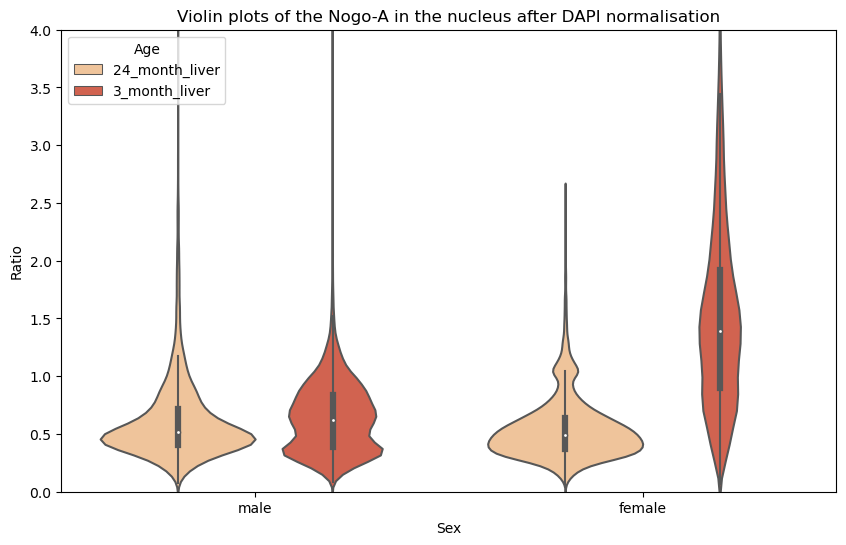

In [151]:
plt.figure(figsize=(10, 6)) 
ax = sns.violinplot(
    x='Sex',
    y='Ratio',
    hue='Age',
    data = df_5,
    palette = 'OrRd'
)
plt.ylim([0,4])
plt.title('Violin plots of the Nogo-A in the nucleus after DAPI normalisation')
plt.show()

### Calculation of % in each distribution of a violin plot

No handles with labels found to put in legend.


0       0.322739
1       0.363832
2       0.819541
3       0.495459
4       0.544983
          ...   
5787    0.958322
5788    0.675408
5789    0.910123
5790    0.916400
5791    0.657912
Name: Ratio, Length: 5792, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


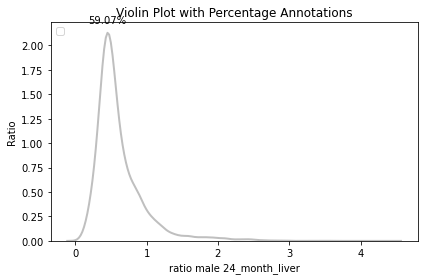

Percentage on the right of 1.1805422185725358: 6.54%


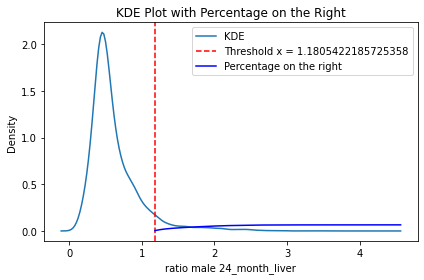

5792     0.253547
5793     0.213609
5794     0.269311
5795     0.175906
5796     0.073417
           ...   
17477    0.527622
17478    0.473410
17479    0.284978
17480    0.842026
17481    0.592075
Name: Ratio, Length: 11690, dtype: float64


No handles with labels found to put in legend.


AxesSubplot(0.125,0.125;0.775x0.755)


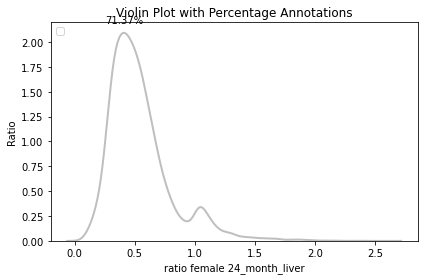

Percentage on the right of 1.1938479967184066: 3.00%


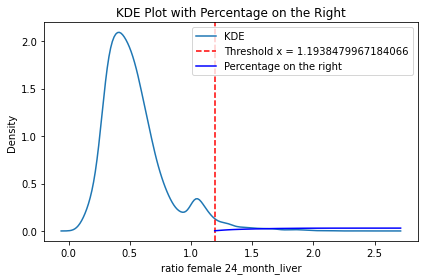

17482    1.061574
17483    0.784432
17484    0.764313
17485    0.373955
17486    0.630983
           ...   
28494    0.740385
28495    0.930962
28496    0.949491
28497    0.873764
28498    0.840637
Name: Ratio, Length: 11017, dtype: float64


No handles with labels found to put in legend.


AxesSubplot(0.125,0.125;0.775x0.755)


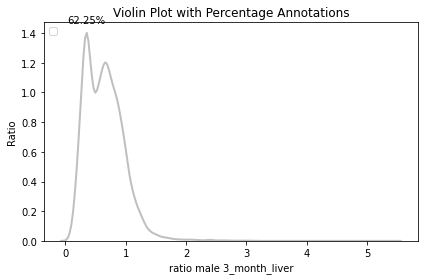

Percentage on the right of 1.1730901042100113: 5.66%


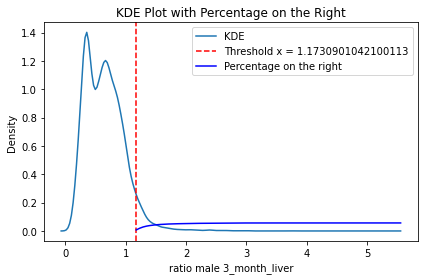

28499    0.207490
28500    1.503850
28501    2.180752
28502    2.782703
28503    2.783966
           ...   
45878    1.547139
45879    1.926526
45880    1.051546
45881    2.939281
45882    1.827942
Name: Ratio, Length: 17384, dtype: float64


No handles with labels found to put in legend.


AxesSubplot(0.125,0.125;0.775x0.755)


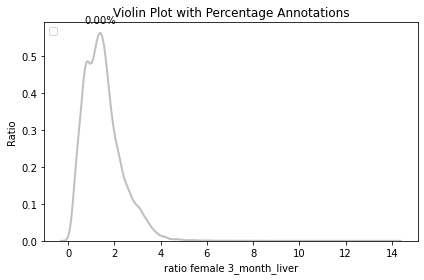

Percentage on the right of 0.9523456288131222: 74.46%


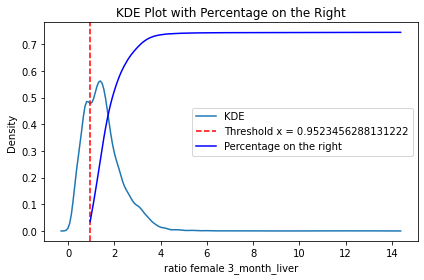

In [28]:
from scipy.signal import find_peaks
from scipy.misc import derivative
from scipy.stats import gaussian_kde


for age_group in df_5['Age'].unique():
    for sex in df_5['Sex'].unique():
        subset = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex)]['Ratio']
        print(subset)
        kde = sns.kdeplot(subset, color='gray', linewidth=2, alpha=0.5)
        print(kde)
        
        x = kde.get_lines()[0].get_data()[0]
        y = kde.get_lines()[0].get_data()[1]
        
        bump_indices = y > 1.0  # Choose a threshold value
        
        percentage = sum(y[bump_indices]) / sum(y)
        percentage_label = f'{percentage:.2%}'
        
        max_x = x[y.argmax()]
        max_y = y.max()
        
        plt.annotate(
            percentage_label, 
            xy=(max_x, max_y),
            xytext=(0, 10), 
            textcoords='offset points',
            ha='center', 
            fontsize=10, 
            color='black'
        )

        plt.xlabel('ratio '+sex +' '+ age_group)
        plt.ylabel("Ratio")
        plt.title("Violin Plot with Percentage Annotations")
        plt.legend(loc="upper left")

        plt.tight_layout()
        plt.show()
        
        filtered_indices = np.where((x >= 0.4) & (x <= 0.95))
        filtered_x = x[filtered_indices]
        filtered_y = y[filtered_indices]

        min_y_index = np.argmin(filtered_y)
        lowest_x_1 = filtered_x[min_y_index]

        
        filtered_indices = np.where((x >= 0.4) & (x <= 0.6))
        filtered_x = x[filtered_indices]
        filtered_y = y[filtered_indices]

        min_y_index = np.argmin(filtered_y)
        lowest_x_2 = filtered_x[min_y_index]

        
        filtered_indices = np.where((x >= 0.8) & (x <= 1.2))
        filtered_x = x[filtered_indices]
        filtered_y = y[filtered_indices]

        min_y_index = np.argmin(filtered_y)
        lowest_x_3 = filtered_x[min_y_index]

        
        threshold_x = lowest_x_3

        index_threshold = np.argmax(x >= threshold_x)
        cumulative_sum = np.cumsum(y[index_threshold:])
        percentage_on_right = cumulative_sum / np.sum(y)
        plt.plot(x, y, label='KDE')
        plt.axvline(x=threshold_x, color='red', linestyle='--', label=f'Threshold x = {threshold_x}')
        plt.plot(x[index_threshold:], percentage_on_right, color='blue', label='Percentage on the right')

        plt.xlabel('ratio '+sex +' '+ age_group)
        plt.ylabel("Density")
        plt.title("KDE Plot with Percentage on the Right")
        plt.legend()

        print(f"Percentage on the right of {threshold_x}: {percentage_on_right[-1]:.2%}")


        plt.tight_layout()
        plt.show()

### T-test for statistical significance of difference between populations of different distributions

In [29]:
print('\033[1mT-test for raw data\033[0m')

i = 0
for age_group in df_5['Age'].unique():
    for sex in df_5['Sex'].unique():
        print(age_group, sex)
        if i == 0:
            print('t-test wont work => no separate populations')
        a = np.array([4.0,0.9290046805582562,0.49443374024008896,0.9523456288131222])
        subset1 = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex) & (df_5['Ratio'] >= a[i])]['Ratio'].copy()
        subset2 = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex) & (df_5['Ratio'] < a[i])]['Ratio']
        
        
        #----------------------------------------------------------------------------------------
        t_statistic, p_val = stats.ttest_ind(subset1, subset2, equal_var=False)
        print('test statistic:',t_statistic)
        fromatted_p_val = "{:e}".format(p_val)
        print('p_val:', fromatted_p_val)
        if p_val < 0.1:
            print('diff is significant')
        else:
            print('diff not stat significant')
        i += 1

T-test for raw data
24_month_liver male
t-test wont work => no separate populations
test statistic: nan
p_val: nan
diff not stat significant
24_month_liver female
test statistic: 98.43596400413243
p_val: 0.000000e+00
diff is significant
3_month_liver male
test statistic: 138.25228675734385
p_val: 0.000000e+00
diff is significant
3_month_liver female
test statistic: 155.29148682284622
p_val: 0.000000e+00
diff is significant


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Doing other tests instead of a t-test (Cohen's d)

In [30]:
print('\033[1mPermutation test for raw data of violin plots\033[0m')

i = 0
for age_group in df_5['Age'].unique():
    for sex in df_5['Sex'].unique():
        print(age_group, sex)
        if i == 0:
            print('t-test wont work => no separate populations')
        a = np.array([4.0,0.9290046805582562,0.49443374024008896,0.9523456288131222])
        subset1_1 = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex) & (df_5['Ratio'] >= a[i])]['Ratio'].copy()
        subset2_1 = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex) & (df_5['Ratio'] < a[i])]['Ratio']
        
        group1_data = subset1_1
        group2_data = subset2_1
        
        combined_data = np.concatenate((group1_data, group2_data))

        observed_statistic = np.mean(group1_data) - np.mean(group2_data)

        num_permutations = 10000

        perm_test_statistics = np.zeros(num_permutations)

        for j in range(num_permutations):
            shuffled_labels = np.random.permutation(combined_data)

            perm_group1 = shuffled_labels[:len(group1_data)]
            perm_group2 = shuffled_labels[len(group1_data):]
            perm_test_statistics[j] = np.mean(perm_group1) - np.mean(perm_group2)

        p_value = (np.abs(perm_test_statistics) >= np.abs(observed_statistic)).mean()

        print("Observed Test Statistic:", observed_statistic)
        print("p-value:", p_value)
        print()
        i+=1

#----------------------------------------------------------------------------------------------
print('\033[1mEffect size and confidence intervals for raw data of violin plots\033[0m')
from scipy import stats

i = 0
for age_group in df_5['Age'].unique():
    for sex in df_5['Sex'].unique():
        print(age_group, sex)
        if i == 0:
            print('t-test wont work => no separate populations')
        a = np.array([4.0,0.9290046805582562,0.49443374024008896,0.9523456288131222])
        subset1_1 = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex) & (df_5['Ratio'] >= a[i])]['Ratio'].copy()
        subset2_1 = df_5[(df_5['Age'] == age_group) & (df_5['Sex'] == sex) & (df_5['Ratio'] < a[i])]['Ratio']
        
        group1_data = subset1_1
        group2_data = subset2_1
        
        mean_group1 = np.mean(group1_data)
        mean_group2 = np.mean(group2_data)
        std_group1 = np.std(group1_data, ddof=1)  # Use ddof=1 for sample standard deviation
        std_group2 = np.std(group2_data, ddof=1)

        pooled_std = np.sqrt(((len(group1_data) - 1) * std_group1**2 + (len(group2_data) - 1) * std_group2**2) / (len(group1_data) + len(group2_data) - 2))

        effect_size = (mean_group1 - mean_group2) / pooled_std

        alpha = 0.05  # Set the desired confidence level (e.g., 95%)

        standard_error = pooled_std * np.sqrt(1 / len(group1_data) + 1 / len(group2_data))

        margin_of_error = stats.t.ppf(1 - alpha / 2, len(group1_data) + len(group2_data) - 2) * standard_error

        lower_ci = (mean_group1 - mean_group2) - margin_of_error
        upper_ci = (mean_group1 - mean_group2) + margin_of_error

        print("Effect Size (Cohen's d):", effect_size)
        print(f"{(1-alpha)*100}% Confidence Interval for the Difference: [{lower_ci}, {upper_ci}]")
        print()
        i+=1


Permutation test for raw data of violin plots
24_month_liver male
t-test wont work => no separate populations
Observed Test Statistic: 3.760023238988085
p-value: 0.0

24_month_liver female
Observed Test Statistic: 0.696707189538428
p-value: 0.0

3_month_liver male
Observed Test Statistic: 0.48880513731353076
p-value: 0.0

3_month_liver female
Observed Test Statistic: 1.1997535967230863
p-value: 0.0

Effect size and confidence intervals for raw data of violin plots
24_month_liver male
t-test wont work => no separate populations
Effect Size (Cohen's d): nan
95.0% Confidence Interval for the Difference: [nan, nan]

24_month_liver female
Effect Size (Cohen's d): 4.089914237844674
95.0% Confidence Interval for the Difference: [0.6861337744985966, 0.7072806045782595]

3_month_liver male
Effect Size (Cohen's d): 2.187548756806812
95.0% Confidence Interval for the Difference: [0.4801354072784626, 0.4974748673485989]

3_month_liver female
Effect Size (Cohen's d): 1.7309587133852702
95.0% Confid

### T-tests with image specific data

Violin plots up to s00 specificity


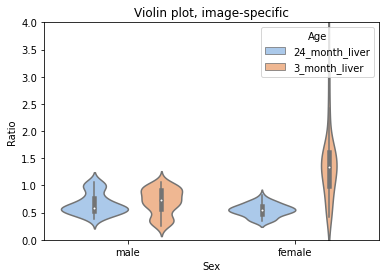

No handles with labels found to put in legend.


KDE plots up to s00 specificity
24_month_liver male
AxesSubplot(0.125,0.125;0.775x0.755)


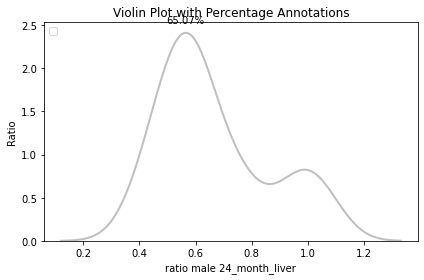

Percentage on the right of 0.8622656393318329: 20.49%


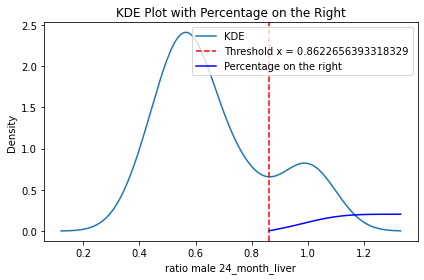

No handles with labels found to put in legend.


24_month_liver female
AxesSubplot(0.125,0.125;0.775x0.755)


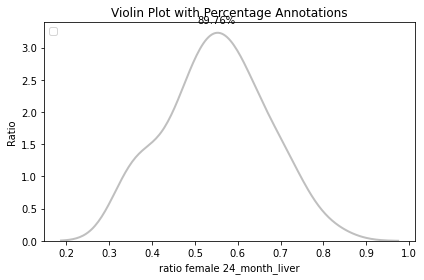

Percentage on the right of 0.9468998671635196: 0.01%


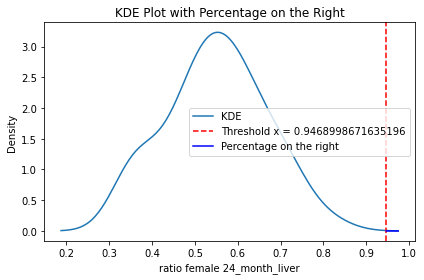

No handles with labels found to put in legend.


3_month_liver male
AxesSubplot(0.125,0.125;0.775x0.755)


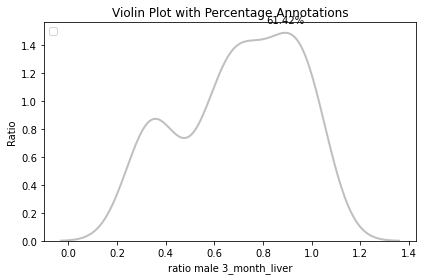

Percentage on the right of 0.47312079367555165: 78.58%


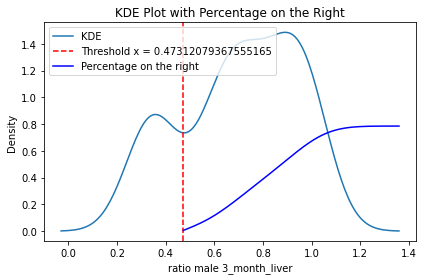

No handles with labels found to put in legend.


3_month_liver female
AxesSubplot(0.125,0.125;0.775x0.755)


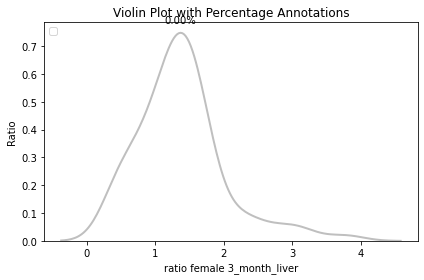

Percentage on the right of 0.42038906386115427: 94.18%


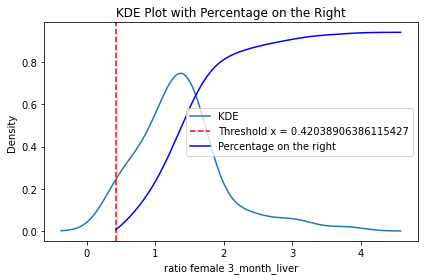

T-tests or Ranksum tests done with s00 specificity
Male 24 month old
test statistic: -5.079370039680118
p_val: 3.786885e-07
diff is significant

Female 24 month old
test statistic: -4.236207566379927
p_val: 2.273266e-05
diff is significant

Male 3 month old
test statistic: 0.0
p_val: 1.000000e+00
diff not stat significant

Female 3 month old
test statistic: -6.416774890862231
p_val: 1.391915e-10
diff is significant

Rank-sum tests
Effect size and confidence intervals for raw data of violin plots
24_month_liver male
t-test wont work => no separate populations
Effect Size (Cohen's d): 4.363905562713583
95.0% Confidence Interval for the Difference: [0.35101860221509357, 0.48015675227476146]

24_month_liver female
Effect Size (Cohen's d): 2.492740670369178
95.0% Confidence Interval for the Difference: [0.1487458369575293, 0.292722611094687]

3_month_liver male
Effect Size (Cohen's d): 3.4525345263468106
95.0% Confidence Interval for the Difference: [0.3905458140470421, 0.5328188197570133]


In [31]:
# you have the array averages -> you have the average over each image s00 => you want to use that to separate them 
#into groups: example g1: male 24 mo t13 01 s00 a[i] >= 4.0 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_for_plot = [{'Sex': identifiers[0], 'Age': identifiers[1], 'Ratio': average} for identifiers, average in averages.items()]
df_for_plot = pd.DataFrame(data_for_plot)

#----------------------------------------------------------------------------------------------------------------

print('\033[1mViolin plots up to s00 specificity\033[0m')

ax = sns.violinplot(
    x='Sex',
    y='Ratio',
    hue='Age',
    data=df_for_plot,
    palette='pastel'
)

plt.ylim([0, 4])
plt.title('Violin plot, image-specific')
plt.show()

#----------------------------------------------------------------------------------------------------------------

from scipy.signal import find_peaks
from scipy.misc import derivative
from scipy.stats import gaussian_kde

print('\033[1mKDE plots up to s00 specificity\033[0m')

for age_group in df_for_plot['Age'].unique():
    for sex in df_for_plot['Sex'].unique():
        print(age_group,sex)
        subset = df_for_plot[(df_for_plot['Age'] == age_group) & (df_for_plot['Sex'] == sex)]['Ratio']
        #print('subset')
        #print(subset)
        kde = sns.kdeplot(subset, color='gray', linewidth=2, alpha=0.5)
        print(kde)
        
        x = kde.get_lines()[0].get_data()[0]
        y = kde.get_lines()[0].get_data()[1]
        
        bump_indices = y > 1.0  # Choose a threshold value
        
        percentage = sum(y[bump_indices]) / sum(y)
        percentage_label = f'{percentage:.2%}'
        
        max_x = x[y.argmax()]
        max_y = y.max()
        
        plt.annotate(
            percentage_label, 
            xy=(max_x, max_y),
            xytext=(0, 10), 
            textcoords='offset points',
            ha='center', 
            fontsize=10, 
            color='black'
        )

        plt.xlabel('ratio '+sex +' '+ age_group)
        plt.ylabel("Ratio")
        plt.title("Violin Plot with Percentage Annotations")
        plt.legend(loc="upper left")

        plt.tight_layout()
        plt.show()
        
        filtered_indices = np.where((x >= 0.4) & (x <= 0.95))
        filtered_x = x[filtered_indices]
        filtered_y = y[filtered_indices]

        min_y_index = np.argmin(filtered_y)
        lowest_x_1 = filtered_x[min_y_index]

        
        filtered_indices = np.where((x >= 0.4) & (x <= 0.6))
        filtered_x = x[filtered_indices]
        filtered_y = y[filtered_indices]

        min_y_index = np.argmin(filtered_y)
        lowest_x_2 = filtered_x[min_y_index]

        
        filtered_indices = np.where((x >= 0.4) & (x <= 0.6))
        filtered_x = x[filtered_indices]
        filtered_y = y[filtered_indices]

        min_y_index = np.argmin(filtered_y)
        lowest_x_3 = filtered_x[min_y_index]

        
        threshold_x = lowest_x_1

        index_threshold = np.argmax(x >= threshold_x)
        cumulative_sum = np.cumsum(y[index_threshold:])
        percentage_on_right = cumulative_sum / np.sum(y)
        plt.plot(x, y, label='KDE')
        plt.axvline(x=threshold_x, color='red', linestyle='--', label=f'Threshold x = {threshold_x}')
        plt.plot(x[index_threshold:], percentage_on_right, color='blue', label='Percentage on the right')

        plt.xlabel('ratio '+sex +' '+ age_group)
        plt.ylabel("Density")
        plt.title("KDE Plot with Percentage on the Right")
        plt.legend()

        print(f"Percentage on the right of {threshold_x}: {percentage_on_right[-1]:.2%}")


        plt.tight_layout()
        plt.show()

#----------------------------------------------------------------------------------------------------------------
        
print('\033[1mT-tests or Ranksum tests done with s00 specificity\033[0m')

from scipy.stats import ranksums


thresholds = {
    ('male', '24_month_liver'): 0.8622656393318329,
    ('female', '24_month_liver'): 0.40100659508430436,
    ('male', '3_month_liver'): 0.47312079367555165,
    ('female', '3_month_liver'): 0.9523456288131222
}

thresholded_arrays = {}

for sex in df_5['Sex'].unique():
    for age in df_5['Age'].unique():
        thresholded_arrays[(sex, age)] = {
            'above_threshold': [],
            'below_threshold': []
        }

for identifiers, average in averages.items():
    sex, age, _, _, _ = identifiers
    category_threshold = thresholds.get((sex, age))
    #print(identifiers,average,category_threshold)
    
    above_threshold = [] if average >= category_threshold else [average]
    below_threshold = [] if average < category_threshold else [average]
    
    thresholded_arrays[(sex, age)]['above_threshold'].extend(above_threshold)
    thresholded_arrays[(sex, age)]['below_threshold'].extend(below_threshold)

male_24_above_threshold = thresholded_arrays[('male', '24_month_liver')]['above_threshold']
male_24_below_threshold = thresholded_arrays[('male', '24_month_liver')]['below_threshold']
female_24_above_threshold = thresholded_arrays[('female', '24_month_liver')]['above_threshold']
female_24_below_threshold = thresholded_arrays[('female', '24_month_liver')]['below_threshold']
male_3_above_threshold = thresholded_arrays[('male', '3_month_liver')]['above_threshold']
male_3_below_threshold = thresholded_arrays[('male', '3_month_liver')]['below_threshold']
female_3_above_threshold = thresholded_arrays[('female', '3_month_liver')]['above_threshold']
female_3_below_threshold = thresholded_arrays[('female', '3_month_liver')]['below_threshold']

print('Male 24 month old')

t_statistic, p_val = ranksums(male_24_above_threshold, male_24_below_threshold)
#t_statistic, p_val = stats.ttest_ind(male_24_above_threshold, male_24_below_threshold, equal_var=False)
print('test statistic:',t_statistic)
fromatted_p_val = "{:e}".format(p_val)
print('p_val:', fromatted_p_val)
if p_val < 0.05:
    print('diff is significant')
else:
    print('diff not stat significant')
    
print()
print('Female 24 month old')

t_statistic, p_val = ranksums(female_24_above_threshold, female_24_below_threshold)
#t_statistic, p_val = stats.ttest_ind(female_24_above_threshold, female_24_below_threshold, equal_var=False)
print('test statistic:',t_statistic)
fromatted_p_val = "{:e}".format(p_val)
print('p_val:', fromatted_p_val)
if p_val < 0.05:
    print('diff is significant')
else:
    print('diff not stat significant')

print()
print('Male 3 month old')

t_statistic, p_val = ranksums(male_3_above_threshold, male_3_above_threshold)
#t_statistic, p_val = stats.ttest_ind(male_3_above_threshold, male_3_below_threshold, equal_var=False)
print('test statistic:',t_statistic)
fromatted_p_val = "{:e}".format(p_val)
print('p_val:', fromatted_p_val)
if p_val < 0.05:
    print('diff is significant')
else:
    print('diff not stat significant')
    
print()
print('Female 3 month old')

t_statistic, p_val = ranksums(female_3_above_threshold, female_3_below_threshold)
#t_statistic, p_val = stats.ttest_ind(female_3_above_threshold, female_3_below_threshold, equal_var=False)
print('test statistic:',t_statistic)
fromatted_p_val = "{:e}".format(p_val)
print('p_val:', fromatted_p_val)
if p_val < 0.05:
    print('diff is significant')
else:
    print('diff not stat significant')
    
print()
#------------------------------------------------------------------------------------------------------------------
print('Rank-sum tests')
#------------------------------------------------------------------------------------------------------------------

print('\033[1mEffect size and confidence intervals for raw data of violin plots\033[0m')
from scipy import stats

i = 0
for age_group in df_for_plot['Age'].unique():
    for sex in df_for_plot['Sex'].unique():
        print(age_group, sex)
        if i == 0:
            print('t-test wont work => no separate populations')
        a = np.array([0.8622656393318329,0.40100659508430436,0.47312079367555165,0.9523456288131222])
        subset1_1 = df_for_plot[(df_for_plot['Age'] == age_group) & (df_for_plot['Sex'] == sex) & (df_for_plot['Ratio'] >= a[i])]['Ratio'].copy()
        subset2_1 = df_for_plot[(df_for_plot['Age'] == age_group) & (df_for_plot['Sex'] == sex) & (df_for_plot['Ratio'] < a[i])]['Ratio']
        
        group1_data = subset1_1
        group2_data = subset2_1
        
        mean_group1 = np.mean(group1_data)
        mean_group2 = np.mean(group2_data)
        std_group1 = np.std(group1_data, ddof=1)  # Use ddof=1 for sample standard deviation
        std_group2 = np.std(group2_data, ddof=1)

        pooled_std = np.sqrt(((len(group1_data) - 1) * std_group1**2 + (len(group2_data) - 1) * std_group2**2) / (len(group1_data) + len(group2_data) - 2))

        effect_size = (mean_group1 - mean_group2) / pooled_std

        alpha = 0.05  # Set the desired confidence level (e.g., 95%)

        standard_error = pooled_std * np.sqrt(1 / len(group1_data) + 1 / len(group2_data))

        margin_of_error = stats.t.ppf(1 - alpha / 2, len(group1_data) + len(group2_data) - 2) * standard_error

        lower_ci = (mean_group1 - mean_group2) - margin_of_error
        upper_ci = (mean_group1 - mean_group2) + margin_of_error

        print("Effect Size (Cohen's d):", effect_size)
        print(f"{(1-alpha)*100}% Confidence Interval for the Difference: [{lower_ci}, {upper_ci}]")
        print()
        i+=1



### Testing with rank_sum per image (t13)

In [301]:
df_5['Image']
df_5['Timepoint'] = df_5['Image'].str.split('_').str[-3]
df_5['Picture'] = df_5['Image'].str.split('_').str[-2]
df_5['Slice'] = df_5['Image'].str.split('_').str[-1]
df_5['Picture']

0        01
1        01
2        01
3        01
4        01
         ..
45878    03
45879    03
45880    03
45881    03
45882    03
Name: Picture, Length: 45883, dtype: object


Violin plots


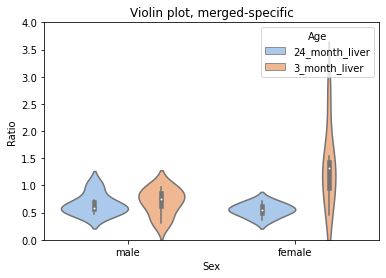

No handles with labels found to put in legend.


KDE plots.
24_month_liver male
AxesSubplot(0.125,0.125;0.775x0.755)


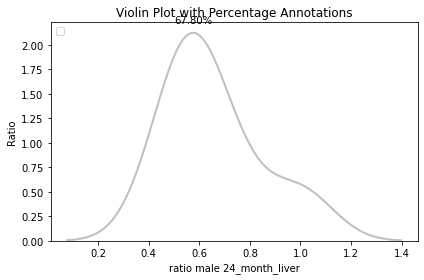

Percentage on the right of 0.9198545105150364: 13.96%


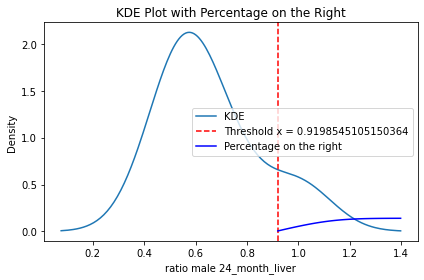

No handles with labels found to put in legend.


24_month_liver female
AxesSubplot(0.125,0.125;0.775x0.755)


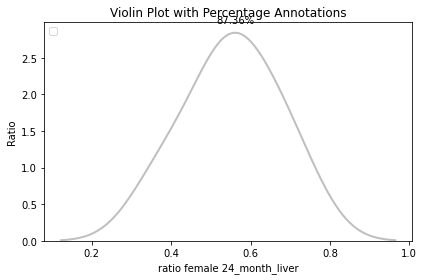

No handles with labels found to put in legend.


3_month_liver male
AxesSubplot(0.125,0.125;0.775x0.755)


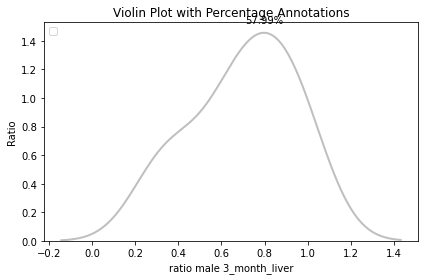

Percentage on the right of 0.4022914694078087: 84.21%


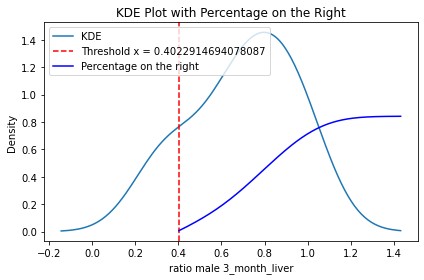

No handles with labels found to put in legend.


3_month_liver female
AxesSubplot(0.125,0.125;0.775x0.755)


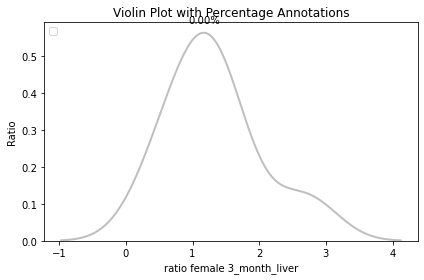

Percentage on the right of 2.483470427587754: 10.28%


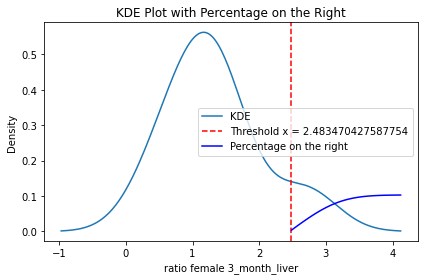

Ranksums test done with up to t13 specificity.

24_month_liver male
t-test wont work => no separate populations
Fail to reject the null hypothesis. The distributions are similar.
Test Statistic: 1.4638501094227998
P-value: 0.14323490752466972

24_month_liver female
Fail to reject the null hypothesis. The distributions are similar.
Test Statistic: nan
P-value: nan

3_month_liver male
Reject the null hypothesis. The distributions are likely different.
Test Statistic: 2.04939015319192
P-value: 0.04042397933690852

3_month_liver female
Fail to reject the null hypothesis. The distributions are similar.
Test Statistic: 1.5
P-value: 0.13361440253771614



/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:7784: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


In [24]:
from scipy.stats import ranksums

df_5['Sex'] = df_5['Sex']
df_5['Age'] = df_5['Age']
df_5['Timepoint'] = df_5['Image'].str.split('_').str[-3]
df_5['Picture'] = df_5['Image'].str.split('_').str[-2]
df_5['Slice'] = df_5['Image'].str.split('_').str[-1]

data_groups_1 = df_5.groupby(['Sex', 'Age', 'Timepoint', 'Picture'])

data_arrays_1 = {}

for index, row in df_5.iterrows():
    sex = row['Sex']
    age = row['Age']
    timepoint = row['Timepoint']
    image_id = row['Picture']
    #slice_id = row['Slice']
    array_name = f"{sex}_{age}_{timepoint}_{image_id}"

    identifiers = (sex, age, timepoint, image_id)  # Convert to a tuple

    if identifiers not in data_arrays_1:
        data_arrays_1[identifiers] = []

    data = row['Ratio']
    #print(data)
    data_arrays_1[identifiers].append(data)

#print(len(data_arrays_1))

avg_merged = {}

for identifiers, data in data_arrays_1.items():
    array_average = np.mean(data)
    avg_merged[identifiers] = array_average
    #print(identifiers)
    #print(array_average)
#print(len(avg_merged))
#print(avg_merged)
print()


data_for_test = [{'Sex': identifiers[0], 'Age': identifiers[1], 'Timepoint': identifiers[2], 'Picture': identifiers[3], 'Ratio': average} for identifiers, average in avg_merged.items()]
df_for_test = pd.DataFrame(data_for_test)

#print(df_for_test)

#-------------------------------------------------------------------------------------------------------------------

print('\033[1mViolin plots')

ax = sns.violinplot(
    x='Sex',
    y='Ratio',
    hue='Age',
    data=df_for_test,
    palette='pastel'
)

plt.ylim([0, 4])
plt.title('Violin plot, merged-specific')
plt.show()

#-------------------------------------------------------------------------------------------------------------------

print('\033[1mKDE plots.\033[0m')

for age_group in df_for_test['Age'].unique():
    for sex in df_for_test['Sex'].unique():
        print(age_group,sex)
        subset = df_for_test[(df_for_test['Age'] == age_group) & (df_for_test['Sex'] == sex)]['Ratio']
        #print('subset')
        #print(subset)
        kde = sns.kdeplot(subset, color='gray', linewidth=2, alpha=0.5)
        print(kde)
        
        x = kde.get_lines()[0].get_data()[0]
        y = kde.get_lines()[0].get_data()[1]
        
        bump_indices = y > 1.0  # Choose a threshold value
        
        percentage = sum(y[bump_indices]) / sum(y)
        percentage_label = f'{percentage:.2%}'
        
        max_x = x[y.argmax()]
        max_y = y.max()
        
        plt.annotate(
            percentage_label, 
            xy=(max_x, max_y),
            xytext=(0, 10), 
            textcoords='offset points',
            ha='center', 
            fontsize=10, 
            color='black'
        )

        plt.xlabel('ratio '+sex +' '+ age_group)
        plt.ylabel("Ratio")
        plt.title("Violin Plot with Percentage Annotations")
        plt.legend(loc="upper left")

        plt.tight_layout()
        plt.show()
        
        
        if age_group == '24_month_liver' and sex == 'male':
            filtered_indices = np.where((x >= 0.4) & (x <= 0.92))
            filtered_x = x[filtered_indices]
            filtered_y = y[filtered_indices]

            min_y_index = np.argmin(filtered_y)
            lowest_x_1 = filtered_x[min_y_index]
            
            threshold_x = lowest_x_1
        

            index_threshold = np.argmax(x >= threshold_x)
            cumulative_sum = np.cumsum(y[index_threshold:])
            percentage_on_right = cumulative_sum / np.sum(y)
            plt.plot(x, y, label='KDE')
            plt.axvline(x=threshold_x, color='red', linestyle='--', label=f'Threshold x = {threshold_x}')
            plt.plot(x[index_threshold:], percentage_on_right, color='blue', label='Percentage on the right')

            plt.xlabel('ratio '+sex +' '+ age_group)
            plt.ylabel("Density")
            plt.title("KDE Plot with Percentage on the Right")
            plt.legend()

            print(f"Percentage on the right of {threshold_x}: {percentage_on_right[-1]:.2%}")


            plt.tight_layout()
            plt.show()
        if age_group == '3_month_liver' and sex == 'male':
            filtered_indices = np.where((x >= 0.4) & (x <= 0.6))
            filtered_x = x[filtered_indices]
            filtered_y = y[filtered_indices]

            min_y_index = np.argmin(filtered_y)
            lowest_x_2 = filtered_x[min_y_index]
            threshold_x = lowest_x_2
        

            index_threshold = np.argmax(x >= threshold_x)
            cumulative_sum = np.cumsum(y[index_threshold:])
            percentage_on_right = cumulative_sum / np.sum(y)
            plt.plot(x, y, label='KDE')
            plt.axvline(x=threshold_x, color='red', linestyle='--', label=f'Threshold x = {threshold_x}')
            plt.plot(x[index_threshold:], percentage_on_right, color='blue', label='Percentage on the right')

            plt.xlabel('ratio '+sex +' '+ age_group)
            plt.ylabel("Density")
            plt.title("KDE Plot with Percentage on the Right")
            plt.legend()

            print(f"Percentage on the right of {threshold_x}: {percentage_on_right[-1]:.2%}")
            plt.tight_layout()
            plt.show()

        
        if age_group == '3_month_liver' and sex == 'female':
            filtered_indices = np.where((x >= 2.0) & (x <= 2.5))
            filtered_x = x[filtered_indices]
            filtered_y = y[filtered_indices]

            min_y_index = np.argmin(filtered_y)
            lowest_x_3 = filtered_x[min_y_index]


            threshold_x = lowest_x_3
        

            index_threshold = np.argmax(x >= threshold_x)
            cumulative_sum = np.cumsum(y[index_threshold:])
            percentage_on_right = cumulative_sum / np.sum(y)
            plt.plot(x, y, label='KDE')
            plt.axvline(x=threshold_x, color='red', linestyle='--', label=f'Threshold x = {threshold_x}')
            plt.plot(x[index_threshold:], percentage_on_right, color='blue', label='Percentage on the right')

            plt.xlabel('ratio '+sex +' '+ age_group)
            plt.ylabel("Density")
            plt.title("KDE Plot with Percentage on the Right")
            plt.legend()

            print(f"Percentage on the right of {threshold_x}: {percentage_on_right[-1]:.2%}")


            plt.tight_layout()
            plt.show()

#-------------------------------------------------------------------------------------------------------------------
        
#you are going to change to df_for_test
#you want to make a new thing like averages but that has for t13,t12, ect
print("\033[1mRanksums test done with up to t13 specificity.\033[0m")
print()

i = 0
for age_group in df_for_test['Age'].unique():
    for sex in df_for_test['Sex'].unique():
        '''
        for image in df_for_test['Timepoint'].unique():
            for pic in df_for_test['Picture'].unique():
        '''
        print(age_group, sex)
        if i == 0:
            print('t-test wont work => no separate populations')
        a = np.array([0.9198545105150364,4.0,0.4022914694078087,2.483470427587754])
        subset1 = df_for_test[(df_for_test['Age'] == age_group) & (df_for_test['Sex'] == sex) & (df_for_test['Ratio'] >= a[i])]['Ratio']
        subset2 = df_for_test[(df_for_test['Age'] == age_group) & (df_for_test['Sex'] == sex) & (df_for_test['Ratio'] < a[i])]['Ratio']

        statistic, p_value = ranksums(subset1, subset2)

        alpha = 0.05
        if p_value < alpha:
            print("Reject the null hypothesis. The distributions are likely different.")
        else:
            print("Fail to reject the null hypothesis. The distributions are similar.")

        print(f"Test Statistic: {statistic}")
        print(f"P-value: {p_value}")

        i += 1
        print()
    

In [ ]:
0.9198545105150364 -> male 24 mo
0.4022914694078087 -> male 3mo
2.483470427587754 -> female 3 mo